## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as sp
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import mne
import os
import sys
sys.path.append(os.path.abspath("../src"))
from functions import *


correct_counts = True

## Load pre/post-stim reference matrices + irrev values, load into the behavior dataframe

In [2]:
project_directory = os.path.dirname(os.path.dirname(os.path.abspath("clean_analysis_dataset1")))

df = pd.read_csv(os.path.join(project_directory, r"data", r"behavior_dataset1.csv"))

prestim_ref_mat = scipy.io.loadmat(os.path.join(project_directory, r"data", r"FowRev_long_192to255_tau5.mat"))['ref_mats']
poststim_ref_mat = scipy.io.loadmat(os.path.join(project_directory, r"data", r"FowRev_long_256to319_tau5.mat"))['ref_mats']
df['prestim_ref_mat'] = [prestim_ref_mat[i] for i in range(prestim_ref_mat.shape[0])]
df['prestim_irrev'] = df['prestim_ref_mat'].apply(lambda arr: np.mean(arr))
df['poststim_ref_mat'] = [poststim_ref_mat[i] for i in range(poststim_ref_mat.shape[0])]
df['poststim_irrev'] = df['poststim_ref_mat'].apply(lambda arr: np.mean(arr))

#df['stim_diff'] = (df['poststim_irrev'] - df['prestim_irrev'])

df['log_prestim'] = np.log(df['prestim_irrev'])
df['log_poststim'] = np.log(df['poststim_irrev'])


df.head()

Unnamed: 0  subject drug  session  block  miniblock  trial_nr  cue  \
0           0        1  DNP        0      1          0       316    1   
1           1        1  DNP        0      1          0       318    1   
2           2        1  DNP        0      1          0       319    0   
3           3        1  DNP        0      1          0       320    1   
4           4        1  DNP        0      1          0       321    1   

   location  cue_val  ...          RT  total_trial     bl_pupil  bl_pupil_bin  \
0         1        1  ...  700.413423            0  4357.233196             4   
1         1        1  ...  625.350154            1  4399.359772             4   
2         1        0  ...  775.374966            2  4523.822666             4   
3         1        1  ...  700.344298            3  4433.337541             4   
4         1        1  ...  775.313991            4  4296.816038             3   

                                     prestim_ref_mat  prestim_irrev  \
0  [[0.0, 0.0006873881373122065, 0.00016213735834...       0.002365   
1  [[0.0, 0.040240608719263854, 0.000460120231847...       0.003315   
2  [[0.0, 0.00011810852016698719, 1.5823859782963...       0.002592   
3  [[0.0, 6.157323424213391e-05, 0.00035627791271...       0.003637   
4  [[0.0, 0.005253544828395134, 0.001778205067022...       0.004256   

                                    poststim_ref_mat poststim_irrev  \
0  [[0.0, 0.0034406175735612415, 0.00032247166478...       0.004368   
1  [[0.0, 0.011221204332762597, 3.11892070731507e...       0.007235   
2  [[6.933347799794049e-33, 0.0021569218713682363...       0.007527   
3  [[0.0, 9.957067986210528e-07, 1.23841343919133...       0.003592   
4  [[3.0814879110195774e-33, 0.012134126048785662...       0.006225   

   log_prestim log_poststim  
0    -6.046786    -5.433428  
1    -5.709422    -4.928833  
2    -5.955156    -4.889197  
3    -5.616722    -5.629171  
4    -5.459500    -5.079207  

[5 rows x 23 columns]

In [11]:
# prestim_channel_alpha = np.load(os.path.join(project_directory, r"data", r"prestim_channel_alphapower.npy"))
# prestim_mean_alpha = np.mean(prestim_channel_alpha, axis=1)
# df['prestim_mean_alpha'] = prestim_mean_alpha
# poststim_channel_alpha = np.load(os.path.join(project_directory, r"data", r"poststim_channel_alphapower.npy"))
# poststim_mean_alpha = np.mean(poststim_channel_alpha, axis=1)
# df['poststim_mean_alpha'] = poststim_mean_alpha

# df['trial'] = df.index

# pre_sampEn_bychannel_array = np.load(os.path.join(project_directory, r"data", r"prestim_sampEn_bychannel.npy"))
# list1 = [pre_sampEn_bychannel_array[i] for i in range(pre_sampEn_bychannel_array.shape[0])]
# df['prestim_sampen_bychannel'] = list1
# df['prestim_sampen_mean'] = df['prestim_sampen_bychannel'].apply(lambda x: np.mean(x))

# post_sampEn_bychannel_array = np.load(os.path.join(project_directory, r"data", r"poststim_sampEn_bychannel.npy"))
# list1 = [post_sampEn_bychannel_array[i] for i in range(post_sampEn_bychannel_array.shape[0])]
# df['poststim_sampen_bychannel'] = list1
# df['poststim_sampen_mean'] = df['poststim_sampen_bychannel'].apply(lambda x: np.mean(x))



# df['prestim_heirarchy'] = [np.std(matrix) for matrix in df['prestim_ref_mat']]
# # post -- 
# df['poststim_heirarchy'] = [np.std(matrix) for matrix in df['poststim_ref_mat']]

## Analysis used for thesis

### Prestim

#### All drugs combined

bl_pupil_bin
0    3306.142539
1    3485.883558
2    3588.134960
3    3691.694810
4    3877.785733
Name: bl_pupil, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\1444823354.py:24: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(1),('d')), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\1444823354.py:26: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(2),('d')), 0)


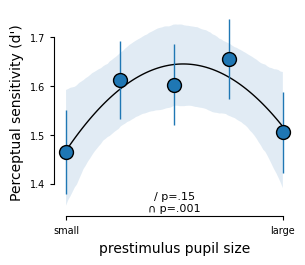

In [6]:
# ALL DRUGS COMBINED

# Loading behavioral data
behavior = df

cfg = {'n_bins': 5}  # Number of pupil bins
behavior['bl_pupil_bin'] = behavior.groupby(['subject', 'drug', 'block'])['bl_pupil'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

df_group = behavior.sort_values(by=['subject','session','block'])

        # make bins
df_group['bl_pupil_bin'] = np.concatenate(np.ravel(df_group.groupby(['subject','session','block'])['bl_pupil'].agg(
        lambda x: list(pd.qcut(x, cfg['n_bins'],labels = range(cfg['n_bins']))))))

correct_counts = True
df_sdt = df_group.groupby(['subject','drug','bl_pupil_bin']).apply(lambda x: sdt(x, correct_counts))

df_subject = df_sdt.groupby(['subject', 'bl_pupil_bin']).mean()
df_subject.reset_index(inplace=True)

print(behavior.groupby('bl_pupil_bin').mean()['bl_pupil'])

betas_first = dict()
_, betas_first['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(1),('d')), 0)
betas_second = dict()
_, betas_second['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(2),('d')), 0)


# Plotting results for d'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(8*cm, 7*cm))

ym = df_sdt.groupby('bl_pupil_bin').mean()['d']
yerr = df_sdt.groupby('bl_pupil_bin').sem()['d']
ax.errorbar(range(cfg['n_bins']), ym, yerr=yerr, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='k')

p_val_linear = betas_first['d']
p_val_quadratic = betas_second['d']

# Initialize variables to decide which model to plot
plot_linear = False
plot_quadratic = False

# Determine which model to plot based on the significance and smaller p-value
if p_val_linear < 0.05 or p_val_quadratic < 0.05:
    if p_val_linear < p_val_quadratic:
        plot_linear = True
    elif p_val_quadratic < p_val_linear:
        plot_quadratic = True

# Optionally add model fits if linear/quadratic fit was significant
if plot_linear:
    sns.regplot(ax=ax, data=df_subject, x="bl_pupil_bin", y="d", scatter=False, color=sns.color_palette('Set1', 2)[-1],
                line_kws={'linestyle': '-', 'lw': 1}, order=1, ci=68)
    # Adjusting line color to black for visibility
    ax.get_lines()[-1].set_color('k')

if plot_quadratic:
    sns.regplot(ax=ax, data=df_subject, x="bl_pupil_bin", y="d", scatter=False, color=sns.color_palette('Set1', 2)[-1],
                line_kws={'linestyle': '-', 'lw': 1}, order=2, ci=68)
    # Adjusting line color to black for visibility
    ax.get_lines()[-1].set_color('k')

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ {}\n∩ {}'.format(p_val_string(betas_first['d']),
                                        p_val_string(betas_second['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8)

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('Perceptual sensitivity (d\')')
ax.set_xlabel('prestimulus pupil size')
ax.set_xticks([0,cfg['n_bins']-1])
ax.set_xticklabels(['small', 'large']) 
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

fig.tight_layout()
plt.show()

#### By Drug

C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irrev'] = df['log_prestim']
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: PLC
Bin means: irreversibility_bin
0   -6.405918
1   -5.967482
2   -5.683321
3   -5.390723
4   -4.898950
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: DNP
Bin means: irreversibility_bin
0   -6.347280
1   -5.909399
2   -5.646773
3   -5.363004
4   -4.882768
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: ATX
Bin means: irreversibility_bin
0   -6.504525
1   -6.078766
2   -5.809444
3   -5.530069
4   -5.042101
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:55: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:58: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:62: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in Sci

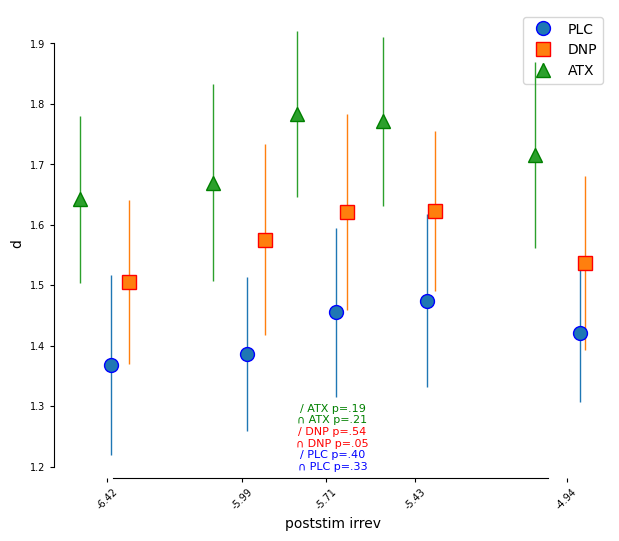

In [ ]:
behavior = df
#behavior = remove_top_percentile(behavior, 'prestim_mean_alpha', 0.999)
#behavior = remove_top_percentile(behavior, 'poststim_mean_alpha', 0.999)
behavior = behavior[(behavior['poststim_irrev'] < 0.075) & (behavior['prestim_irrev'] < 0.075)]

behavior['irrev'] = df['log_poststim']
cfg = {'n_bins': 5}  # Number of pupil bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['d'] < 0.05 or betas_second_irreversibility_plc['d'] < 0.05:
    if betas_first_irreversibility_plc['d'] < betas_second_irreversibility_plc['d']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['d'] < betas_first_irreversibility_plc['d']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['d'] < 0.05 or betas_second_irreversibility_dnp['d'] < 0.05:
    if betas_first_irreversibility_dnp['d'] < betas_second_irreversibility_dnp['d']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['d'] < betas_first_irreversibility_dnp['d']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['d'] < 0.05 or betas_second_irreversibility_atx['d'] < 0.05:
    if betas_first_irreversibility_atx['d'] < betas_second_irreversibility_atx['d']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['d'] < betas_first_irreversibility_atx['d']:
        plot_quadratic_atx = True

# Plotting results for log_poststim'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['d']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['d']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['d']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="d", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['d']),
                                               p_val_string(betas_second_irreversibility_plc['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['d']),
                                               p_val_string(betas_second_irreversibility_dnp['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['d']),
                                               p_val_string(betas_second_irreversibility_atx['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('d')
ax.set_xlabel('poststim irrev')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


#### Pupil size / irrev -- collapsed all drugs

In [5]:
behavior = df
behavior['irreversibility'] = df['prestim_irrev']

cfg = {'n_bins': 5}  # Number of pupil bins

df_group = behavior.sort_values(by=['subject','session','block'])

        # make bins
df_group['bl_pupil_bin'] = np.concatenate(np.ravel(df_group.groupby(['subject','session','block'])['bl_pupil'].agg(
        lambda x: list(pd.qcut(x, cfg['n_bins'], labels = range(cfg['n_bins']))))))

correct_counts = True
df_sdt = df_group.groupby(['subject','drug','bl_pupil_bin']).apply(lambda x: sdt(x, correct_counts))
df_sdt['irreversibility'] = df_group.groupby(['subject','drug','bl_pupil_bin']).mean()['irreversibility']

df_subject = df_sdt.groupby(['subject', 'bl_pupil_bin']).mean()
df_subject.reset_index(inplace=True)

df_irrev = df_subject

betas_first = dict()
_, betas_first['irreversibility'] = sp.stats.ttest_1samp(df_irrev.groupby(['subject']).apply(run_model_pupilbin,(1),('irreversibility')), 0)
betas_second = dict()
_, betas_second['irreversibility'] = sp.stats.ttest_1samp(df_irrev.groupby(['subject']).apply(run_model_pupilbin,(2),('irreversibility')), 0)

# Plotting results for d'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(8*cm, 7*cm))

ym = df_irrev.groupby('bl_pupil_bin').mean()['irreversibility']
yerr = df_irrev.groupby('bl_pupil_bin').sem()['irreversibility']

ax.errorbar(range(cfg['n_bins']), ym, yerr=yerr, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='k')

# Optionally add model fits if linear/quadratic fit was significant
if betas_first['irreversibility'] < .05:
    sns.regplot(ax=ax, data=df_irrev, x="bl_pupil_bin", y="irreversibility", scatter=False, color=sns.color_palette('Set1', 2)[-1],
                line_kws={'linestyle': '-', 'lw': 1}, order=1, ci=68)
    # Adjusting line color to black for visibility
    ax.get_lines()[-1].set_color('k')

if betas_second['irreversibility'] < .05:
    sns.regplot(ax=ax, data=df_irrev, x="bl_pupil_bin", y="irreversibility", scatter=False, color=sns.color_palette('Set1', 2)[-1],
                line_kws={'linestyle': '-', 'lw': 1}, order=2, ci=68)
    # Adjusting line color to black for visibility
    ax.get_lines()[-1].set_color('k')

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ {}\n∩ {}'.format(p_val_string(betas_first['irreversibility']),
                                        p_val_string(betas_second['irreversibility'])), ha='center', va='bottom', transform=ax.transAxes, size=8)

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('Irreversibility')
ax.set_xlabel('Prestimulus pupil size')
ax.set_xticks([0,cfg['n_bins']-1])
ax.set_xticklabels(['small', 'large']) 
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

fig.tight_layout()
plt.show()

KeyError: 'prestim_irrev'

prestimulus Pupil bin x prestimulus irreversibility

C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irrev'] = behavior['bl_pupil']
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: PLC
Bin means: irreversibility_bin
0    3173.456485
1    3321.656550
2    3394.219418
3    3448.456013
4    3497.431688
5    3544.667130
6    3594.468924
7    3648.071205
8    3726.321896
9    3886.677119
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: DNP
Bin means: irreversibility_bin
0    3147.652632
1    3294.033621
2    3365.192202
3    3419.552837
4    3465.274475
5    3514.747167
6    3560.045874
7    3613.986192
8    3681.941360
9    3834.518911
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: ATX
Bin means: irreversibility_bin
0    3370.887399
1    3529.541940
2    3609.333242
3    3673.547477
4    3727.413593
5    3775.627696
6    3835.867544
7    3891.594908
8    3975.533117
9    4150.686277
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:55: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:58: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:62: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` na

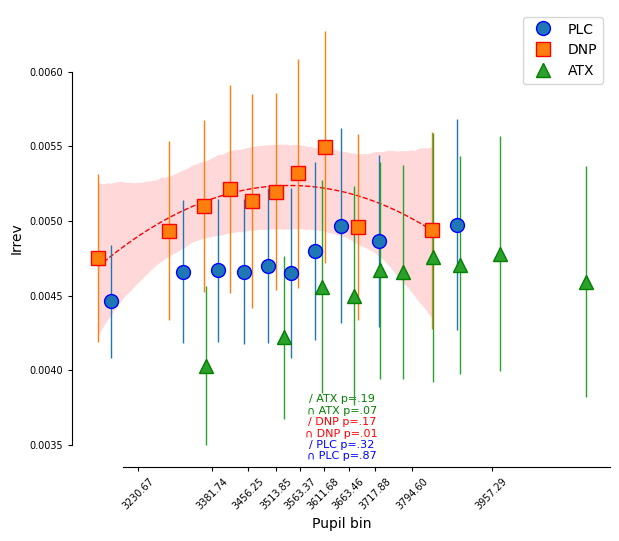

In [24]:
behavior = df
#behavior = remove_top_percentile(behavior, 'prestim_mean_alpha', 0.999)
#behavior = remove_top_percentile(behavior, 'poststim_mean_alpha', 0.999)
behavior = behavior[(behavior['poststim_irrev'] < 0.075) & (behavior['prestim_irrev'] < 0.075)]

behavior['irrev'] = behavior['bl_pupil']
cfg = {'n_bins': 10}  # Number of pupil bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    df_sdt_irreversibility['prestim_irrev'] = behavior.groupby(['subject','drug','irreversibility_bin']).mean()['prestim_irrev']
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['prestim_irrev'] < 0.05 or betas_second_irreversibility_plc['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_plc['prestim_irrev'] < betas_second_irreversibility_plc['prestim_irrev']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['prestim_irrev'] < betas_first_irreversibility_plc['prestim_irrev']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['prestim_irrev'] < 0.05 or betas_second_irreversibility_dnp['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_dnp['prestim_irrev'] < betas_second_irreversibility_dnp['prestim_irrev']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['prestim_irrev'] < betas_first_irreversibility_dnp['prestim_irrev']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['prestim_irrev'] < 0.05 or betas_second_irreversibility_atx['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_atx['prestim_irrev'] < betas_second_irreversibility_atx['prestim_irrev']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['prestim_irrev'] < betas_first_irreversibility_atx['prestim_irrev']:
        plot_quadratic_atx = True

# Plotting results for prestim_irrev'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="prestim_irrev", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_plc['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_dnp['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_atx['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('Irrev')
ax.set_xlabel('Pupil bin')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


### Poststim

C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irrev'] = df['log_poststim']
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: PLC
Bin means: irreversibility_bin
0   -6.326569
1   -5.923116
2   -5.673400
3   -5.422491
4   -4.977585
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: DNP
Bin means: irreversibility_bin
0   -6.283927
1   -5.881107
2   -5.637365
3   -5.383775
4   -4.956327
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: ATX
Bin means: irreversibility_bin
0   -6.421300
1   -6.029099
2   -5.787192
3   -5.539990
4   -5.106399
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:55: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:58: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:62: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 

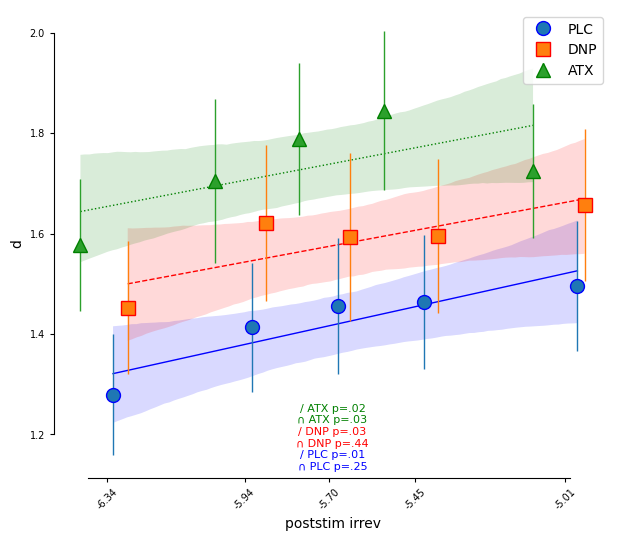

In [22]:
behavior = df
#behavior = remove_top_percentile(behavior, 'prestim_mean_alpha', 0.999)
#behavior = remove_top_percentile(behavior, 'poststim_mean_alpha', 0.999)
behavior = behavior[(behavior['poststim_irrev'] < 0.075) & (behavior['prestim_irrev'] < 0.075)]

behavior['irrev'] = df['log_poststim']
cfg = {'n_bins': 5}  # Number of pupil bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['d'] < 0.05 or betas_second_irreversibility_plc['d'] < 0.05:
    if betas_first_irreversibility_plc['d'] < betas_second_irreversibility_plc['d']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['d'] < betas_first_irreversibility_plc['d']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['d'] < 0.05 or betas_second_irreversibility_dnp['d'] < 0.05:
    if betas_first_irreversibility_dnp['d'] < betas_second_irreversibility_dnp['d']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['d'] < betas_first_irreversibility_dnp['d']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['d'] < 0.05 or betas_second_irreversibility_atx['d'] < 0.05:
    if betas_first_irreversibility_atx['d'] < betas_second_irreversibility_atx['d']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['d'] < betas_first_irreversibility_atx['d']:
        plot_quadratic_atx = True

# Plotting results for log_poststim'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['d']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['d']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['d']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="d", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['d']),
                                               p_val_string(betas_second_irreversibility_plc['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['d']),
                                               p_val_string(betas_second_irreversibility_dnp['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['d']),
                                               p_val_string(betas_second_irreversibility_atx['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('d')
ax.set_xlabel('poststim irrev')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


In [ ]:
behavior['irrev'] = behavior['bl_pupil']
cfg = {'n_bins': 10}  # Number of pupil bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    df_sdt_irreversibility['prestim_irrev'] = behavior.groupby(['subject','drug','irreversibility_bin']).mean()['prestim_irrev']
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['prestim_irrev'] < 0.05 or betas_second_irreversibility_plc['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_plc['prestim_irrev'] < betas_second_irreversibility_plc['prestim_irrev']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['prestim_irrev'] < betas_first_irreversibility_plc['prestim_irrev']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['prestim_irrev'] < 0.05 or betas_second_irreversibility_dnp['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_dnp['prestim_irrev'] < betas_second_irreversibility_dnp['prestim_irrev']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['prestim_irrev'] < betas_first_irreversibility_dnp['prestim_irrev']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['prestim_irrev'] < 0.05 or betas_second_irreversibility_atx['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_atx['prestim_irrev'] < betas_second_irreversibility_atx['prestim_irrev']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['prestim_irrev'] < betas_first_irreversibility_atx['prestim_irrev']:
        plot_quadratic_atx = True

# Plotting results for prestim_irrev'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="prestim_irrev", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_plc['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_dnp['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_atx['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('Irrev')
ax.set_xlabel('Pupil bin')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


## In Irreversibility Bins, how much FASTER are validly cued correct trials? No faster...

C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: PLC
Bin means: irreversibility_bin
0   -6.473361
1   -6.156054
2   -5.989957
3   -5.855844
4   -5.733434
5   -5.620810
6   -5.497536
7   -5.360734
8   -5.176924
9   -4.809604
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: DNP
Bin means: irreversibility_bin
0   -6.471246
1   -6.128713
2   -5.973448
3   -5.840156
4   -5.722829
5   -5.604067
6   -5.472093
7   -5.333558
8   -5.155333
9   -4.789583
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: ATX
Bin means: irreversibility_bin
0   -6.576446
1   -6.256369
2   -6.091220
3   -5.962498
4   -5.843051
5   -5.729879
6   -5.614081
7   -5.477015
8   -5.303184
9   -4.954458
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:57: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first_irreversibility_plc['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'RT'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:60: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second_irreversibility_plc['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'RT'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:64: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in Sc

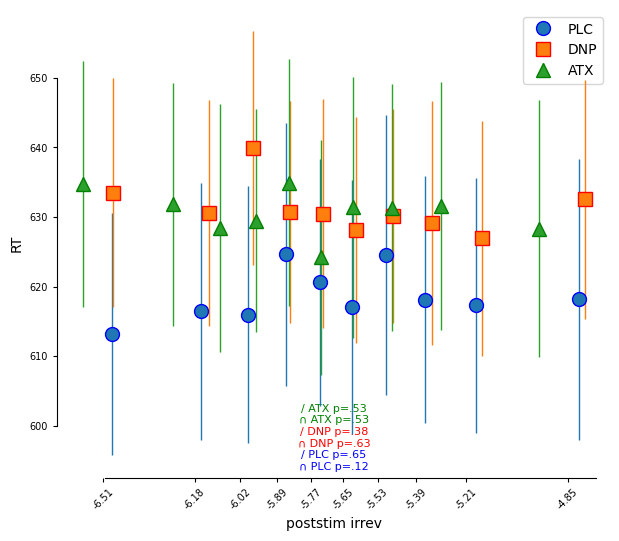

In [21]:
behavior = df
#behavior = remove_top_percentile(behavior, 'prestim_mean_alpha', 0.999)
#behavior = remove_top_percentile(behavior, 'poststim_mean_alpha', 0.999)
behavior = behavior[(behavior['poststim_irrev'] < 0.075) & (behavior['prestim_irrev'] < 0.075)]
behavior = behavior[(behavior['cue_val'] == 1)]
behavior = behavior[(behavior['correct'] == 1)]

behavior['irrev'] = behavior['log_poststim']
cfg = {'n_bins': 10}  # Number of bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    df_sdt_irreversibility['RT'] = behavior.groupby(['subject','drug','irreversibility_bin']).mean()['RT']
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'RT'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'RT'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'RT'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'RT'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'RT'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'RT'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['RT'] < 0.05 or betas_second_irreversibility_plc['RT'] < 0.05:
    if betas_first_irreversibility_plc['RT'] < betas_second_irreversibility_plc['RT']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['RT'] < betas_first_irreversibility_plc['RT']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['RT'] < 0.05 or betas_second_irreversibility_dnp['RT'] < 0.05:
    if betas_first_irreversibility_dnp['RT'] < betas_second_irreversibility_dnp['RT']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['RT'] < betas_first_irreversibility_dnp['RT']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['RT'] < 0.05 or betas_second_irreversibility_atx['RT'] < 0.05:
    if betas_first_irreversibility_atx['RT'] < betas_second_irreversibility_atx['RT']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['RT'] < betas_first_irreversibility_atx['RT']:
        plot_quadratic_atx = True

# Plotting results for log_poststim'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['RT']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['RT']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['RT']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['RT']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['RT']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['RT']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="RT", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['RT']),
                                               p_val_string(betas_second_irreversibility_plc['RT'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['RT']),
                                               p_val_string(betas_second_irreversibility_dnp['RT'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['RT']),
                                               p_val_string(betas_second_irreversibility_atx['RT'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('RT')
ax.set_xlabel('poststim irrev')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


# All Tau analysis

poststimulus

In [20]:
project_directory = os.path.dirname(os.path.dirname(os.path.abspath("clean_analysis_dataset1")))
base_directory = os.path.join(project_directory, r"data", r"fr_results")

df = pd.read_csv(os.path.join(project_directory, r"data", r"behavior_dataset1.csv"))

# Loop through tau1 to tau15
for i in range(1, 16):
    # Construct the filename dynamically
    file_name = f"FowRev_long_256to319_tau{i}.mat"
    file_path = os.path.join(base_directory, file_name)
    
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)
    
    # Extract and flatten the 'FowRev' array, assigning it to a new column in the DataFrame
    df[f'poststim_irrev_tau{i}'] = np.log(mat_data['FowRev'].flatten())
df['poststim_irrev_tau20'] = np.log(scipy.io.loadmat(os.path.join(os.path.join(project_directory, r"data", r"fr_results", r"FowRev_long_256to319_tau20.mat")))['FowRev'].flatten())
df['poststim_irrev_tau25'] = np.log(scipy.io.loadmat(os.path.join(os.path.join(project_directory, r"data", r"fr_results", r"FowRev_long_256to319_tau25.mat")))['FowRev'].flatten())
df.head()

Unnamed: 0  subject drug  session  block  miniblock  trial_nr  cue  \
0           0        1  DNP        0      1          0       316    1   
1           1        1  DNP        0      1          0       318    1   
2           2        1  DNP        0      1          0       319    0   
3           3        1  DNP        0      1          0       320    1   
4           4        1  DNP        0      1          0       321    1   

   location  cue_val  ...  poststim_irrev_tau8  poststim_irrev_tau9  \
0         1        1  ...            -5.517085            -5.574493   
1         1        1  ...            -4.848492            -4.861575   
2         1        0  ...            -4.914958            -5.087659   
3         1        1  ...            -5.184541            -5.284454   
4         1        1  ...            -4.896874            -5.009544   

   poststim_irrev_tau10  poststim_irrev_tau11  poststim_irrev_tau12  \
0             -5.562251             -5.528675             -5.618982   
1             -4.770124             -4.670515             -4.648972   
2             -5.035573             -4.827213             -4.727223   
3             -5.361434             -5.206306             -5.179774   
4             -5.076505             -5.121546             -5.021884   

   poststim_irrev_tau13  poststim_irrev_tau14  poststim_irrev_tau15  \
0             -5.616806             -5.622057             -5.588503   
1             -4.662290             -4.872395             -5.087244   
2             -4.748632             -4.709554             -4.676055   
3             -5.266396             -5.127429             -5.062256   
4             -4.899334             -4.708416             -4.700154   

   poststim_irrev_tau20  poststim_irrev_tau25  
0             -5.413977             -5.156922  
1             -5.048795             -5.158486  
2             -4.568768             -4.611803  
3             -4.870367             -4.975423  
4             -4.823737             -4.758000  

[5 rows x 34 columns]

prestimulus

In [21]:
project_directory = os.path.dirname(os.path.dirname(os.path.abspath("clean_analysis_dataset1")))
base_directory = os.path.join(project_directory, r"data", r"fr_results")

df = pd.read_csv(os.path.join(project_directory, r"data", r"behavior_dataset1.csv"))

# Loop through tau1 to tau20
for i in range(1, 21):
    # Construct the filename dynamically
    file_name = f"FowRev_prestim_tau{i}.mat"
    file_path = os.path.join(base_directory, file_name)
    
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)
    
    # Extract and flatten the 'FowRev' array, assigning it to a new column in the DataFrame
    df[f'prestim_irrev_tau{i}'] = np.log(mat_data['FowRev'].flatten())
df['prestim_irrev_tau25'] = np.log(scipy.io.loadmat(os.path.join(os.path.join(project_directory, r"data", r"fr_results", r"FowRev_prestim_tau20.mat")))['FowRev'].flatten())
df.head()

Unnamed: 0  subject drug  session  block  miniblock  trial_nr  cue  \
0           0        1  DNP        0      1          0       316    1   
1           1        1  DNP        0      1          0       318    1   
2           2        1  DNP        0      1          0       319    0   
3           3        1  DNP        0      1          0       320    1   
4           4        1  DNP        0      1          0       321    1   

   location  cue_val  ...  prestim_irrev_tau12  prestim_irrev_tau13  \
0         1        1  ...            -5.353448            -5.441779   
1         1        1  ...            -5.783719            -5.905045   
2         1        0  ...            -5.273834            -5.368400   
3         1        1  ...            -5.673552            -5.655039   
4         1        1  ...            -4.914568            -4.930025   

   prestim_irrev_tau14  prestim_irrev_tau15  prestim_irrev_tau16  \
0            -5.106239            -5.379513            -5.520566   
1            -5.730981            -5.419079            -5.375593   
2            -5.298762            -5.291243            -5.247449   
3            -5.643392            -5.249504            -4.936980   
4            -4.853260            -4.646818            -4.436749   

   prestim_irrev_tau17  prestim_irrev_tau18  prestim_irrev_tau19  \
0            -4.882875            -5.031154            -5.778244   
1            -5.425452            -5.230726            -5.116832   
2            -5.340117            -5.532875            -5.742192   
3            -5.115497            -5.404397            -5.576220   
4            -4.392201            -4.347419            -4.369646   

   prestim_irrev_tau20  prestim_irrev_tau25  
0            -5.549437            -5.549437  
1            -5.321701            -5.321701  
2            -5.535236            -5.535236  
3            -5.975819            -5.975819  
4            -4.433470            -4.433470  

[5 rows x 38 columns]

## prestim irrev x d' (split drugs)

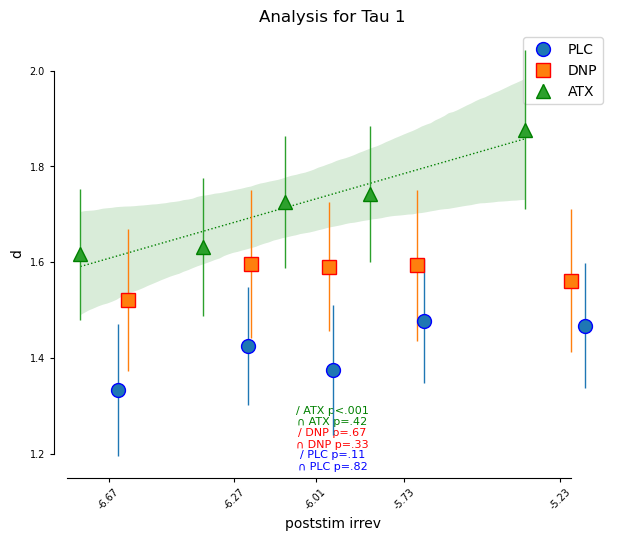

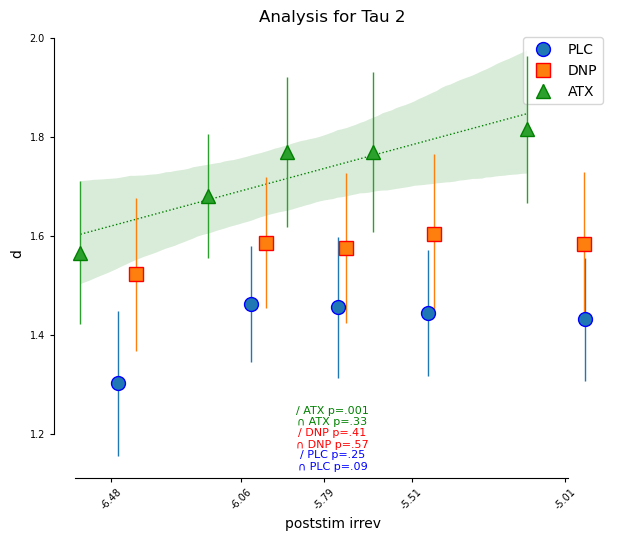

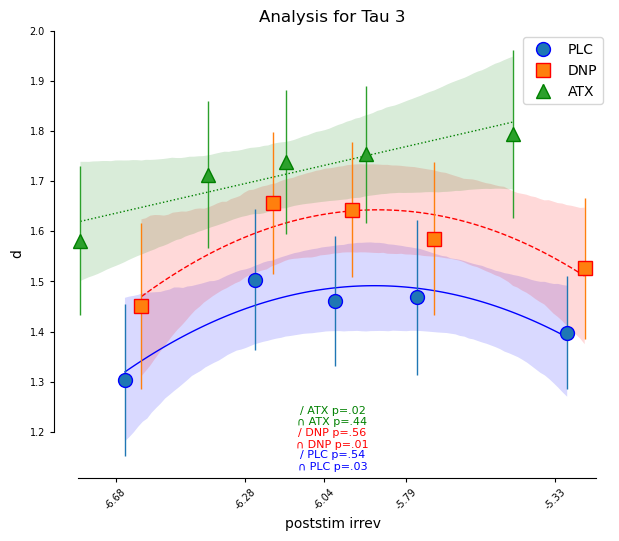

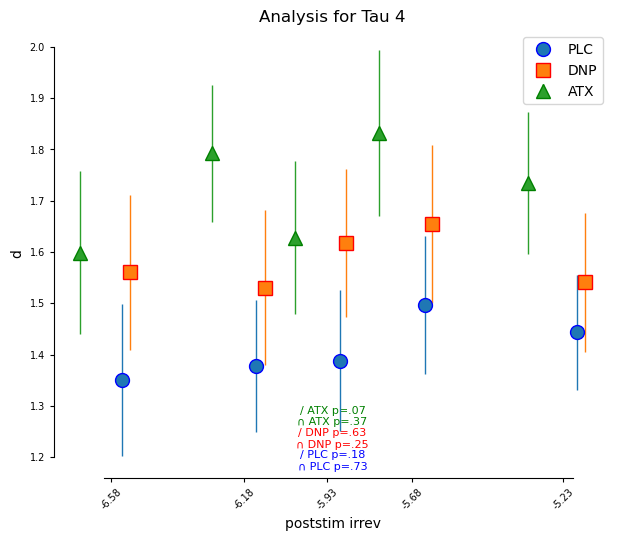

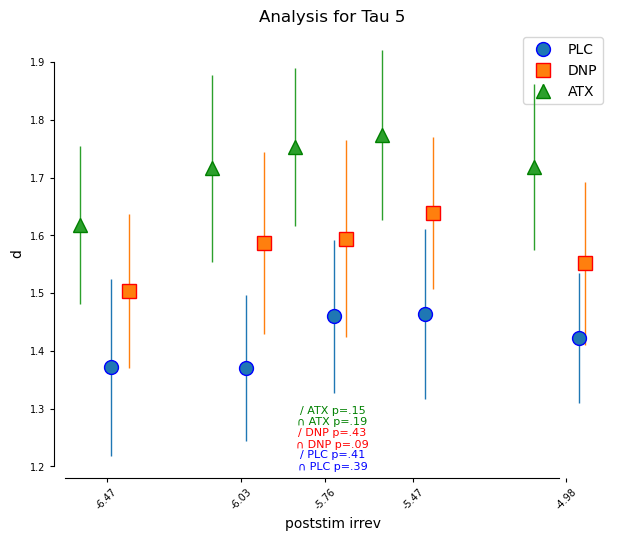

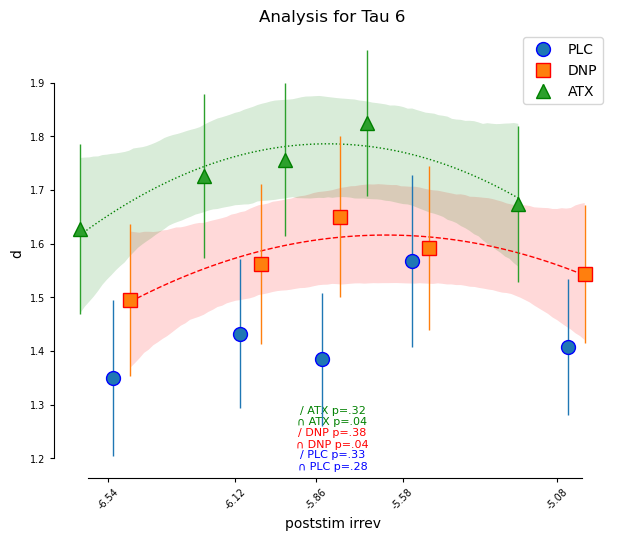

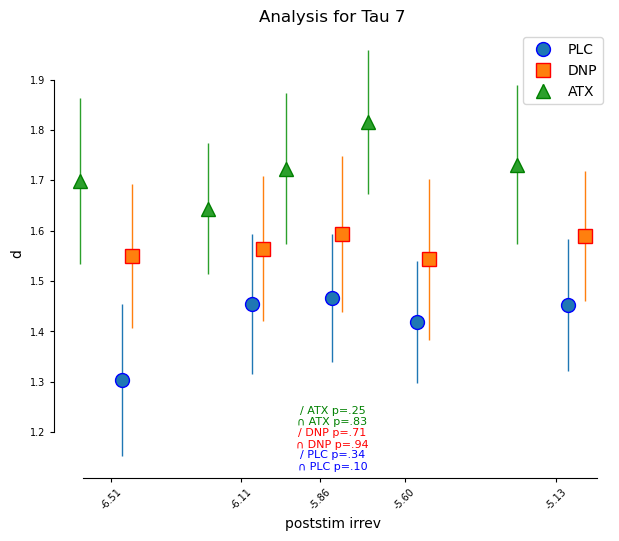

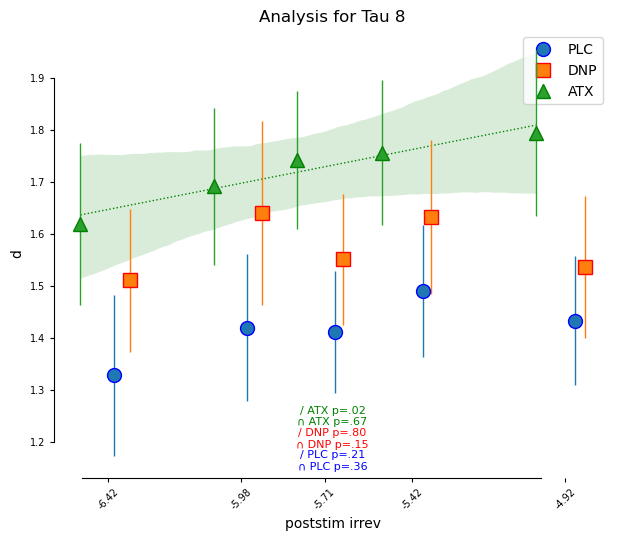

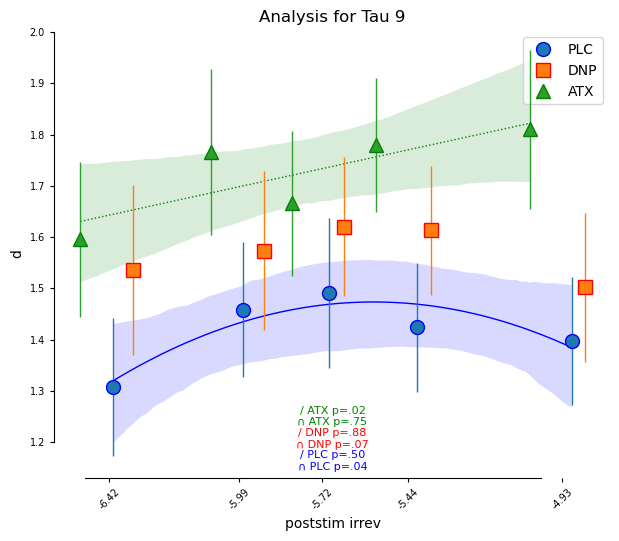

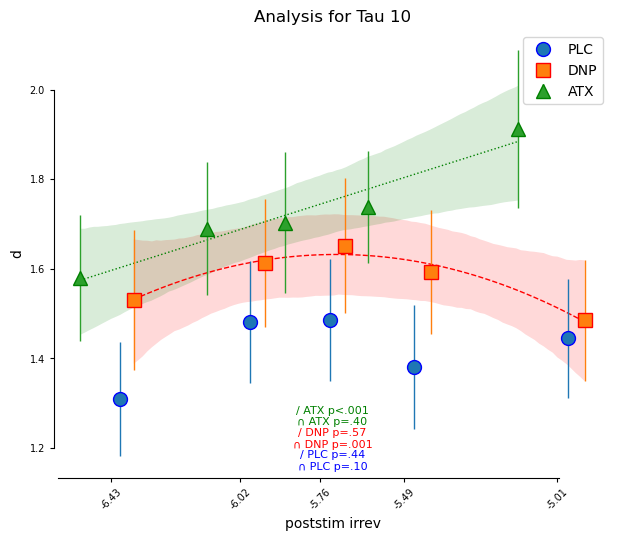

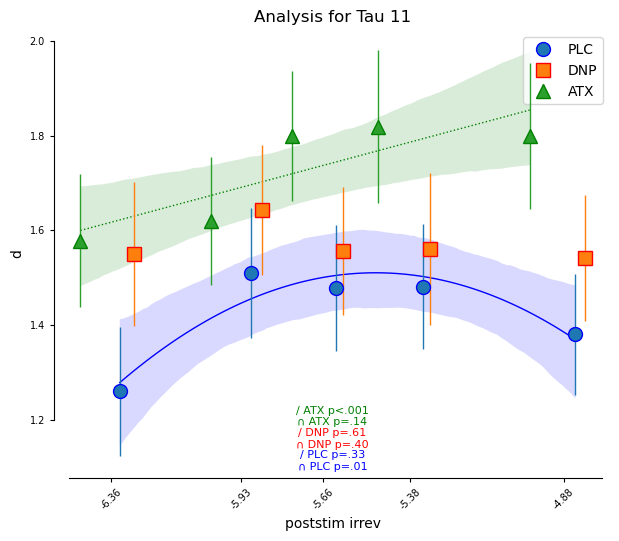

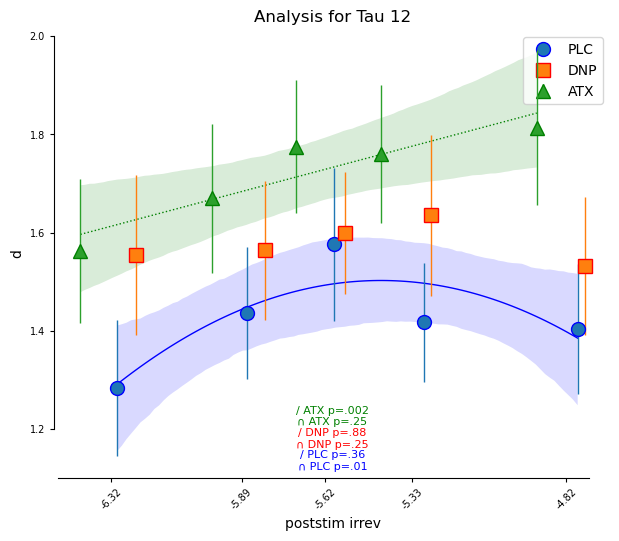

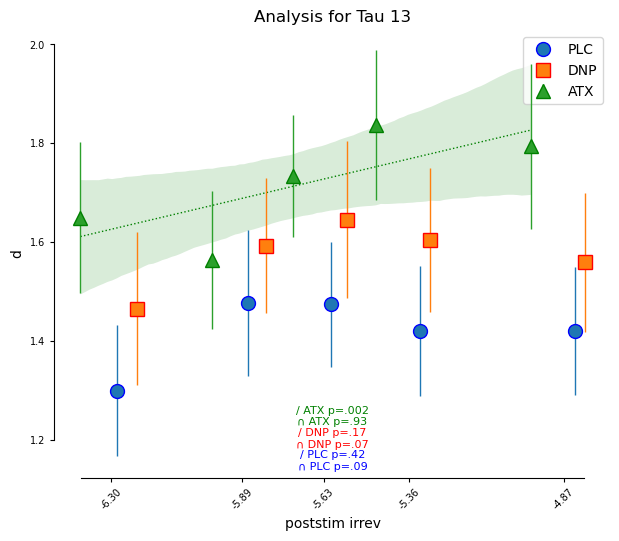

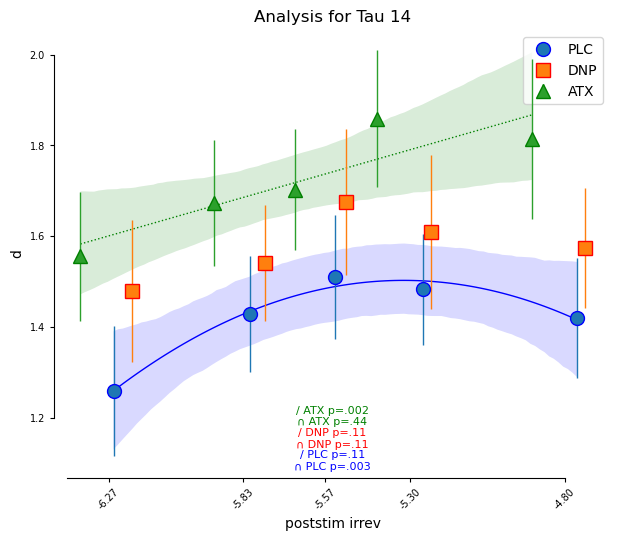

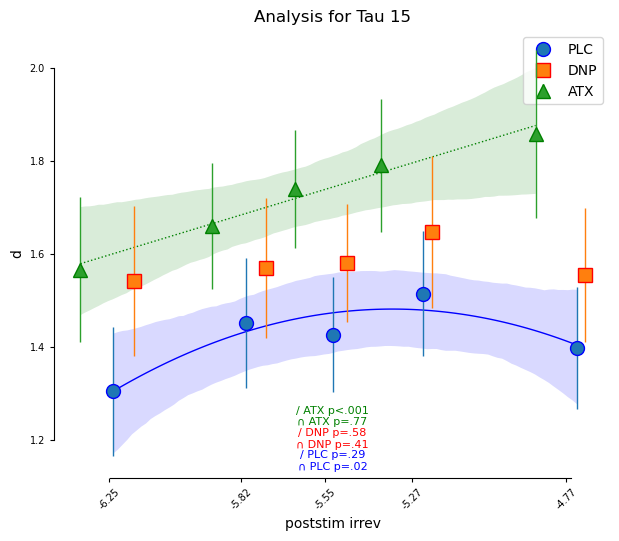

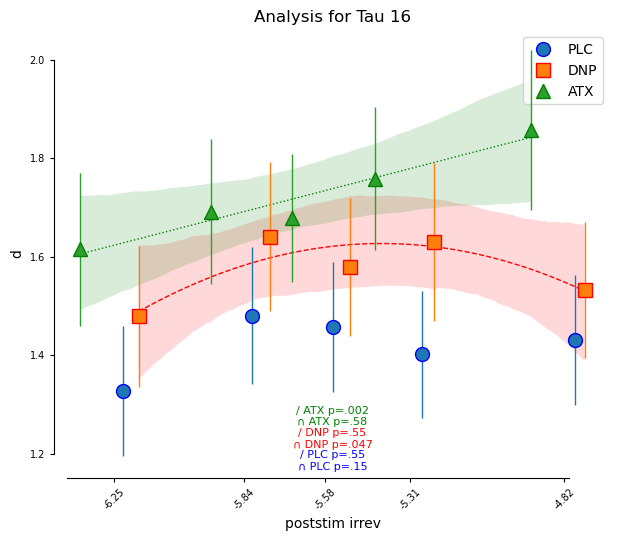

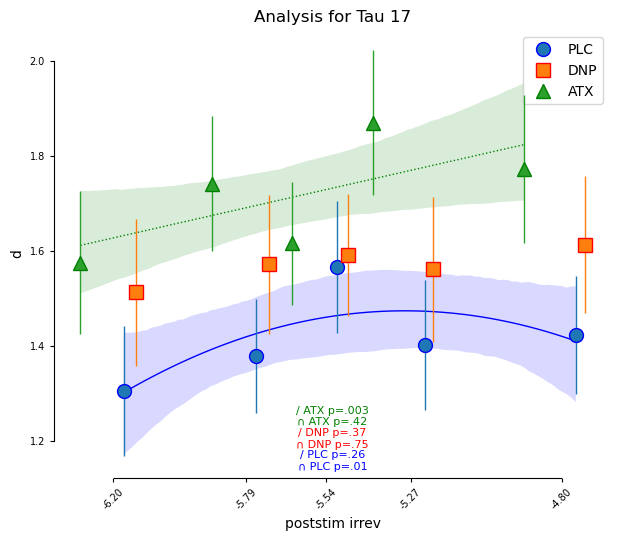

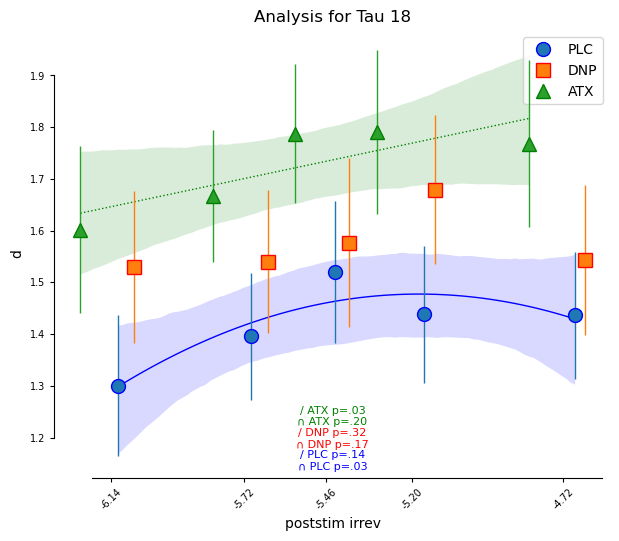

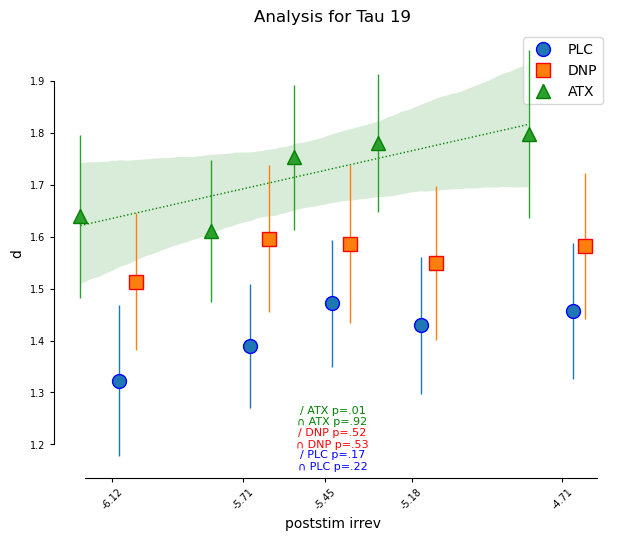

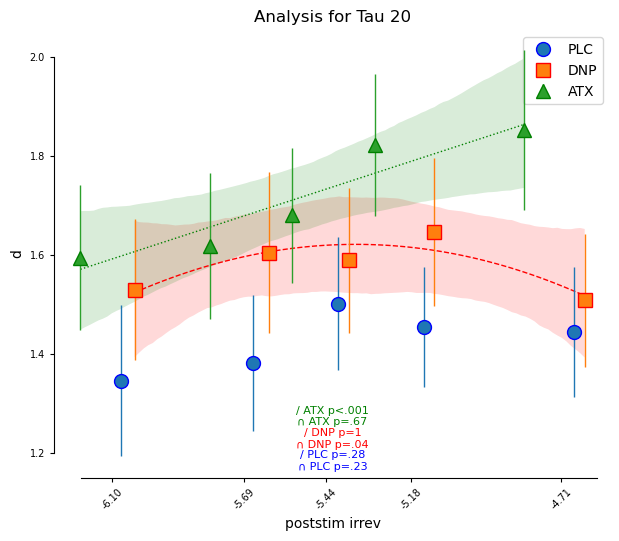

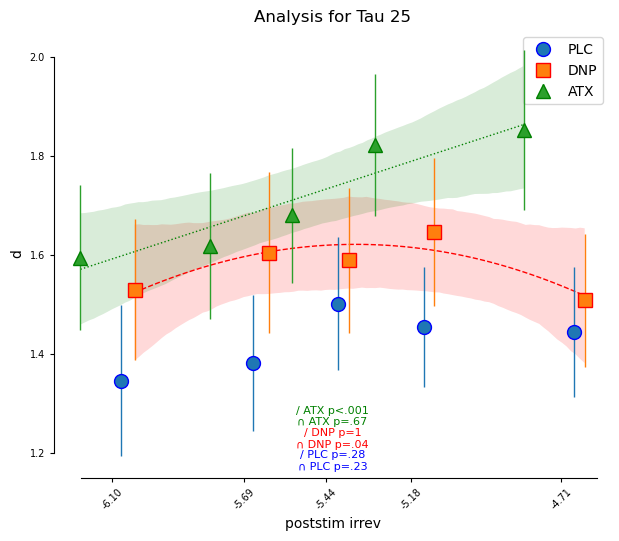

In [3]:
# Process each tau column dynamically
import warnings
warnings.filterwarnings("ignore")

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    #print("Drug: " + drug)
    #print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

cfg = {'n_bins': 5}
cm = 1 / 2.54 

for tau in list(range(1, 21)) + [25]:
    tau_col = f'prestim_irrev_tau{tau}'  # Tau column name
    
    # Filter and process the DataFrame for the current tau
    behavior = df.copy()
    #behavior = behavior[(behavior[tau_col] < 0.075)]
    behavior['irrev'] = behavior[tau_col]

    # Process data for each drug
    df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')
    df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')
    df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

    # Combine bin means
    total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

    # Combine data for plotting
    df_combined = pd.concat([
        df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
        df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
        df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
    ])

    # Plotting
    # Initialize variables to decide which model to plot
    plot_linear_plc = False
    plot_quadratic_plc = False
    plot_linear_dnp = False
    plot_quadratic_dnp = False
    plot_linear_atx = False
    plot_quadratic_atx = False

    # Calculate betas for PLC
    betas_first_irreversibility_plc = dict()
    _, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

    betas_second_irreversibility_plc = dict()
    _, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

    # Calculate betas for DNP
    betas_first_irreversibility_dnp = dict()
    _, betas_first_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

    betas_second_irreversibility_dnp = dict()
    _, betas_second_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

    # Calculate betas for ATX
    betas_first_irreversibility_atx = dict()
    _, betas_first_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

    betas_second_irreversibility_atx = dict()
    _, betas_second_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

    # Determine which model to plot for PLC based on the significance and smaller p-value
    if betas_first_irreversibility_plc['d'] < 0.05 or betas_second_irreversibility_plc['d'] < 0.05:
        if betas_first_irreversibility_plc['d'] < betas_second_irreversibility_plc['d']:
            plot_linear_plc = True
        elif betas_second_irreversibility_plc['d'] < betas_first_irreversibility_plc['d']:
            plot_quadratic_plc = True

    # Determine which model to plot for DNP based on the significance and smaller p-value
    if betas_first_irreversibility_dnp['d'] < 0.05 or betas_second_irreversibility_dnp['d'] < 0.05:
        if betas_first_irreversibility_dnp['d'] < betas_second_irreversibility_dnp['d']:
            plot_linear_dnp = True
        elif betas_second_irreversibility_dnp['d'] < betas_first_irreversibility_dnp['d']:
            plot_quadratic_dnp = True

    # Determine which model to plot for ATX based on the significance and smaller p-value
    if betas_first_irreversibility_atx['d'] < 0.05 or betas_second_irreversibility_atx['d'] < 0.05:
        if betas_first_irreversibility_atx['d'] < betas_second_irreversibility_atx['d']:
            plot_linear_atx = True
        elif betas_second_irreversibility_atx['d'] < betas_first_irreversibility_atx['d']:
            plot_quadratic_atx = True

    # Plotting results for log_poststim'
    cm = 1 / 2.54  # Conversion factor to cm
    fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

    # PLC data
    ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['d']
    yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['d']
    ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

    # DNP data
    ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['d']
    yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['d']
    ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

    # ATX data
    ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['d']
    yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['d']
    ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

    # Plot linear/quadratic fit for each drug
    def plot_fit(ax, df, color, linestyle, order):
        sns.regplot(ax=ax, data=df, x="bin_mean", y="d", scatter=False, color=color,
                    line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

    # Optionally add model fits if linear/quadratic fit was significant for PLC
    if plot_linear_plc:
        plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
    if plot_quadratic_plc:
        plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

    # Optionally add model fits if linear/quadratic fit was significant for DNP
    if plot_linear_dnp:
        plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
    if plot_quadratic_dnp:
        plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

    # Optionally add model fits if linear/quadratic fit was significant for ATX
    if plot_linear_atx:
        plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
    if plot_quadratic_atx:
        plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

    # Plot p-values for the polynomial regression significance
    ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['d']),
                                                p_val_string(betas_second_irreversibility_plc['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

    ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['d']),
                                                p_val_string(betas_second_irreversibility_dnp['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

    ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['d']),
                                                p_val_string(betas_second_irreversibility_atx['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

    sns.despine(ax=ax, offset=1, trim=True)

    # Setting labels and titles
    ax.set_ylabel('d')
    ax.set_xlabel('poststim irrev')
    ax.set_title(f'Analysis for Tau {tau}')

    labels = []
    for i in range(cfg['n_bins']):
        labels.append(f"{total_bin_means[i]:.2f}")

    ax.set_xticks(total_bin_means)
    ax.set_xticklabels(labels, rotation=45)
    ax.tick_params(axis='both', which='major', labelsize=7, length=3)

    ax.legend()
    fig.tight_layout()
    plt.show()



## prestim irrev x d' (all drugs)


----- Analysis for tau = 1 -----
irreversibility_bin
0   -6.669714
1   -6.271704
2   -6.012618
3   -5.732749
4   -5.235482
Name: irreversibility, dtype: float64


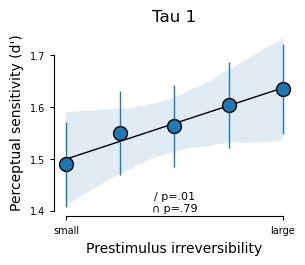


----- Analysis for tau = 2 -----
irreversibility_bin
0   -6.480692
1   -6.059297
2   -5.792055
3   -5.507048
4   -5.008502
Name: irreversibility, dtype: float64


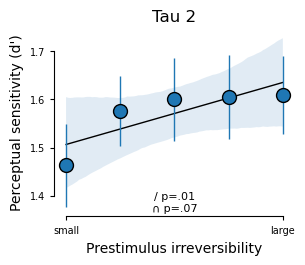


----- Analysis for tau = 3 -----
irreversibility_bin
0   -6.684367
1   -6.283758
2   -6.040461
3   -5.788506
4   -5.328840
Name: irreversibility, dtype: float64


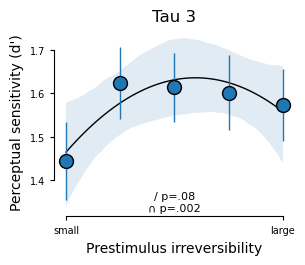


----- Analysis for tau = 4 -----
irreversibility_bin
0   -6.581546
1   -6.182607
2   -5.935628
3   -5.682507
4   -5.230092
Name: irreversibility, dtype: float64


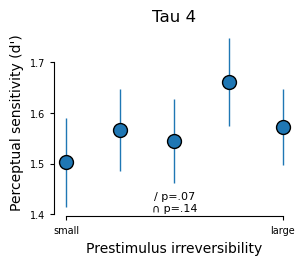


----- Analysis for tau = 5 -----
irreversibility_bin
0   -6.467002
1   -6.032100
2   -5.759197
3   -5.473215
4   -4.978390
Name: irreversibility, dtype: float64


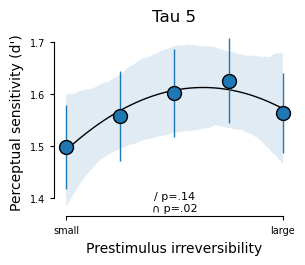


----- Analysis for tau = 6 -----
irreversibility_bin
0   -6.536668
1   -6.124708
2   -5.862874
3   -5.581428
4   -5.080187
Name: irreversibility, dtype: float64


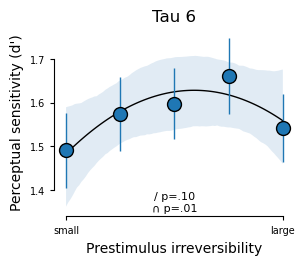


----- Analysis for tau = 7 -----
irreversibility_bin
0   -6.511933
1   -6.109017
2   -5.862201
3   -5.599008
4   -5.126097
Name: irreversibility, dtype: float64


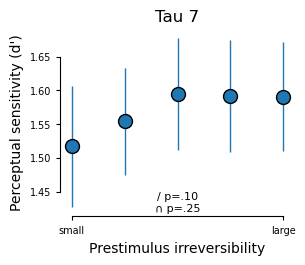


----- Analysis for tau = 8 -----
irreversibility_bin
0   -6.415969
1   -5.981230
2   -5.707868
3   -5.422748
4   -4.922451
Name: irreversibility, dtype: float64


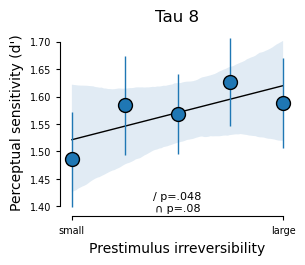


----- Analysis for tau = 9 -----
irreversibility_bin
0   -6.421796
1   -5.992676
2   -5.721267
3   -5.436715
4   -4.929488
Name: irreversibility, dtype: float64


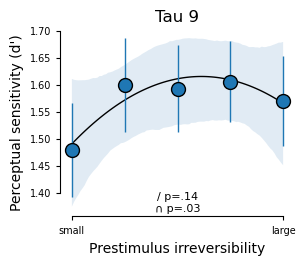


----- Analysis for tau = 10 -----
irreversibility_bin
0   -6.428941
1   -6.017649
2   -5.763558
3   -5.494222
4   -5.007755
Name: irreversibility, dtype: float64


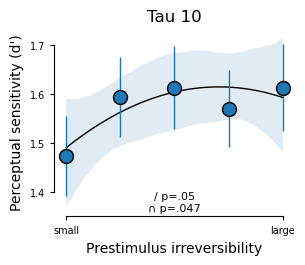


----- Analysis for tau = 11 -----
irreversibility_bin
0   -6.360613
1   -5.933997
2   -5.664070
3   -5.379559
4   -4.876197
Name: irreversibility, dtype: float64


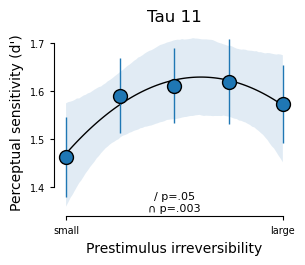


----- Analysis for tau = 12 -----
irreversibility_bin
0   -6.325186
1   -5.895480
2   -5.620444
3   -5.332679
4   -4.824388
Name: irreversibility, dtype: float64


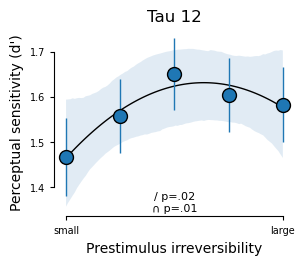


----- Analysis for tau = 13 -----
irreversibility_bin
0   -6.303232
1   -5.888503
2   -5.629546
3   -5.358762
4   -4.867047
Name: irreversibility, dtype: float64


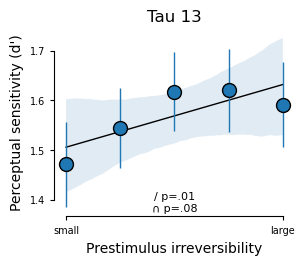


----- Analysis for tau = 14 -----
irreversibility_bin
0   -6.265578
1   -5.834248
2   -5.570900
3   -5.298042
4   -4.802478
Name: irreversibility, dtype: float64


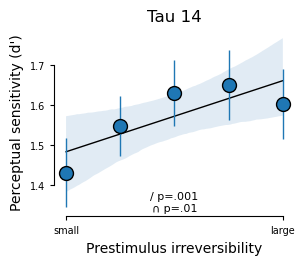


----- Analysis for tau = 15 -----
irreversibility_bin
0   -6.251100
1   -5.821765
2   -5.549519
3   -5.266036
4   -4.765872
Name: irreversibility, dtype: float64


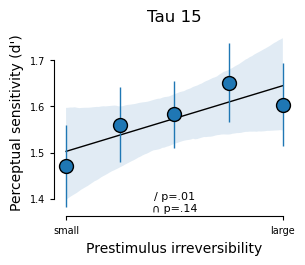


----- Analysis for tau = 20 -----
irreversibility_bin
0   -6.104879
1   -5.694710
2   -5.439847
3   -5.176939
4   -4.711252
Name: irreversibility, dtype: float64


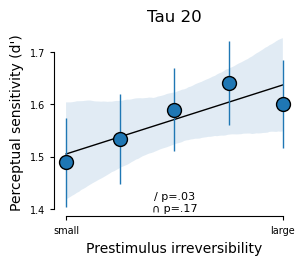


----- Analysis for tau = 25 -----
irreversibility_bin
0   -6.104879
1   -5.694710
2   -5.439847
3   -5.176939
4   -4.711252
Name: irreversibility, dtype: float64


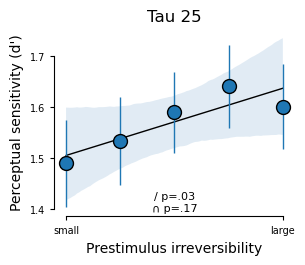

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests

# List of tau values (1 through 15, plus 20 and 25)
taus = list(range(1, 16)) + [20, 25]
cfg = {'n_bins': 5}  # Number of pupil bins

for tau in taus:
    # Create a working copy of the data and set the "irreversibility" column to the tau-specific column
    behavior = df.copy()
    tau_col = f'prestim_irrev_tau{tau}'
    behavior['irreversibility'] = behavior[tau_col]
    
    # Sort the DataFrame for proper binning by subject, session, and block
    df_group = behavior.sort_values(by=['subject', 'session', 'block'])
    
    # Create pupil bins for each subject, session, and block using quantile-based bins
    df_group['irreversibility_bin'] = np.concatenate(
        np.ravel(
            df_group.groupby(['subject', 'session', 'block'])['irreversibility']
            .agg(lambda x: list(pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))))
        )
    )
    
    correct_counts = True
    # Compute SDT parameters per subject, drug, and pupil bin using your sdt function.
    df_sdt = df_group.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    # For each grouping, assign the mean "irreversibility" value (taken from the original data)
    df_sdt['irreversibility'] = df_group.groupby(['subject', 'drug', 'irreversibility_bin']).mean()['irreversibility']
    
    # Collapse across drugs by averaging to get subject-level data for each bin.
    df_subject = df_sdt.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject.reset_index(inplace=True)
    
    # (Optional) Print the mean irreversibility per bin for an overview.
    print(f"\n----- Analysis for tau = {tau} -----")
    print(df_group.groupby('irreversibility_bin').mean()['irreversibility'])
    
    # Run model fits on the pupil bins for each subject using your run_model_irrevbin function.
    # Here we test for a significant linear (order=1) and quadratic (order=2) relationship for 'd'.
    betas_first = dict()
    _, betas_first['d'] = sp.stats.ttest_1samp(
        df_subject.groupby('subject').apply(run_model_irrevbin, 1, 'd'),
        0
    )
    betas_second = dict()
    _, betas_second['d'] = sp.stats.ttest_1samp(
        df_subject.groupby('subject').apply(run_model_irrevbin, 2, 'd'),
        0
    )
    
    # Begin plotting results for perceptual sensitivity (d')
    cm = 1 / 2.54  # Conversion factor from cm to inches for figure sizing
    fig, ax = plt.subplots(figsize=(8 * cm, 7 * cm))
    
    # Compute mean and SEM (standard error) for each irreversibility bin from the SDT results.
    ym = df_sdt.groupby('irreversibility_bin').mean()['d']
    yerr = df_sdt.groupby('irreversibility_bin').sem()['d']
    ax.errorbar(range(cfg['n_bins']), ym, yerr=yerr, capsize=0, ls='None',
                marker='o', alpha=1, zorder=1000, ms=10, mew=1,
                elinewidth=1, markeredgecolor='k')
    
    # Extract p-values from the regression tests
    p_val_linear = betas_first['d']
    p_val_quadratic = betas_second['d']
    
    # Determine which model to overlay based on significance (and choose the model with the smaller p-value)
    plot_linear = False
    plot_quadratic = False
    if (p_val_linear < 0.05) or (p_val_quadratic < 0.05):
        if p_val_linear < p_val_quadratic:
            plot_linear = True
        elif p_val_quadratic < p_val_linear:
            plot_quadratic = True
    
    # Overlay a linear fit if significant.
    if plot_linear:
        sns.regplot(ax=ax, data=df_subject, x="irreversibility_bin", y="d",
                    scatter=False, color=sns.color_palette('Set1', 2)[-1],
                    line_kws={'linestyle': '-', 'lw': 1}, order=1, ci=68)
        ax.get_lines()[-1].set_color('k')
    
    # Otherwise, overlay a quadratic fit if that is more significant.
    if plot_quadratic:
        sns.regplot(ax=ax, data=df_subject, x="irreversibility_bin", y="d",
                    scatter=False, color=sns.color_palette('Set1', 2)[-1],
                    line_kws={'linestyle': '-', 'lw': 1}, order=2, ci=68)
        ax.get_lines()[-1].set_color('k')
    
    # Annotate the plot with the formatted p-values from the regression tests.
    ax.text(0.5, 0.01,
            '/ {}\n∩ {}'.format(p_val_string(betas_first['d']),
                                 p_val_string(betas_second['d'])),
            ha='center', va='bottom', transform=ax.transAxes, size=8)
    
    sns.despine(ax=ax, offset=1, trim=True)
    
    # Set labels, ticks, and titles.
    ax.set_ylabel("Perceptual sensitivity (d')")
    ax.set_xlabel('Prestimulus irreversibility')
    ax.set_xticks([0, cfg['n_bins'] - 1])
    ax.set_xticklabels(['small', 'large'])
    ax.tick_params(axis='both', which='major', labelsize=7, length=3)
    ax.set_title(f'Tau {tau}')
    
    fig.tight_layout()
    plt.show()


## prestim pupil x irrev (all drugs collapsed)

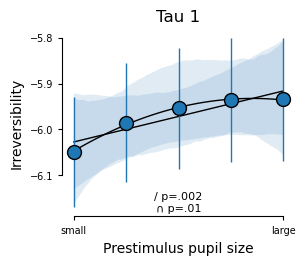

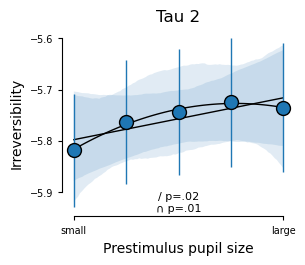

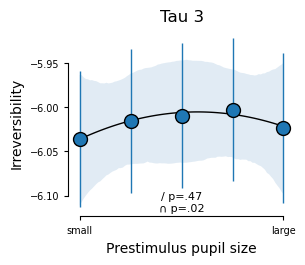

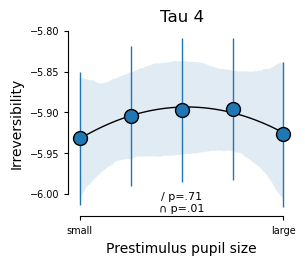

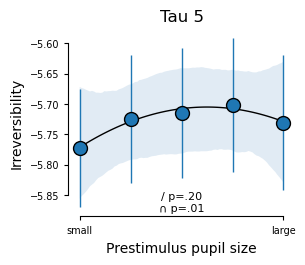

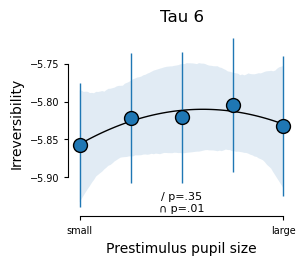

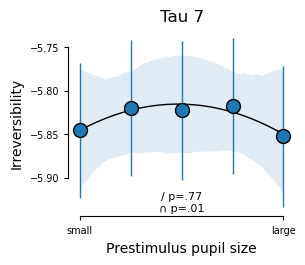

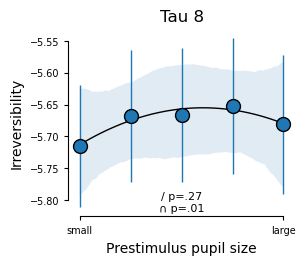

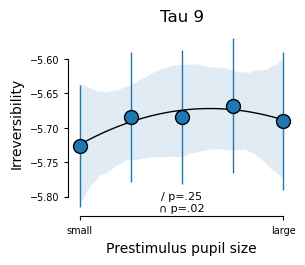

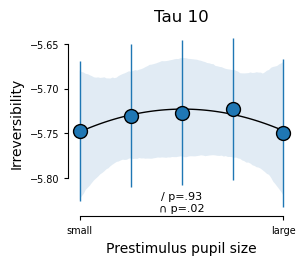

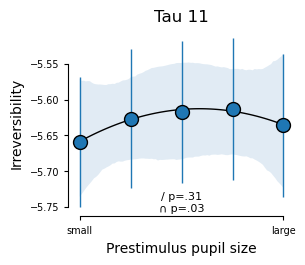

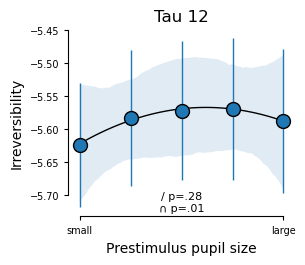

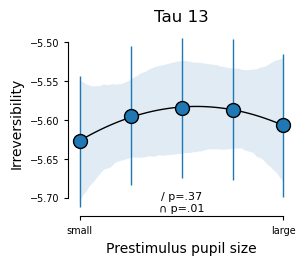

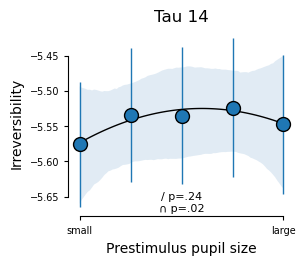

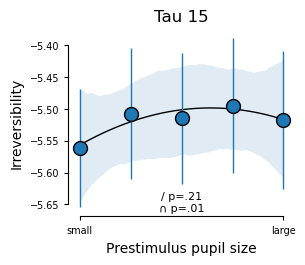

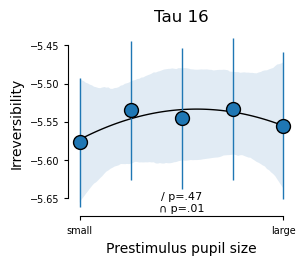

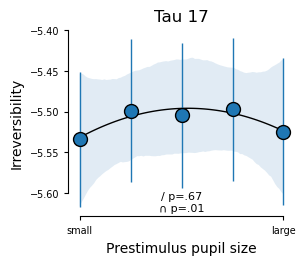

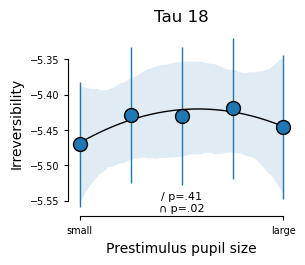

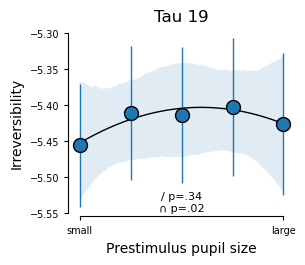

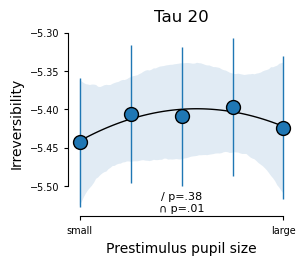

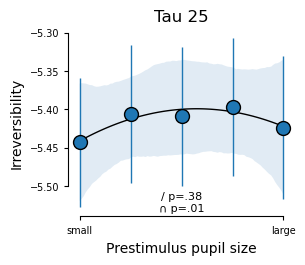

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# List of tau values (columns) to iterate over
taus = list(range(1, 21)) + [25]
cfg = {'n_bins': 5}  # Number of pupil bins

# Loop over each tau value
for tau in taus:
    # Create a working copy of the data and set the "irreversibility" column to the current tau
    behavior = df.copy()
    tau_col = f'prestim_irrev_tau{tau}'
    behavior['irreversibility'] = behavior[tau_col]

    # Sort the DataFrame (for binning)
    df_group = behavior.sort_values(by=['subject', 'session', 'block'])

    # Create pupil bins per subject, session, and block (using quantile-based bins)
    # Note: We use np.concatenate with np.ravel() to flatten the list of arrays from groupby.
    df_group['bl_pupil_bin'] = np.concatenate(np.ravel(
        df_group.groupby(['subject', 'session', 'block'])['bl_pupil']
        .agg(lambda x: list(pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))))
    ))

    # Calculate SDT parameters per subject, drug, and pupil bin.
    correct_counts = True
    df_sdt = df_group.groupby(['subject', 'drug', 'bl_pupil_bin']).apply(lambda x: sdt(x, correct_counts))
    # For each grouping, take the mean "irreversibility" value.
    df_sdt['irreversibility'] = df_group.groupby(['subject', 'drug', 'bl_pupil_bin']).mean()['irreversibility']

    # Collapse across drugs by averaging (or change grouping as needed) to get subject-level data.
    df_subject = df_sdt.groupby(['subject', 'bl_pupil_bin']).mean()
    df_subject.reset_index(inplace=True)
    df_irrev = df_subject  # Rename for clarity in plotting

    # Run model fits on the pupil bins for each subject
    # Here, run_model_pupilbin is applied per subject with model order 1 (linear) and 2 (quadratic)
    # Run model fits on the pupil bins for each subject
    # Here, run_model_pupilbin is applied per subject with model order 1 (linear) and 2 (quadratic)
    betas_first = dict()
    t_stat1, p_val1 = sp.stats.ttest_1samp(
        df_irrev.groupby('subject').apply(run_model_pupilbin, 1, 'irreversibility'),
        0
    )
    betas_first['irreversibility'] = p_val1

    betas_second = dict()
    t_stat2, p_val2 = sp.stats.ttest_1samp(
        df_irrev.groupby('subject').apply(run_model_pupilbin, 2, 'irreversibility'),
        0
    )
    betas_second['irreversibility'] = p_val2


    # Plotting
    cm = 1 / 2.54  # Conversion factor from cm to inches for figure sizing
    fig, ax = plt.subplots(figsize=(8 * cm, 7 * cm))

    # Compute mean and SEM across subjects for each pupil bin
    ym = df_irrev.groupby('bl_pupil_bin').mean()['irreversibility']
    yerr = df_irrev.groupby('bl_pupil_bin').sem()['irreversibility']

    # Plot error bars (mean ± SEM)
    ax.errorbar(range(cfg['n_bins']), ym, yerr=yerr, capsize=0, ls='None', marker='o',
                alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='k')

    # Optionally add a linear fit if significant (model order 1)
    if betas_first['irreversibility'] < 0.05:
        sns.regplot(ax=ax, data=df_irrev, x="bl_pupil_bin", y="irreversibility",
                    scatter=False, color=sns.color_palette('Set1', 2)[-1],
                    line_kws={'linestyle': '-', 'lw': 1}, order=1, ci=68)
        # Adjust line color for visibility
        ax.get_lines()[-1].set_color('k')

    # Optionally add a quadratic fit if significant (model order 2)
    if betas_second['irreversibility'] < 0.05:
        sns.regplot(ax=ax, data=df_irrev, x="bl_pupil_bin", y="irreversibility",
                    scatter=False, color=sns.color_palette('Set1', 2)[-1],
                    line_kws={'linestyle': '-', 'lw': 1}, order=2, ci=68)
        ax.get_lines()[-1].set_color('k')

    # Annotate the plot with the p-values from the regression tests.
    # Here, p_val_string is assumed to be a function that nicely formats p-values.
    ax.text(0.5, 0.01,
            '/ {}\n∩ {}'.format(p_val_string(betas_first['irreversibility']),
                                 p_val_string(betas_second['irreversibility'])),
            ha='center', va='bottom', transform=ax.transAxes, size=8)

    sns.despine(ax=ax, offset=1, trim=True)

    # Set labels and titles
    ax.set_ylabel('Irreversibility')
    ax.set_xlabel('Prestimulus pupil size')
    ax.set_xticks([0, cfg['n_bins'] - 1])
    ax.set_xticklabels(['small', 'large'])
    ax.tick_params(axis='both', which='major', labelsize=7, length=3)

    # Add a title to show which tau is being plotted.
    ax.set_title(f'Tau {tau}')

    fig.tight_layout()
    plt.show()


## Drug effects on Prestimulus Irrev


----- Analysis for tau = 1 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.015618  0.017384  0.013909
2        0.007233  0.006911  0.006603
3        0.001932  0.001832  0.002092
4        0.001601  0.001973  0.002085
5        0.001298  0.001752  0.002131
Overall mean for each drug:
  PLC: 0.0041
  DNP: 0.0044
  ATX: 0.0038
Paired t-test PLC vs DNP (n=28): t = -1.305, p = 0.2028
Paired t-test PLC vs ATX (n=28): t = 0.842, p = 0.4070
Paired t-test DNP vs ATX (n=28): t = 2.159, p = 0.0399


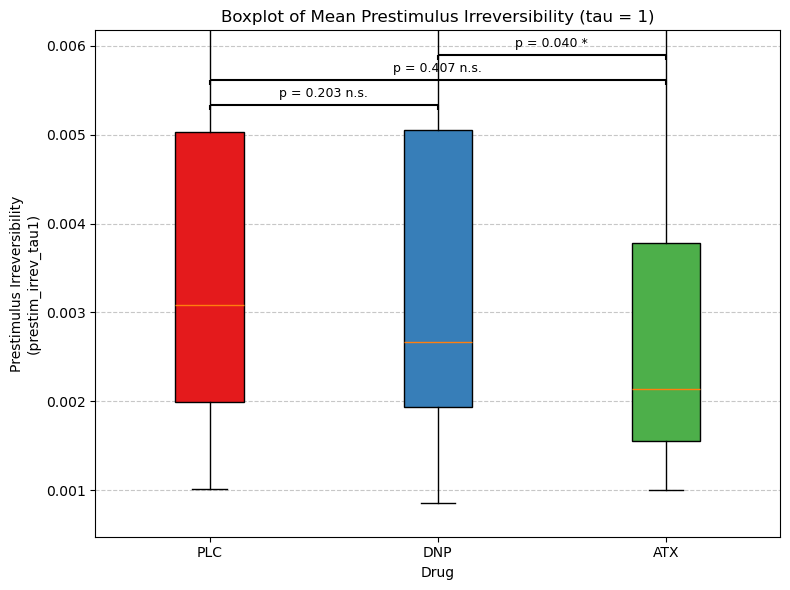


----- Analysis for tau = 2 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.015707  0.017442  0.013938
2        0.007787  0.007111  0.006499
3        0.003930  0.003137  0.003707
4        0.002725  0.003221  0.002915
5        0.001717  0.002386  0.002925
Overall mean for each drug:
  PLC: 0.0048
  DNP: 0.0053
  ATX: 0.0044
Paired t-test PLC vs DNP (n=28): t = -1.791, p = 0.0846
Paired t-test PLC vs ATX (n=28): t = 0.953, p = 0.3491
Paired t-test DNP vs ATX (n=28): t = 2.617, p = 0.0143


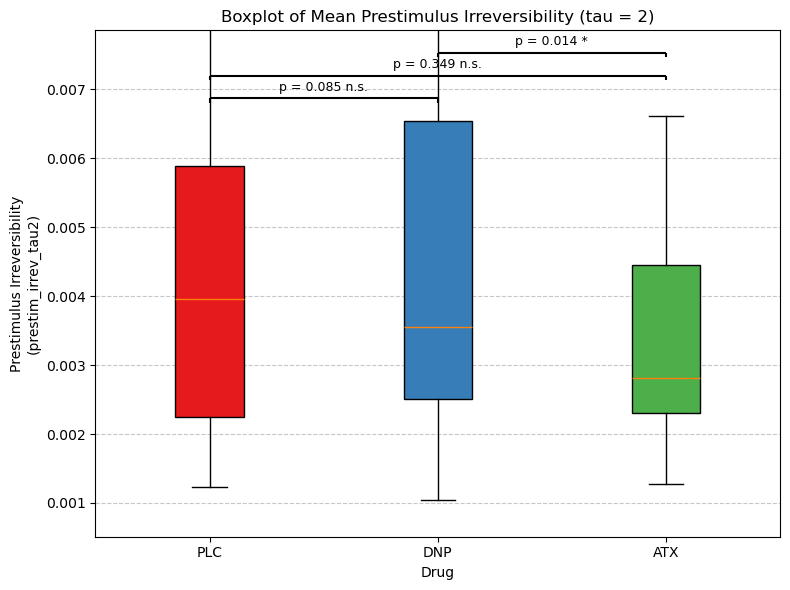


----- Analysis for tau = 3 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.004360  0.005132  0.003808
2        0.003600  0.003395  0.003228
3        0.005199  0.003766  0.004466
4        0.003785  0.004173  0.003334
5        0.001926  0.002407  0.003059
Overall mean for each drug:
  PLC: 0.0031
  DNP: 0.0034
  ATX: 0.0028
Paired t-test PLC vs DNP (n=28): t = -1.827, p = 0.0787
Paired t-test PLC vs ATX (n=28): t = 1.767, p = 0.0886
Paired t-test DNP vs ATX (n=28): t = 3.114, p = 0.0043


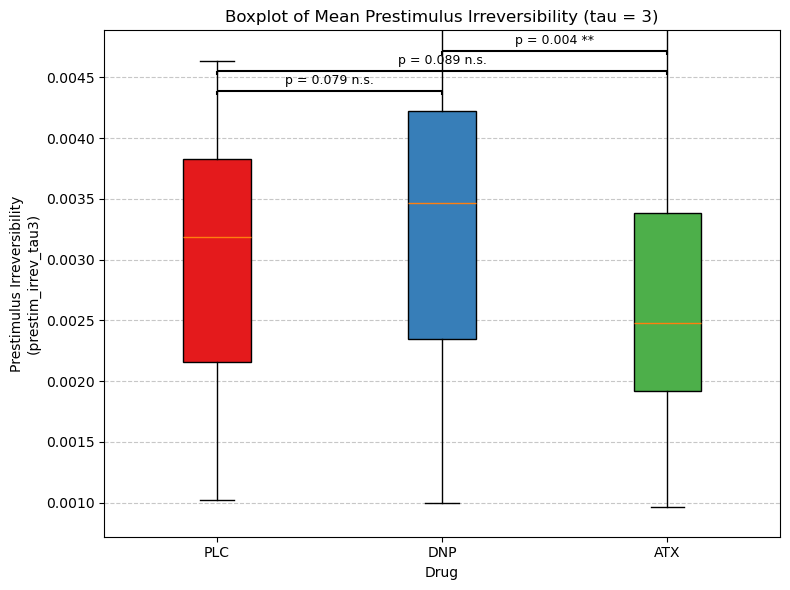


----- Analysis for tau = 4 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.006066  0.007869  0.005907
2        0.003770  0.003871  0.004124
3        0.006071  0.004334  0.004996
4        0.004956  0.005118  0.003827
5        0.002163  0.002698  0.003513
Overall mean for each drug:
  PLC: 0.0035
  DNP: 0.0037
  ATX: 0.0032
Paired t-test PLC vs DNP (n=28): t = -1.172, p = 0.2516
Paired t-test PLC vs ATX (n=28): t = 1.557, p = 0.1311
Paired t-test DNP vs ATX (n=28): t = 2.527, p = 0.0177


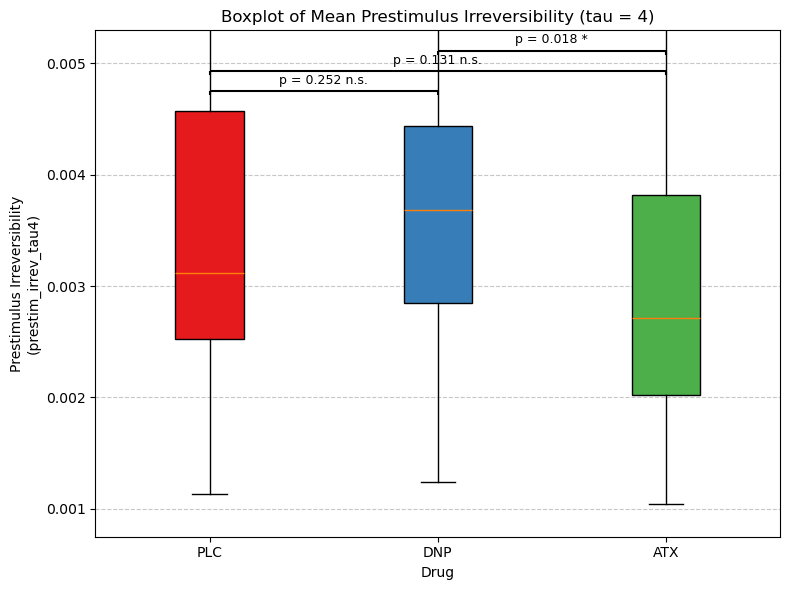


----- Analysis for tau = 5 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.013421  0.015087  0.012114
2        0.006118  0.005484  0.005472
3        0.006811  0.004855  0.005461
4        0.006171  0.006061  0.004281
5        0.002475  0.003151  0.004044
Overall mean for each drug:
  PLC: 0.0046
  DNP: 0.0050
  ATX: 0.0044
Paired t-test PLC vs DNP (n=28): t = -1.526, p = 0.1387
Paired t-test PLC vs ATX (n=28): t = 0.680, p = 0.5025
Paired t-test DNP vs ATX (n=28): t = 2.172, p = 0.0388


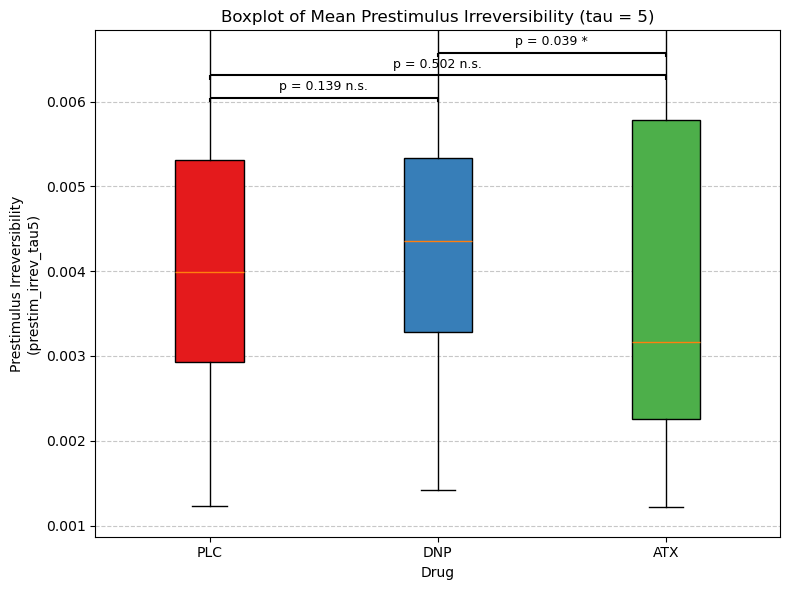


----- Analysis for tau = 6 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.008036  0.007925  0.006550
2        0.005122  0.004577  0.004279
3        0.007367  0.005203  0.005779
4        0.007166  0.006905  0.004618
5        0.002563  0.003155  0.004122
Overall mean for each drug:
  PLC: 0.0039
  DNP: 0.0042
  ATX: 0.0036
Paired t-test PLC vs DNP (n=28): t = -1.439, p = 0.1616
Paired t-test PLC vs ATX (n=28): t = 0.827, p = 0.4157
Paired t-test DNP vs ATX (n=28): t = 2.313, p = 0.0286


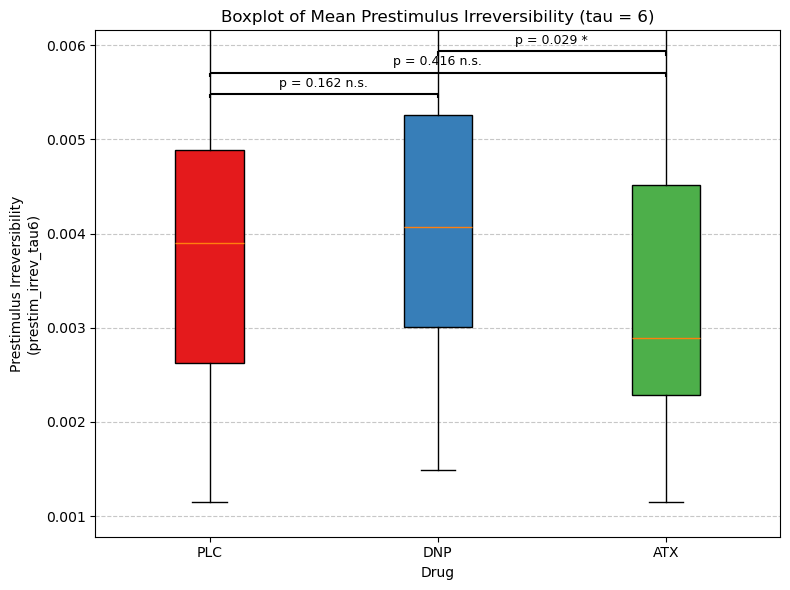


----- Analysis for tau = 7 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.005024  0.006572  0.004951
2        0.004161  0.004602  0.004434
3        0.007791  0.005562  0.006024
4        0.008122  0.007700  0.004898
5        0.002618  0.003322  0.004447
Overall mean for each drug:
  PLC: 0.0038
  DNP: 0.0040
  ATX: 0.0034
Paired t-test PLC vs DNP (n=28): t = -1.073, p = 0.2926
Paired t-test PLC vs ATX (n=28): t = 1.350, p = 0.1883
Paired t-test DNP vs ATX (n=28): t = 2.517, p = 0.0181


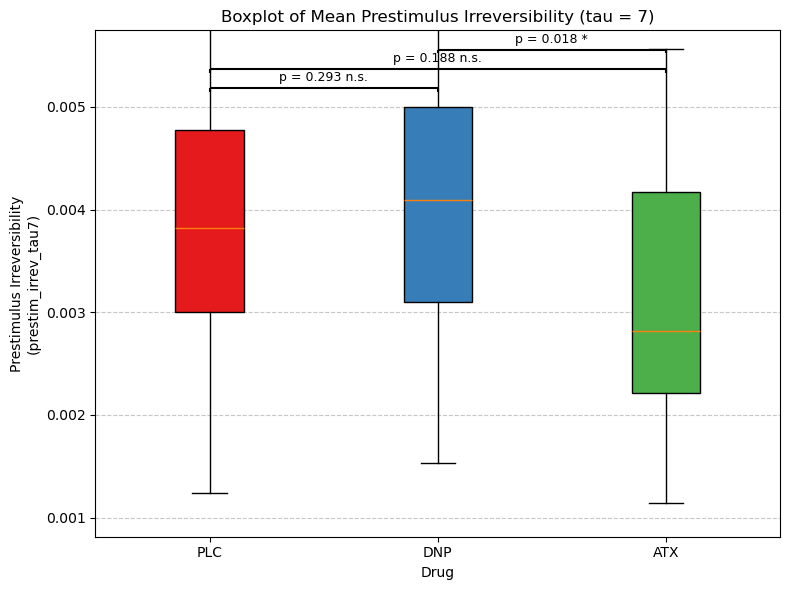


----- Analysis for tau = 8 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.013262  0.015321  0.011911
2        0.005619  0.005480  0.005352
3        0.008042  0.005817  0.006204
4        0.008994  0.008357  0.005101
5        0.002770  0.003635  0.004754
Overall mean for each drug:
  PLC: 0.0048
  DNP: 0.0052
  ATX: 0.0046
Paired t-test PLC vs DNP (n=28): t = -1.417, p = 0.1679
Paired t-test PLC vs ATX (n=28): t = 0.450, p = 0.6566
Paired t-test DNP vs ATX (n=28): t = 1.942, p = 0.0626


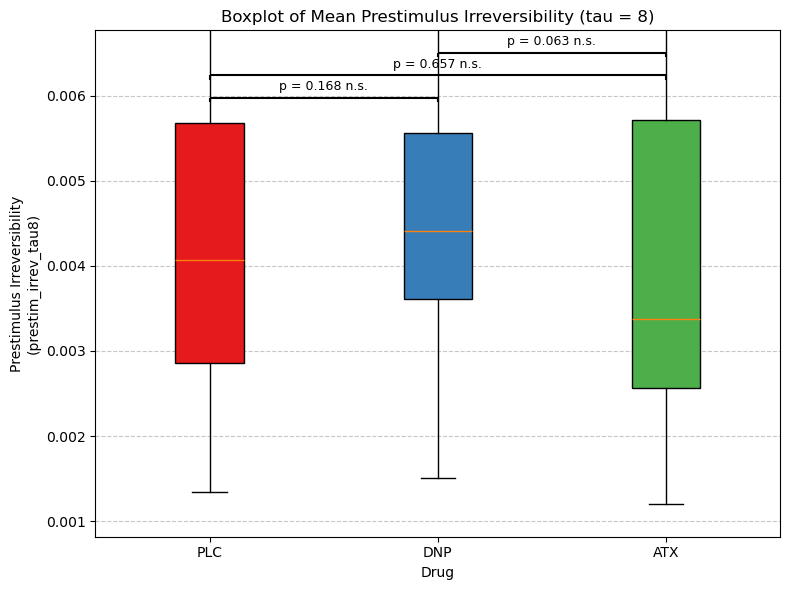


----- Analysis for tau = 9 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010648  0.010612  0.008994
2        0.006026  0.005440  0.005192
3        0.008226  0.005941  0.006279
4        0.009664  0.008853  0.005245
5        0.002835  0.003581  0.004642
Overall mean for each drug:
  PLC: 0.0046
  DNP: 0.0050
  ATX: 0.0044
Paired t-test PLC vs DNP (n=28): t = -1.442, p = 0.1608
Paired t-test PLC vs ATX (n=28): t = 0.369, p = 0.7152
Paired t-test DNP vs ATX (n=28): t = 1.977, p = 0.0583


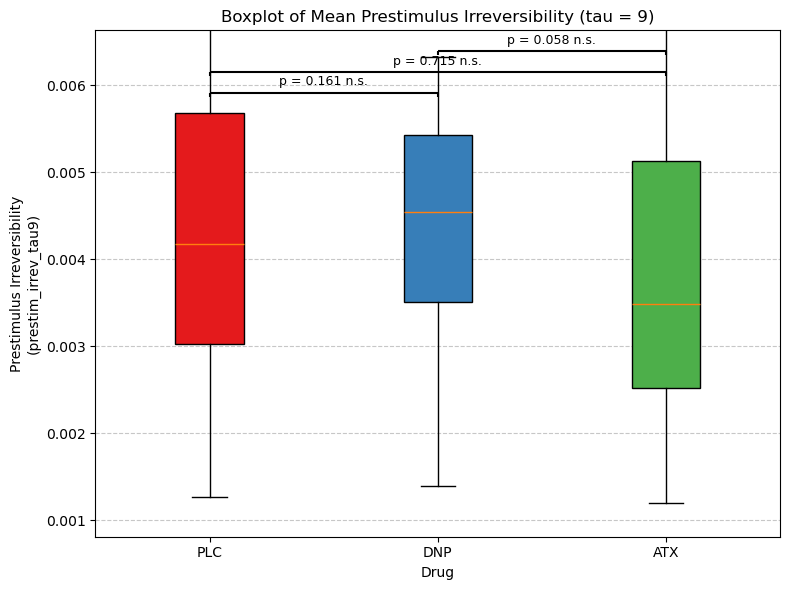


----- Analysis for tau = 10 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.004733  0.005784  0.004731
2        0.005302  0.005527  0.005266
3        0.008366  0.006066  0.006366
4        0.010246  0.009250  0.005347
5        0.002953  0.003570  0.004705
Overall mean for each drug:
  PLC: 0.0042
  DNP: 0.0045
  ATX: 0.0038
Paired t-test PLC vs DNP (n=28): t = -1.223, p = 0.2318
Paired t-test PLC vs ATX (n=28): t = 1.101, p = 0.2808
Paired t-test DNP vs ATX (n=28): t = 2.542, p = 0.0171


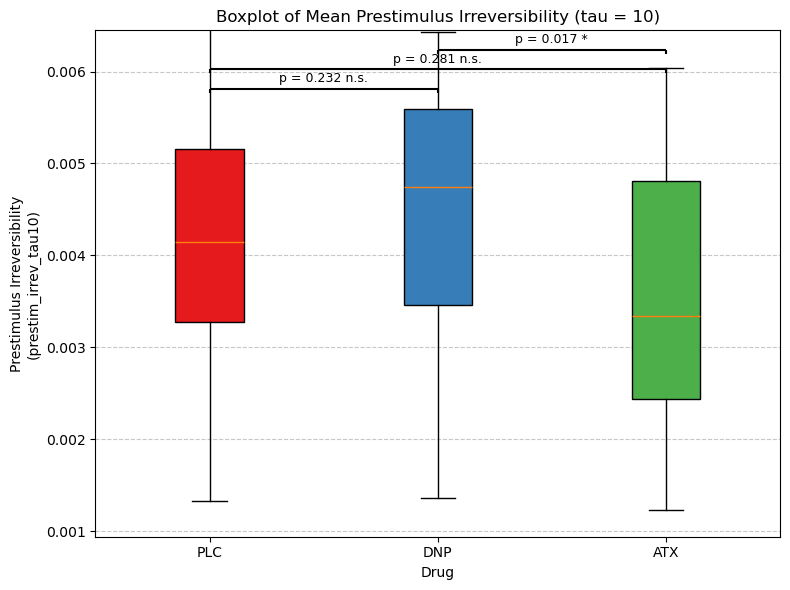


----- Analysis for tau = 11 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010174  0.013215  0.010087
2        0.005735  0.005764  0.005761
3        0.008467  0.006139  0.006437
4        0.010667  0.009597  0.005339
5        0.003104  0.003750  0.005004
Overall mean for each drug:
  PLC: 0.0049
  DNP: 0.0052
  ATX: 0.0046
Paired t-test PLC vs DNP (n=28): t = -1.194, p = 0.2429
Paired t-test PLC vs ATX (n=28): t = 0.903, p = 0.3744
Paired t-test DNP vs ATX (n=28): t = 2.210, p = 0.0358


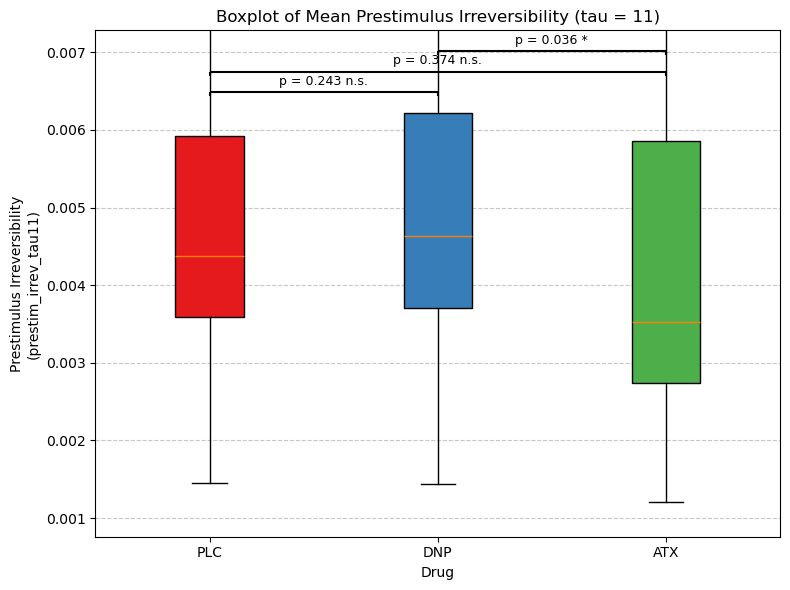


----- Analysis for tau = 12 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.015038  0.016157  0.012977
2        0.006740  0.006047  0.006238
3        0.008534  0.006194  0.006484
4        0.011057  0.009798  0.005305
5        0.003118  0.003806  0.005080
Overall mean for each drug:
  PLC: 0.0052
  DNP: 0.0057
  ATX: 0.0051
Paired t-test PLC vs DNP (n=28): t = -1.397, p = 0.1738
Paired t-test PLC vs ATX (n=28): t = 0.283, p = 0.7795
Paired t-test DNP vs ATX (n=28): t = 1.911, p = 0.0666


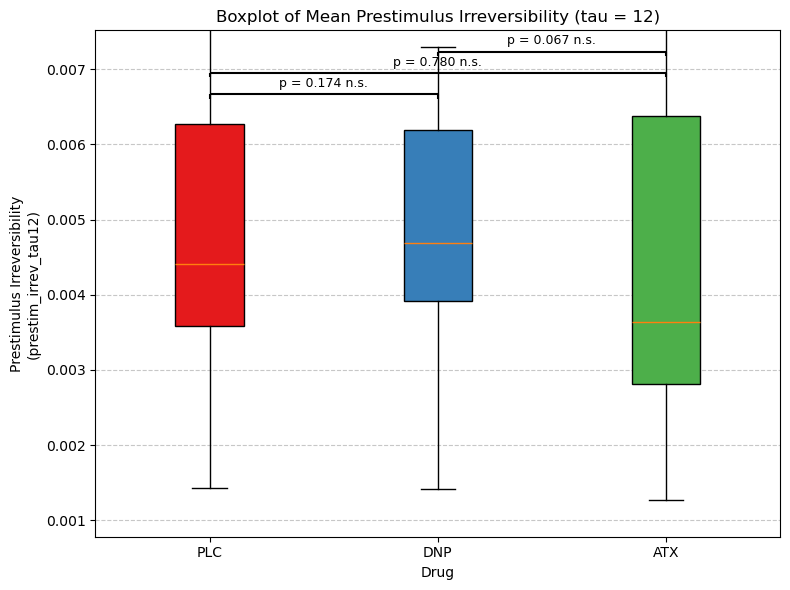


----- Analysis for tau = 13 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.009449  0.009487  0.008075
2        0.007329  0.006667  0.006640
3        0.008608  0.006220  0.006482
4        0.011396  0.009955  0.005286
5        0.003120  0.003792  0.004958
Overall mean for each drug:
  PLC: 0.0048
  DNP: 0.0052
  ATX: 0.0046
Paired t-test PLC vs DNP (n=28): t = -1.180, p = 0.2485
Paired t-test PLC vs ATX (n=28): t = 0.660, p = 0.5146
Paired t-test DNP vs ATX (n=28): t = 2.222, p = 0.0348


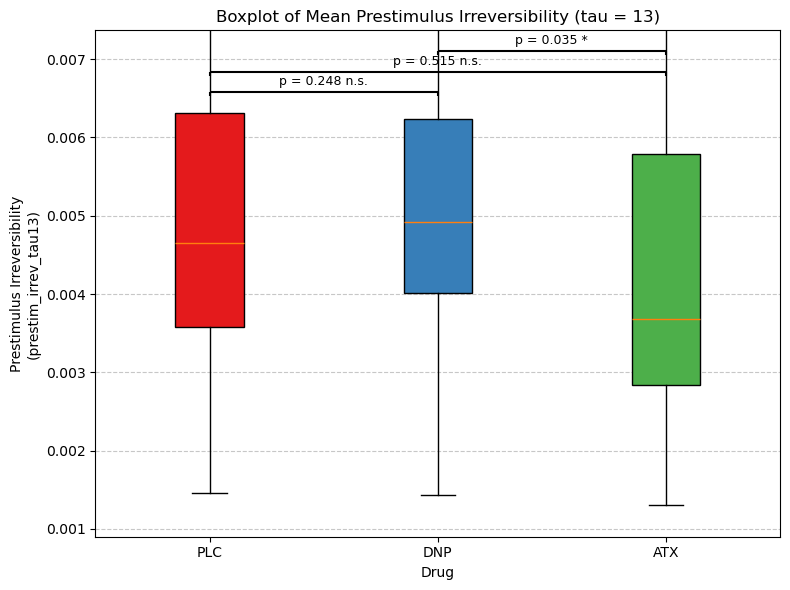


----- Analysis for tau = 14 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010439  0.013776  0.009757
2        0.007329  0.006659  0.006452
3        0.008663  0.006253  0.006554
4        0.011603  0.010081  0.005304
5        0.003164  0.003853  0.004974
Overall mean for each drug:
  PLC: 0.0052
  DNP: 0.0056
  ATX: 0.0049
Paired t-test PLC vs DNP (n=28): t = -1.212, p = 0.2359
Paired t-test PLC vs ATX (n=28): t = 0.823, p = 0.4175
Paired t-test DNP vs ATX (n=28): t = 2.224, p = 0.0347


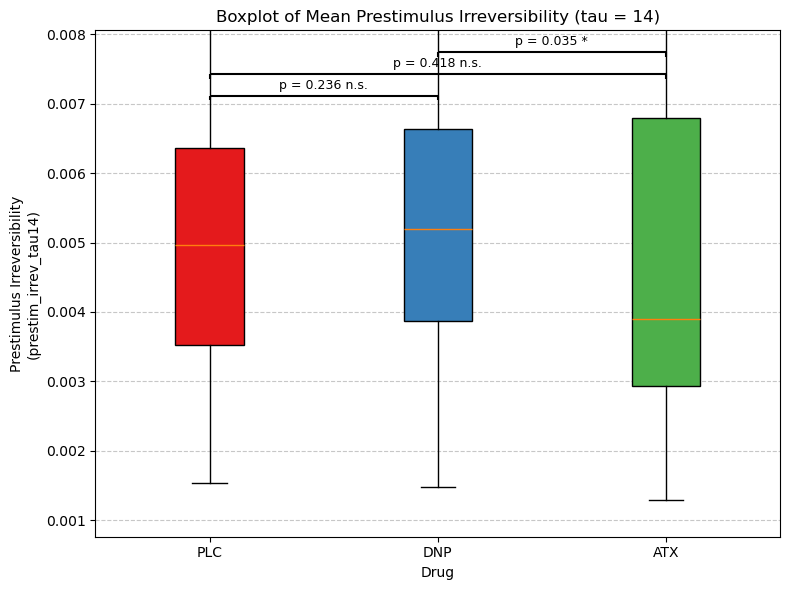


----- Analysis for tau = 15 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.015397  0.016931  0.012664
2        0.007337  0.006506  0.006471
3        0.008810  0.006285  0.006670
4        0.011849  0.010312  0.005350
5        0.003191  0.003788  0.004896
Overall mean for each drug:
  PLC: 0.0055
  DNP: 0.0060
  ATX: 0.0054
Paired t-test PLC vs DNP (n=28): t = -1.487, p = 0.1486
Paired t-test PLC vs ATX (n=28): t = 0.222, p = 0.8261
Paired t-test DNP vs ATX (n=28): t = 1.794, p = 0.0840


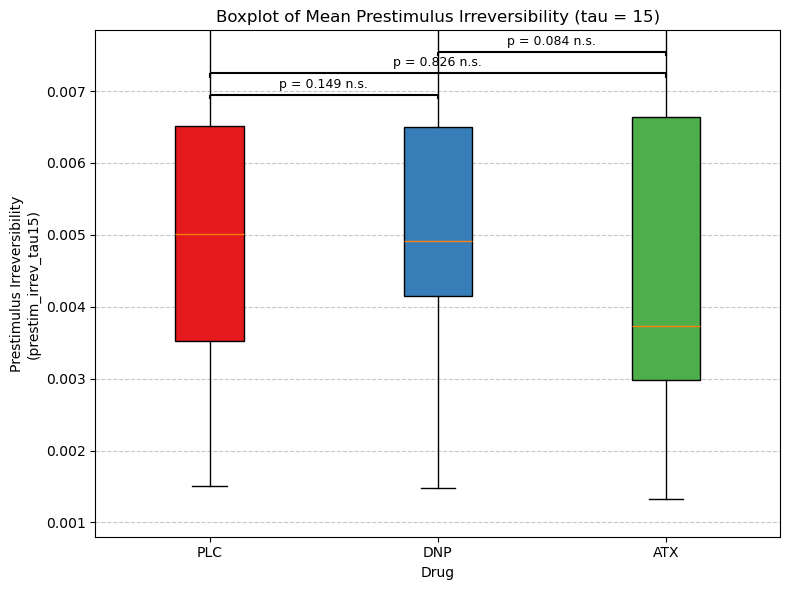


----- Analysis for tau = 20 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010465  0.011841  0.009584
2        0.007993  0.007523  0.007454
3        0.010309  0.007374  0.008152
4        0.012855  0.011661  0.006359
5        0.003493  0.004254  0.005897
Overall mean for each drug:
  PLC: 0.0058
  DNP: 0.0062
  ATX: 0.0054
Paired t-test PLC vs DNP (n=28): t = -1.086, p = 0.2869
Paired t-test PLC vs ATX (n=28): t = 0.976, p = 0.3378
Paired t-test DNP vs ATX (n=28): t = 2.460, p = 0.0206


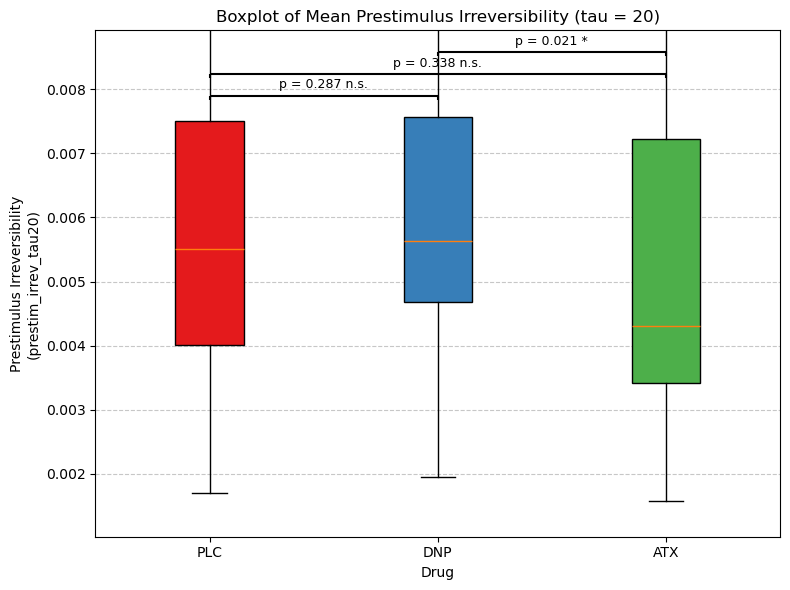


----- Analysis for tau = 25 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010465  0.011841  0.009584
2        0.007993  0.007523  0.007454
3        0.010309  0.007374  0.008152
4        0.012855  0.011661  0.006359
5        0.003493  0.004254  0.005897
Overall mean for each drug:
  PLC: 0.0058
  DNP: 0.0062
  ATX: 0.0054
Paired t-test PLC vs DNP (n=28): t = -1.086, p = 0.2869
Paired t-test PLC vs ATX (n=28): t = 0.976, p = 0.3378
Paired t-test DNP vs ATX (n=28): t = 2.460, p = 0.0206


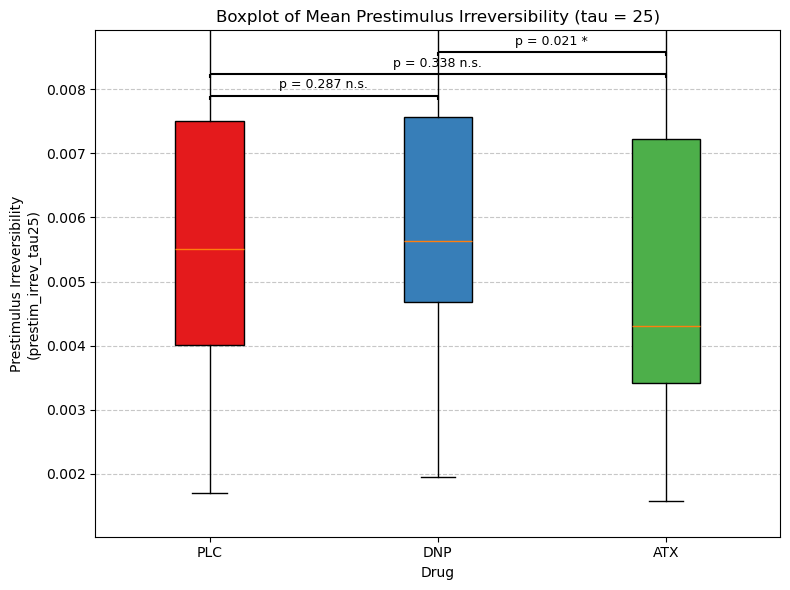

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# List of tau values (1 through 15, plus 20 and 25)
taus = list(range(1, 16)) + [20, 25]
# List of drug conditions (ensure these match the levels in your df)
drugs = ['PLC', 'DNP', 'ATX']
# Define the pairwise comparisons in a fixed order
comparisons = [('PLC', 'DNP'), ('PLC', 'ATX'), ('DNP', 'ATX')]

# Dictionary to store results (raw p-values) for each tau
results = {}

for tau in taus:
    # Define the current tau column name
    tau_col = f'prestim_irrev_tau{tau}'
    
    # Group the data by subject and drug, computing the mean for each subject.
    grouped = df.groupby(['subject', 'drug'])[tau_col].mean().unstack()
    
    print(f"\n----- Analysis for tau = {tau} -----")
    print("Mean prestimulus irreversibility per subject and drug (first few rows):")
    print(grouped.head())
    
    # Print overall means (across subjects) for each drug.
    print("Overall mean for each drug:")
    for drug in drugs:
        if drug in grouped.columns:
            overall_mean = grouped[drug].mean()
            print(f"  {drug}: {overall_mean:.4f}")
        else:
            print(f"  {drug}: No data")
    
    # Run paired-sample t-tests for each drug comparison.
    p_values = []    # raw p-values
    comp_labels = [] # list of (drug1, drug2)
    
    for d1, d2 in comparisons:
        # Select subjects with data in both conditions.
        valid_data = grouped[[d1, d2]].dropna()
        n = len(valid_data)
        if n == 0:
            print(f"Not enough data for comparison between {d1} and {d2} at tau = {tau}.")
            p_values.append(np.nan)
            comp_labels.append((d1, d2))
            continue
        
        t_stat, p_val = ttest_rel(valid_data[d1], valid_data[d2])
        print(f"Paired t-test {d1} vs {d2} (n={n}): t = {t_stat:.3f}, p = {p_val:.4f}")
        p_values.append(p_val)
        comp_labels.append((d1, d2))
    
    # (No correction is used for the bars/significance annotations.)
    results[tau] = {comp_labels[i]: p_values[i] for i in range(len(comp_labels))}
    
    # ---------------------------
    # BOXPLOT VISUALIZATION
    # ---------------------------
    plt.figure(figsize=(8, 6))
    
    # Build a list of Series (one per drug) with subject-level means.
    data_list = [grouped[drug].dropna() for drug in drugs if drug in grouped.columns]
    
    # Create the boxplot. Boxes will be positioned at 1, 2, 3.
    bp = plt.boxplot(data_list, positions=range(1, len(data_list)+1),
                     patch_artist=True, showfliers=False)
    
    # Set colors for each box using a Seaborn palette.
    colors = sns.color_palette("Set1", len(data_list))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Set the x-axis labels to the drug names.
    plt.xticks(range(1, len(data_list)+1), drugs)
    plt.xlabel('Drug')
    plt.ylabel(f'Prestimulus Irreversibility\n({tau_col})')
    plt.title(f'Boxplot of Mean Prestimulus Irreversibility (tau = {tau})')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # ---------------------------
    # SIGNIFICANCE BARS AT FIXED HEIGHTS RELATIVE TO THE 75TH PERCENTILE
    # ---------------------------
    # Instead of using the maximum, compute the 75th percentile for each drug group.
    quantiles75 = [np.percentile(s, 75) for s in data_list]
    base_y = np.max(quantiles75)  # Use the highest 75th percentile as the base.
    
    # For a scaling factor, compute the interquartile range (IQR) from all groups.
    iqr_vals = [np.percentile(s, 75) - np.percentile(s, 25) for s in data_list]
    avg_iqr = np.mean(iqr_vals) if iqr_vals else 1
    
    # Define fixed offsets (in data units) for the significance bars.
    # They will be placed at base_y plus a fixed multiple of the average IQR.
    fixed_offsets = [0.1 * avg_iqr, 0.2 * avg_iqr, 0.3 * avg_iqr]
    
    # Draw significance bars for each valid comparison (in the fixed order)
    for idx, (d1, d2) in enumerate(comparisons):
        # Get the raw p-value for this comparison.
        raw_p = p_values[idx] if idx < len(p_values) else np.nan
        
        # x positions for the boxes (boxes are at positions 1, 2, 3)
        x1 = drugs.index(d1) + 1
        x2 = drugs.index(d2) + 1
        
        # y position for the bar: always base_y plus a fixed offset.
        y_bar = base_y + fixed_offsets[idx]
        
        # Determine significance marker based on raw p-value.
        if np.isnan(raw_p):
            marker = "n/a"
            p_text = "n/a"
        else:
            p_text = f"{raw_p:.3f}"
            if raw_p < 0.001:
                marker = '***'
            elif raw_p < 0.01:
                marker = '**'
            elif raw_p < 0.05:
                marker = '*'
            else:
                marker = 'n.s.'
        
        # Draw the horizontal significance bar.
        plt.hlines(y_bar, x1, x2, color='black')
        # Draw vertical ticks at the ends.
        tick_height = 0.02 * avg_iqr
        plt.vlines(x1, y_bar - tick_height, y_bar, color='black')
        plt.vlines(x2, y_bar - tick_height, y_bar, color='black')
        # Place the annotation text in the middle of the bar.
        plt.text((x1 + x2) / 2, y_bar + tick_height, f"p = {p_text} {marker}",
                 ha='center', va='bottom', fontsize=9, color='black')
    
    # Adjust the y-axis limit so that all bars are visible.
    plt.ylim(top=base_y + fixed_offsets[-1] + 0.1 * avg_iqr)
    
    plt.tight_layout()
    plt.show()



----- Analysis for tau = 1 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.015618  0.017384  0.013909
2        0.007233  0.006911  0.006603
3        0.001932  0.001832  0.002092
4        0.001601  0.001973  0.002085
5        0.001298  0.001752  0.002131
Overall mean for each drug:
  PLC: 0.0041
  DNP: 0.0044
  ATX: 0.0038
Paired t-test PLC vs DNP (n=28): t = -1.305, p = 0.2028
Paired t-test PLC vs ATX (n=28): t = 0.842, p = 0.4070
Paired t-test DNP vs ATX (n=28): t = 2.159, p = 0.0399
Tau 1, corrected paired t-test PLC vs DNP: corrected p = 0.6083
Tau 1, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 1, corrected paired t-test DNP vs ATX: corrected p = 0.1198


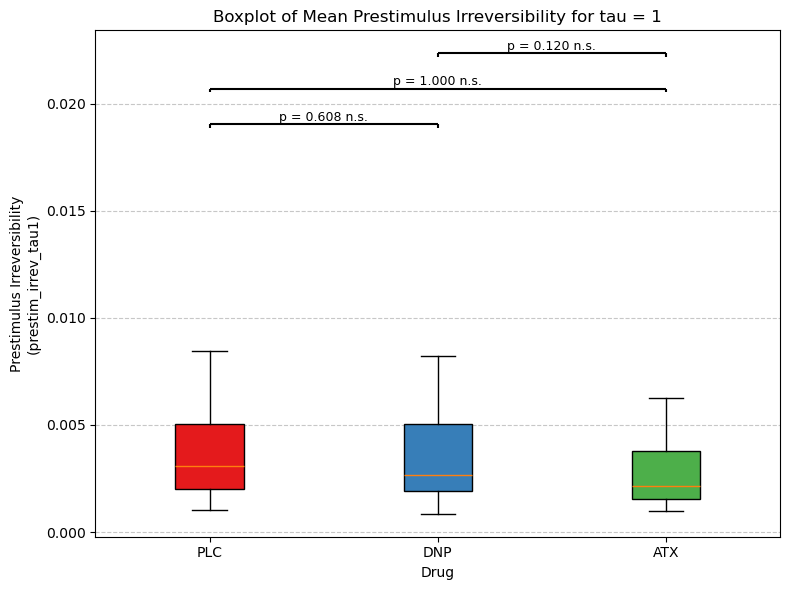


----- Analysis for tau = 2 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.015707  0.017442  0.013938
2        0.007787  0.007111  0.006499
3        0.003930  0.003137  0.003707
4        0.002725  0.003221  0.002915
5        0.001717  0.002386  0.002925
Overall mean for each drug:
  PLC: 0.0048
  DNP: 0.0053
  ATX: 0.0044
Paired t-test PLC vs DNP (n=28): t = -1.791, p = 0.0846
Paired t-test PLC vs ATX (n=28): t = 0.953, p = 0.3491
Paired t-test DNP vs ATX (n=28): t = 2.617, p = 0.0143
Tau 2, corrected paired t-test PLC vs DNP: corrected p = 0.2538
Tau 2, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 2, corrected paired t-test DNP vs ATX: corrected p = 0.0430


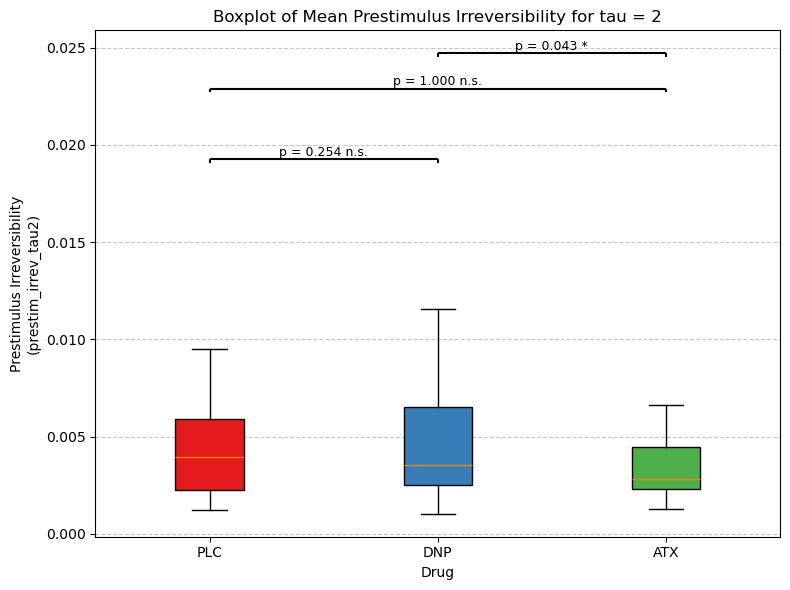


----- Analysis for tau = 3 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.004360  0.005132  0.003808
2        0.003600  0.003395  0.003228
3        0.005199  0.003766  0.004466
4        0.003785  0.004173  0.003334
5        0.001926  0.002407  0.003059
Overall mean for each drug:
  PLC: 0.0031
  DNP: 0.0034
  ATX: 0.0028
Paired t-test PLC vs DNP (n=28): t = -1.827, p = 0.0787
Paired t-test PLC vs ATX (n=28): t = 1.767, p = 0.0886
Paired t-test DNP vs ATX (n=28): t = 3.114, p = 0.0043
Tau 3, corrected paired t-test PLC vs DNP: corrected p = 0.2362
Tau 3, corrected paired t-test PLC vs ATX: corrected p = 0.2658
Tau 3, corrected paired t-test DNP vs ATX: corrected p = 0.0130


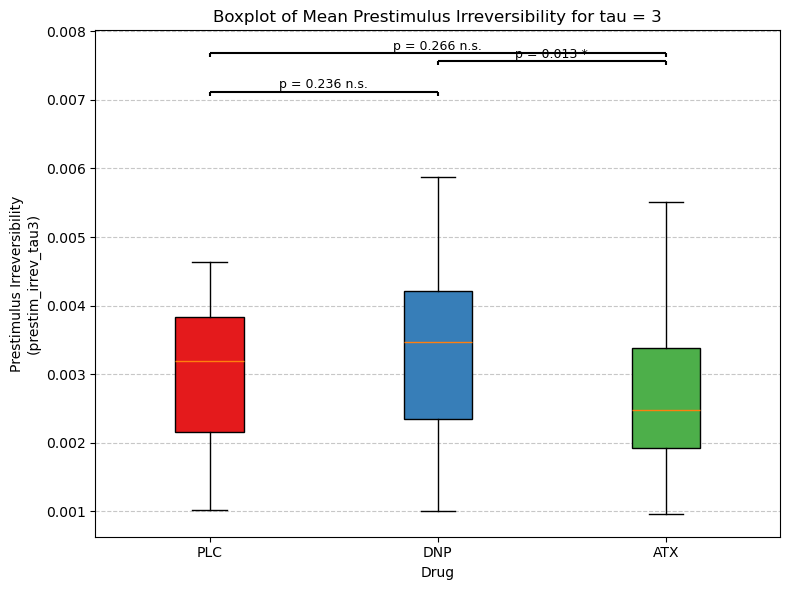


----- Analysis for tau = 4 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.006066  0.007869  0.005907
2        0.003770  0.003871  0.004124
3        0.006071  0.004334  0.004996
4        0.004956  0.005118  0.003827
5        0.002163  0.002698  0.003513
Overall mean for each drug:
  PLC: 0.0035
  DNP: 0.0037
  ATX: 0.0032
Paired t-test PLC vs DNP (n=28): t = -1.172, p = 0.2516
Paired t-test PLC vs ATX (n=28): t = 1.557, p = 0.1311
Paired t-test DNP vs ATX (n=28): t = 2.527, p = 0.0177
Tau 4, corrected paired t-test PLC vs DNP: corrected p = 0.7548
Tau 4, corrected paired t-test PLC vs ATX: corrected p = 0.3932
Tau 4, corrected paired t-test DNP vs ATX: corrected p = 0.0530


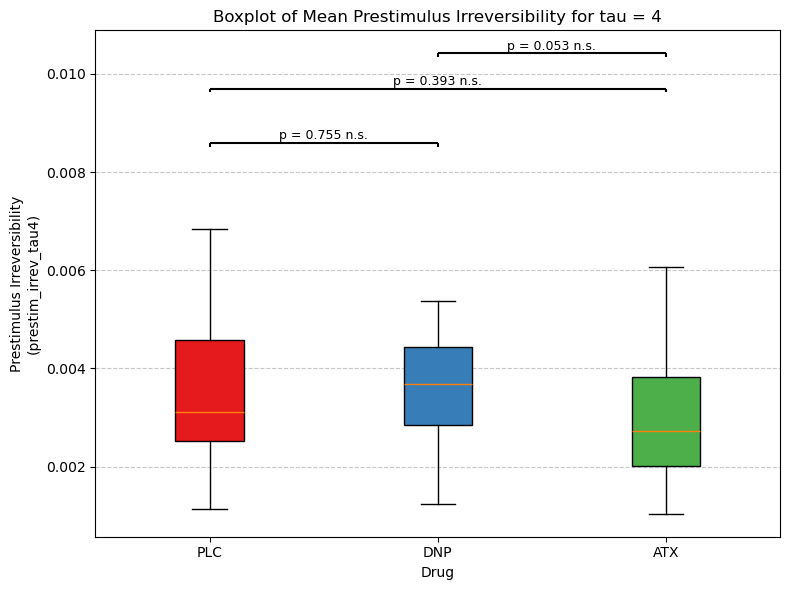


----- Analysis for tau = 5 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.013421  0.015087  0.012114
2        0.006118  0.005484  0.005472
3        0.006811  0.004855  0.005461
4        0.006171  0.006061  0.004281
5        0.002475  0.003151  0.004044
Overall mean for each drug:
  PLC: 0.0046
  DNP: 0.0050
  ATX: 0.0044
Paired t-test PLC vs DNP (n=28): t = -1.526, p = 0.1387
Paired t-test PLC vs ATX (n=28): t = 0.680, p = 0.5025
Paired t-test DNP vs ATX (n=28): t = 2.172, p = 0.0388
Tau 5, corrected paired t-test PLC vs DNP: corrected p = 0.4162
Tau 5, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 5, corrected paired t-test DNP vs ATX: corrected p = 0.1165


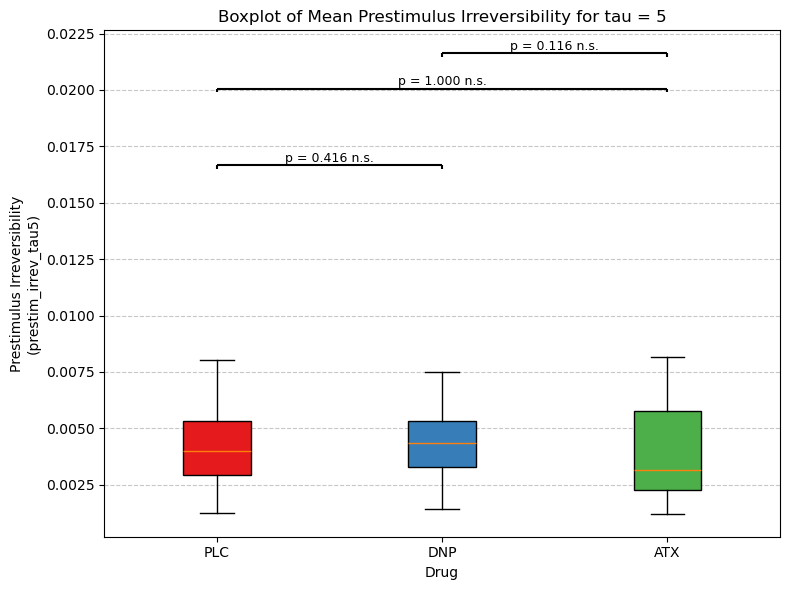


----- Analysis for tau = 6 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.008036  0.007925  0.006550
2        0.005122  0.004577  0.004279
3        0.007367  0.005203  0.005779
4        0.007166  0.006905  0.004618
5        0.002563  0.003155  0.004122
Overall mean for each drug:
  PLC: 0.0039
  DNP: 0.0042
  ATX: 0.0036
Paired t-test PLC vs DNP (n=28): t = -1.439, p = 0.1616
Paired t-test PLC vs ATX (n=28): t = 0.827, p = 0.4157
Paired t-test DNP vs ATX (n=28): t = 2.313, p = 0.0286
Tau 6, corrected paired t-test PLC vs DNP: corrected p = 0.4848
Tau 6, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 6, corrected paired t-test DNP vs ATX: corrected p = 0.0857


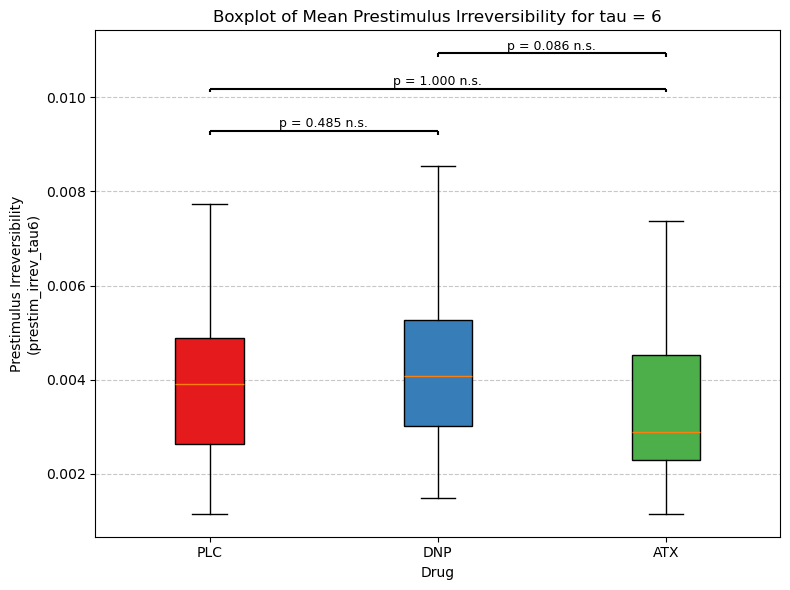


----- Analysis for tau = 7 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.005024  0.006572  0.004951
2        0.004161  0.004602  0.004434
3        0.007791  0.005562  0.006024
4        0.008122  0.007700  0.004898
5        0.002618  0.003322  0.004447
Overall mean for each drug:
  PLC: 0.0038
  DNP: 0.0040
  ATX: 0.0034
Paired t-test PLC vs DNP (n=28): t = -1.073, p = 0.2926
Paired t-test PLC vs ATX (n=28): t = 1.350, p = 0.1883
Paired t-test DNP vs ATX (n=28): t = 2.517, p = 0.0181
Tau 7, corrected paired t-test PLC vs DNP: corrected p = 0.8777
Tau 7, corrected paired t-test PLC vs ATX: corrected p = 0.5650
Tau 7, corrected paired t-test DNP vs ATX: corrected p = 0.0542


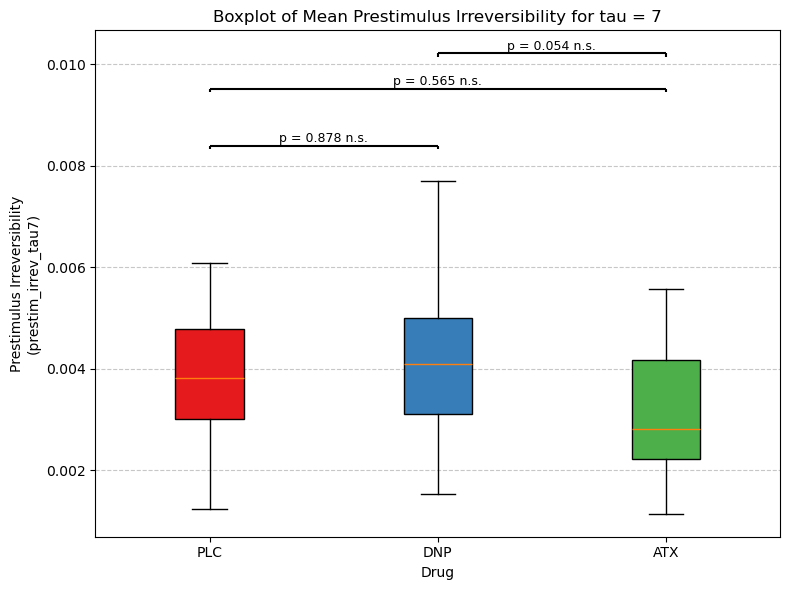


----- Analysis for tau = 8 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.013262  0.015321  0.011911
2        0.005619  0.005480  0.005352
3        0.008042  0.005817  0.006204
4        0.008994  0.008357  0.005101
5        0.002770  0.003635  0.004754
Overall mean for each drug:
  PLC: 0.0048
  DNP: 0.0052
  ATX: 0.0046
Paired t-test PLC vs DNP (n=28): t = -1.417, p = 0.1679
Paired t-test PLC vs ATX (n=28): t = 0.450, p = 0.6566
Paired t-test DNP vs ATX (n=28): t = 1.942, p = 0.0626
Tau 8, corrected paired t-test PLC vs DNP: corrected p = 0.5036
Tau 8, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 8, corrected paired t-test DNP vs ATX: corrected p = 0.1879


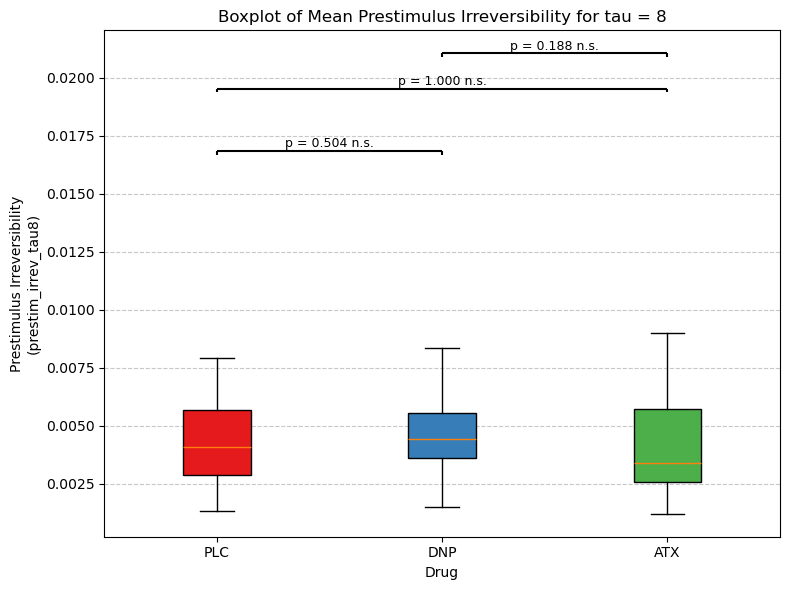


----- Analysis for tau = 9 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010648  0.010612  0.008994
2        0.006026  0.005440  0.005192
3        0.008226  0.005941  0.006279
4        0.009664  0.008853  0.005245
5        0.002835  0.003581  0.004642
Overall mean for each drug:
  PLC: 0.0046
  DNP: 0.0050
  ATX: 0.0044
Paired t-test PLC vs DNP (n=28): t = -1.442, p = 0.1608
Paired t-test PLC vs ATX (n=28): t = 0.369, p = 0.7152
Paired t-test DNP vs ATX (n=28): t = 1.977, p = 0.0583
Tau 9, corrected paired t-test PLC vs DNP: corrected p = 0.4825
Tau 9, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 9, corrected paired t-test DNP vs ATX: corrected p = 0.1750


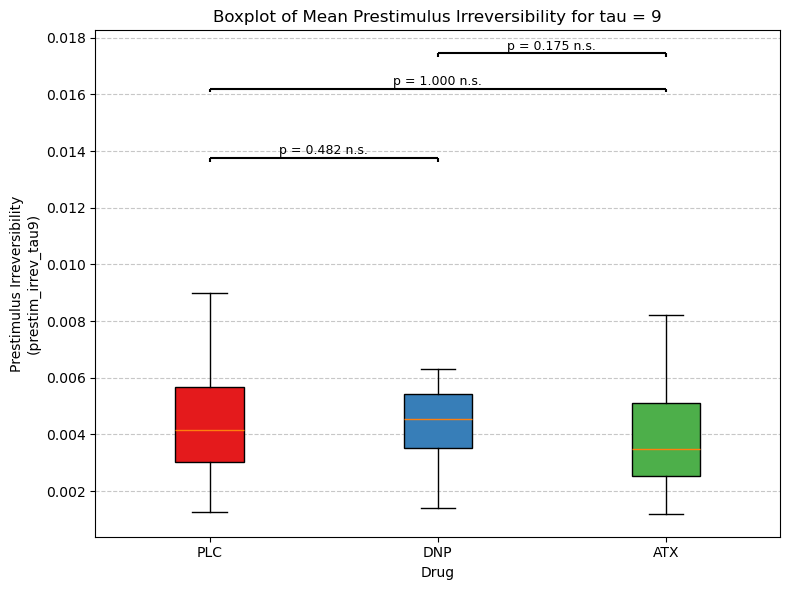


----- Analysis for tau = 10 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.004733  0.005784  0.004731
2        0.005302  0.005527  0.005266
3        0.008366  0.006066  0.006366
4        0.010246  0.009250  0.005347
5        0.002953  0.003570  0.004705
Overall mean for each drug:
  PLC: 0.0042
  DNP: 0.0045
  ATX: 0.0038
Paired t-test PLC vs DNP (n=28): t = -1.223, p = 0.2318
Paired t-test PLC vs ATX (n=28): t = 1.101, p = 0.2808
Paired t-test DNP vs ATX (n=28): t = 2.542, p = 0.0171
Tau 10, corrected paired t-test PLC vs DNP: corrected p = 0.6954
Tau 10, corrected paired t-test PLC vs ATX: corrected p = 0.8425
Tau 10, corrected paired t-test DNP vs ATX: corrected p = 0.0512


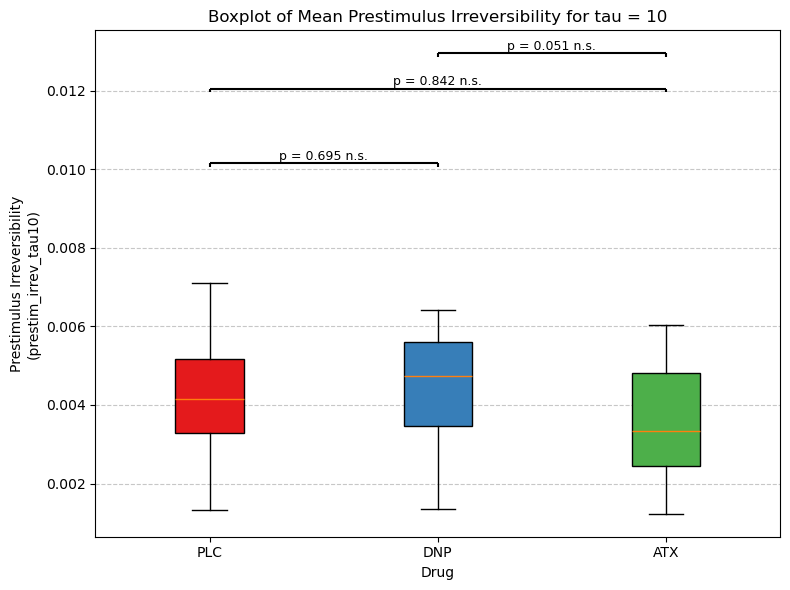


----- Analysis for tau = 11 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010174  0.013215  0.010087
2        0.005735  0.005764  0.005761
3        0.008467  0.006139  0.006437
4        0.010667  0.009597  0.005339
5        0.003104  0.003750  0.005004
Overall mean for each drug:
  PLC: 0.0049
  DNP: 0.0052
  ATX: 0.0046
Paired t-test PLC vs DNP (n=28): t = -1.194, p = 0.2429
Paired t-test PLC vs ATX (n=28): t = 0.903, p = 0.3744
Paired t-test DNP vs ATX (n=28): t = 2.210, p = 0.0358
Tau 11, corrected paired t-test PLC vs DNP: corrected p = 0.7288
Tau 11, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 11, corrected paired t-test DNP vs ATX: corrected p = 0.1073


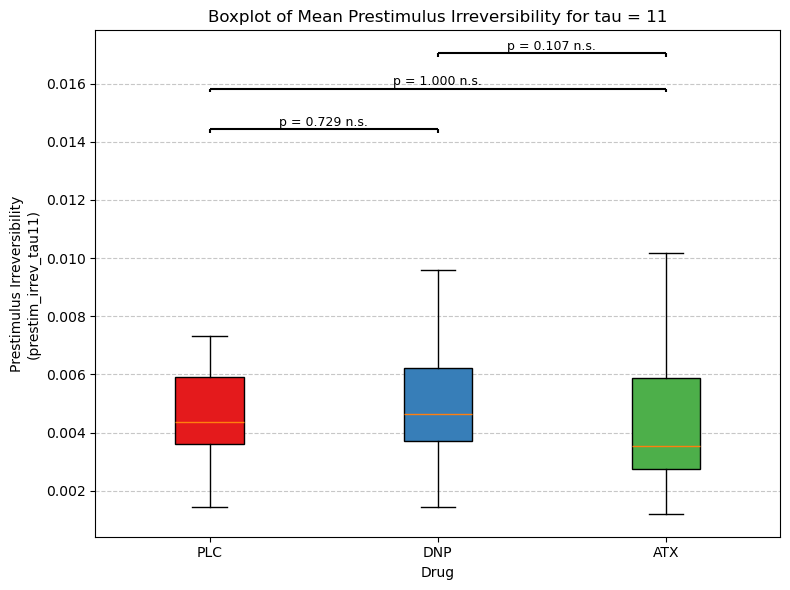


----- Analysis for tau = 12 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.015038  0.016157  0.012977
2        0.006740  0.006047  0.006238
3        0.008534  0.006194  0.006484
4        0.011057  0.009798  0.005305
5        0.003118  0.003806  0.005080
Overall mean for each drug:
  PLC: 0.0052
  DNP: 0.0057
  ATX: 0.0051
Paired t-test PLC vs DNP (n=28): t = -1.397, p = 0.1738
Paired t-test PLC vs ATX (n=28): t = 0.283, p = 0.7795
Paired t-test DNP vs ATX (n=28): t = 1.911, p = 0.0666
Tau 12, corrected paired t-test PLC vs DNP: corrected p = 0.5215
Tau 12, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 12, corrected paired t-test DNP vs ATX: corrected p = 0.1999


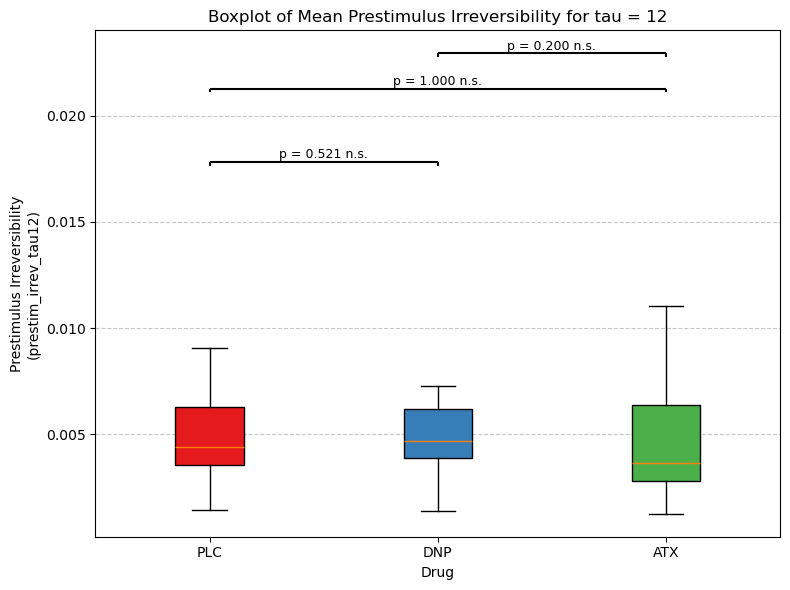


----- Analysis for tau = 13 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.009449  0.009487  0.008075
2        0.007329  0.006667  0.006640
3        0.008608  0.006220  0.006482
4        0.011396  0.009955  0.005286
5        0.003120  0.003792  0.004958
Overall mean for each drug:
  PLC: 0.0048
  DNP: 0.0052
  ATX: 0.0046
Paired t-test PLC vs DNP (n=28): t = -1.180, p = 0.2485
Paired t-test PLC vs ATX (n=28): t = 0.660, p = 0.5146
Paired t-test DNP vs ATX (n=28): t = 2.222, p = 0.0348
Tau 13, corrected paired t-test PLC vs DNP: corrected p = 0.7454
Tau 13, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 13, corrected paired t-test DNP vs ATX: corrected p = 0.1045


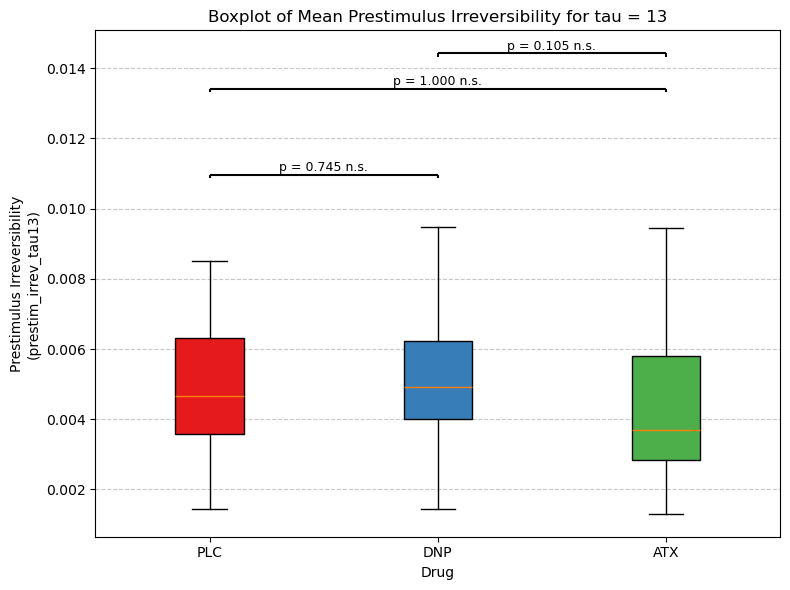


----- Analysis for tau = 14 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010439  0.013776  0.009757
2        0.007329  0.006659  0.006452
3        0.008663  0.006253  0.006554
4        0.011603  0.010081  0.005304
5        0.003164  0.003853  0.004974
Overall mean for each drug:
  PLC: 0.0052
  DNP: 0.0056
  ATX: 0.0049
Paired t-test PLC vs DNP (n=28): t = -1.212, p = 0.2359
Paired t-test PLC vs ATX (n=28): t = 0.823, p = 0.4175
Paired t-test DNP vs ATX (n=28): t = 2.224, p = 0.0347
Tau 14, corrected paired t-test PLC vs DNP: corrected p = 0.7077
Tau 14, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 14, corrected paired t-test DNP vs ATX: corrected p = 0.1042


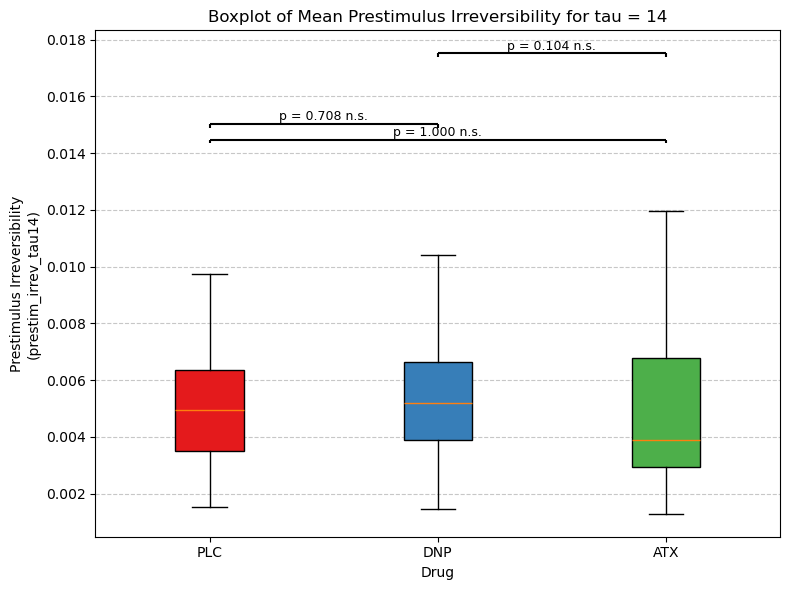


----- Analysis for tau = 15 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.015397  0.016931  0.012664
2        0.007337  0.006506  0.006471
3        0.008810  0.006285  0.006670
4        0.011849  0.010312  0.005350
5        0.003191  0.003788  0.004896
Overall mean for each drug:
  PLC: 0.0055
  DNP: 0.0060
  ATX: 0.0054
Paired t-test PLC vs DNP (n=28): t = -1.487, p = 0.1486
Paired t-test PLC vs ATX (n=28): t = 0.222, p = 0.8261
Paired t-test DNP vs ATX (n=28): t = 1.794, p = 0.0840
Tau 15, corrected paired t-test PLC vs DNP: corrected p = 0.4458
Tau 15, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 15, corrected paired t-test DNP vs ATX: corrected p = 0.2521


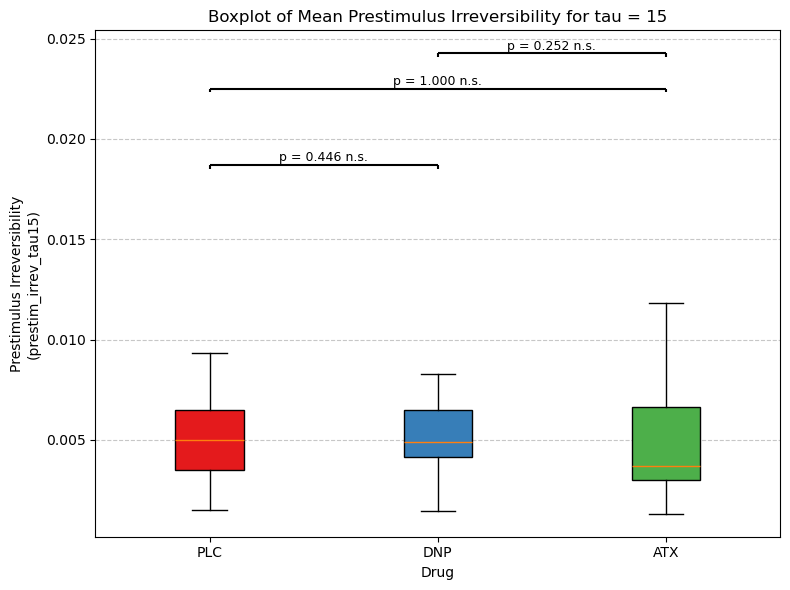


----- Analysis for tau = 20 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010465  0.011841  0.009584
2        0.007993  0.007523  0.007454
3        0.010309  0.007374  0.008152
4        0.012855  0.011661  0.006359
5        0.003493  0.004254  0.005897
Overall mean for each drug:
  PLC: 0.0058
  DNP: 0.0062
  ATX: 0.0054
Paired t-test PLC vs DNP (n=28): t = -1.086, p = 0.2869
Paired t-test PLC vs ATX (n=28): t = 0.976, p = 0.3378
Paired t-test DNP vs ATX (n=28): t = 2.460, p = 0.0206
Tau 20, corrected paired t-test PLC vs DNP: corrected p = 0.8608
Tau 20, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 20, corrected paired t-test DNP vs ATX: corrected p = 0.0617


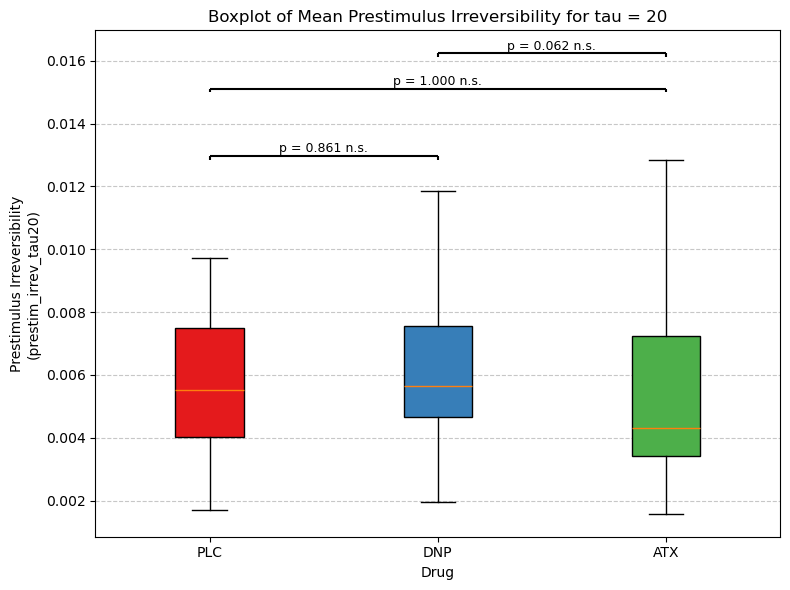


----- Analysis for tau = 25 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1        0.010465  0.011841  0.009584
2        0.007993  0.007523  0.007454
3        0.010309  0.007374  0.008152
4        0.012855  0.011661  0.006359
5        0.003493  0.004254  0.005897
Overall mean for each drug:
  PLC: 0.0058
  DNP: 0.0062
  ATX: 0.0054
Paired t-test PLC vs DNP (n=28): t = -1.086, p = 0.2869
Paired t-test PLC vs ATX (n=28): t = 0.976, p = 0.3378
Paired t-test DNP vs ATX (n=28): t = 2.460, p = 0.0206
Tau 25, corrected paired t-test PLC vs DNP: corrected p = 0.8608
Tau 25, corrected paired t-test PLC vs ATX: corrected p = 1.0000
Tau 25, corrected paired t-test DNP vs ATX: corrected p = 0.0617


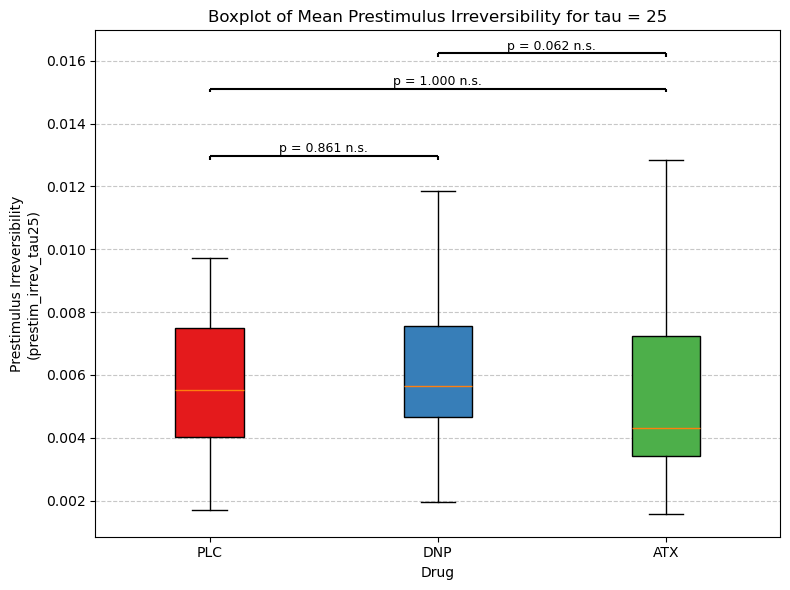

In [23]:
project_directory = os.path.dirname(os.path.dirname(os.path.abspath("clean_analysis_dataset1")))
base_directory = os.path.join(project_directory, r"data", r"fr_results")

df = pd.read_csv(os.path.join(project_directory, r"data", r"behavior_dataset1.csv"))

# Loop through tau1 to tau20
for i in range(1, 21):
    # Construct the filename dynamically
    file_name = f"FowRev_prestim_tau{i}.mat"
    file_path = os.path.join(base_directory, file_name)
    
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)
    
    # Extract and flatten the 'FowRev' array, assigning it to a new column in the DataFrame
    df[f'prestim_irrev_tau{i}'] = mat_data['FowRev'].flatten()
df['prestim_irrev_tau25'] = scipy.io.loadmat(os.path.join(os.path.join(project_directory, r"data", r"fr_results", r"FowRev_prestim_tau20.mat")))['FowRev'].flatten()
df.head()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# List of tau values (1 through 15, plus 20 and 25)
taus = list(range(1, 16)) + [20, 25]
# List of drug conditions (make sure these match the levels in your df)
drugs = ['PLC', 'DNP', 'ATX']
# Define the pairwise comparisons (order does not matter for t-test)
comparisons = [('PLC', 'DNP'), ('PLC', 'ATX'), ('DNP', 'ATX')]

# Dictionary to store results for each tau (if needed later)
results = {}

for tau in taus:
    # Define the current tau column name
    tau_col = f'prestim_irrev_tau{tau}'
    
    # Group the data by subject and drug, and calculate the mean irreversibility value per subject.
    # The resulting DataFrame will have subjects as the index and drugs as columns.
    grouped = df.groupby(['subject', 'drug'])[tau_col].mean().unstack()
    
    print(f"\n----- Analysis for tau = {tau} -----")
    print("Mean prestimulus irreversibility per subject and drug (first few rows):")
    print(grouped.head())
    
    # Print the overall means (across subjects) for each drug.
    print("Overall mean for each drug:")
    for drug in drugs:
        if drug in grouped.columns:
            overall_mean = grouped[drug].mean()
            print(f"  {drug}: {overall_mean:.4f}")
        else:
            print(f"  {drug}: No data")
    
    # For storing raw p-values (before correction) for the comparisons at this tau.
    p_values = []
    comp_labels = []
    
    # Loop through each pair of drug conditions for paired-sample t-tests
    for d1, d2 in comparisons:
        # Select only the subjects who have data for both drugs.
        valid_data = grouped[[d1, d2]].dropna()
        n = len(valid_data)
        if n == 0:
            print(f"Not enough data for comparison between {d1} and {d2} at tau = {tau}.")
            p_values.append(np.nan)
            comp_labels.append((d1, d2))
            continue
        
        # Perform a paired-sample t-test between drug d1 and d2.
        t_stat, p_val = ttest_rel(valid_data[d1], valid_data[d2])
        print(f"Paired t-test {d1} vs {d2} (n={n}): t = {t_stat:.3f}, p = {p_val:.4f}")
        p_values.append(p_val)
        comp_labels.append((d1, d2))
    
    # Correct the p-values for multiple comparisons using Bonferroni correction.
    valid_indices = [i for i, p in enumerate(p_values) if not np.isnan(p)]
    if valid_indices:
        valid_p_values = [p_values[i] for i in valid_indices]
        reject, corrected_pvals, _, _ = multipletests(valid_p_values, alpha=0.05, method='bonferroni')
        # Report the corrected p-values for the comparisons.
        for idx, corr_p in zip(valid_indices, corrected_pvals):
            d1, d2 = comp_labels[idx]
            print(f"Tau {tau}, corrected paired t-test {d1} vs {d2}: corrected p = {corr_p:.4f}")
    else:
        corrected_pvals = []  # In case there are no valid comparisons
    
    # Save the raw p-values for this tau (if needed later)
    results[tau] = {comp_labels[i]: p_values[i] for i in range(len(comp_labels))}
    
    # ---------------------------
    # BOXPLOT VISUALIZATION
    # ---------------------------
    plt.figure(figsize=(8, 6))
    
    # Build a list of Series (one per drug) with subject-level means
    data_list = [grouped[drug].dropna() for drug in drugs if drug in grouped.columns]
    
    # Create the boxplot.
    # Note: By default, boxplot positions are 1-indexed.
    bp = plt.boxplot(data_list, positions=range(1, len(data_list)+1), patch_artist=True, showfliers=False)
    
    # Set colors for each box using a Seaborn palette.
    colors = sns.color_palette("Set1", len(data_list))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Set the x-axis labels to the drug names.
    plt.xticks(range(1, len(data_list)+1), drugs)
    plt.xlabel('Drug')
    plt.ylabel(f'Prestimulus Irreversibility\n({tau_col})')
    plt.title(f'Boxplot of Mean Prestimulus Irreversibility for tau = {tau}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # ---------------
    # SIGNIFICANCE BARS
    # ---------------
    # For each valid comparison, draw a horizontal line with significance annotation.
    # We'll assume boxes are drawn at positions 1, 2, 3.
    # Adjust y_offset based on the range of data.
    all_max = [s.max() for s in data_list if len(s) > 0]
    all_min = [s.min() for s in data_list if len(s) > 0]
    if all_max and all_min:
        global_max = np.max(all_max)
        global_min = np.min(all_min)
    else:
        global_max, global_min = 1, 0
    y_offset = (global_max - global_min) * 0.1  # space above the highest box
    
    # Loop over valid comparisons (using the corrected p-values computed earlier)
    for idx, corr_p in zip(valid_indices, corrected_pvals):
        d1, d2 = comp_labels[idx]
        # Determine the x positions for each drug (box positions are 1-indexed)
        x1 = drugs.index(d1) + 1
        x2 = drugs.index(d2) + 1
        # Compute a y-position for the bar: take the maximum value for the two drugs and add an offset
        y1 = grouped[d1].dropna().max()
        y2 = grouped[d2].dropna().max()
        y_line = max(y1, y2) + y_offset * (idx + 1)  # increasing height for multiple bars
        
        # Determine significance marker based on corrected p-value.
        if corr_p < 0.001:
            marker = '***'
        elif corr_p < 0.01:
            marker = '**'
        elif corr_p < 0.05:
            marker = '*'
        else:
            marker = 'n.s.'
        
        # Draw horizontal line for significance bar.
        plt.hlines(y_line, x1, x2, color='black')
        # Optionally draw short vertical lines at the ends.
        plt.vlines(x1, y_line - y_offset*0.1, y_line, color='black')
        plt.vlines(x2, y_line - y_offset*0.1, y_line, color='black')
        # Place text in the middle of the bar.
        plt.text((x1 + x2) / 2, y_line + y_offset*0.02, f"p = {corr_p:.3f} {marker}",
                 ha='center', va='bottom', fontsize=9, color='black')
    
    plt.tight_layout()
    plt.show()



----- Analysis for tau = 1 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.520455 -4.417514 -4.689347
2       -5.033173 -5.080314 -5.126560
3       -6.282951 -6.356328 -6.222631
4       -6.502958 -6.281650 -6.253482
5       -6.730909 -6.483940 -6.271377
Overall mean for each drug:
  PLC: -5.9292
  DNP: -5.9138
  ATX: -6.0723
Paired t-test PLC vs DNP (n=28): t = -0.327, p = 0.7460
Paired t-test PLC vs ATX (n=28): t = 2.446, p = 0.0213
Paired t-test DNP vs ATX (n=28): t = 2.838, p = 0.0085
Tau 1, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 1, corrected paired t-test PLC vs ATX: corrected p = 0.0638
Tau 1, corrected paired t-test DNP vs ATX: corrected p = 0.0255


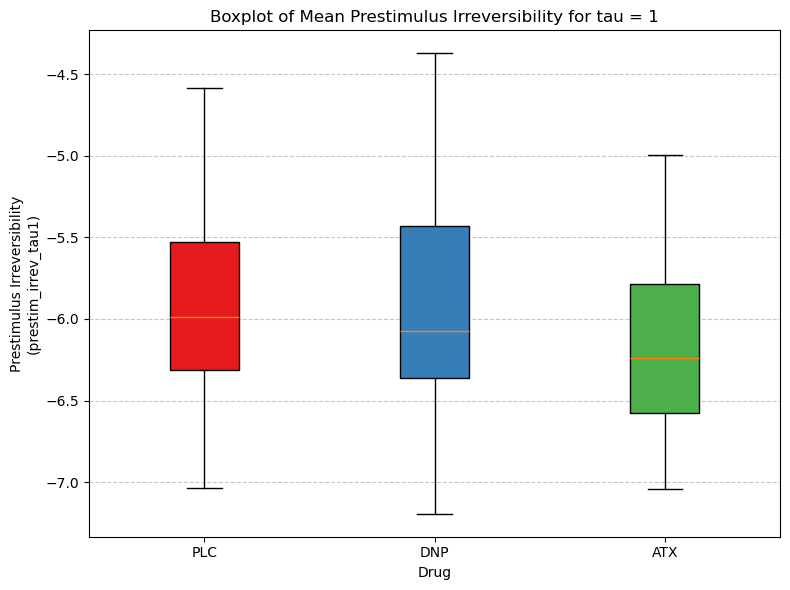


----- Analysis for tau = 2 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.518943 -4.395866 -4.711148
2       -4.976678 -5.061714 -5.151760
3       -5.578853 -5.819220 -5.647250
4       -6.029326 -5.828556 -5.929625
5       -6.461201 -6.172739 -5.937549
Overall mean for each drug:
  PLC: -5.7245
  DNP: -5.6766
  ATX: -5.8699
Paired t-test PLC vs DNP (n=28): t = -0.960, p = 0.3456
Paired t-test PLC vs ATX (n=28): t = 2.376, p = 0.0249
Paired t-test DNP vs ATX (n=28): t = 3.017, p = 0.0055
Tau 2, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 2, corrected paired t-test PLC vs ATX: corrected p = 0.0746
Tau 2, corrected paired t-test DNP vs ATX: corrected p = 0.0165


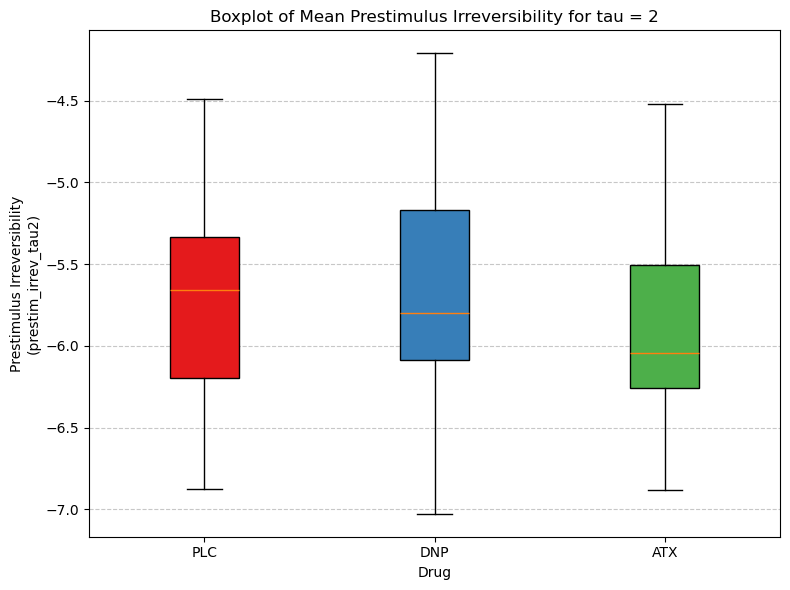


----- Analysis for tau = 3 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -5.637856 -5.455526 -5.779557
2       -5.748102 -5.779966 -5.826055
3       -5.309355 -5.646440 -5.473932
4       -5.766284 -5.617535 -5.836837
5       -6.357524 -6.174496 -5.892454
Overall mean for each drug:
  PLC: -5.9870
  DNP: -5.9308
  ATX: -6.1340
Paired t-test PLC vs DNP (n=28): t = -1.099, p = 0.2814
Paired t-test PLC vs ATX (n=28): t = 2.551, p = 0.0167
Paired t-test DNP vs ATX (n=28): t = 3.077, p = 0.0048
Tau 3, corrected paired t-test PLC vs DNP: corrected p = 0.8441
Tau 3, corrected paired t-test PLC vs ATX: corrected p = 0.0502
Tau 3, corrected paired t-test DNP vs ATX: corrected p = 0.0143


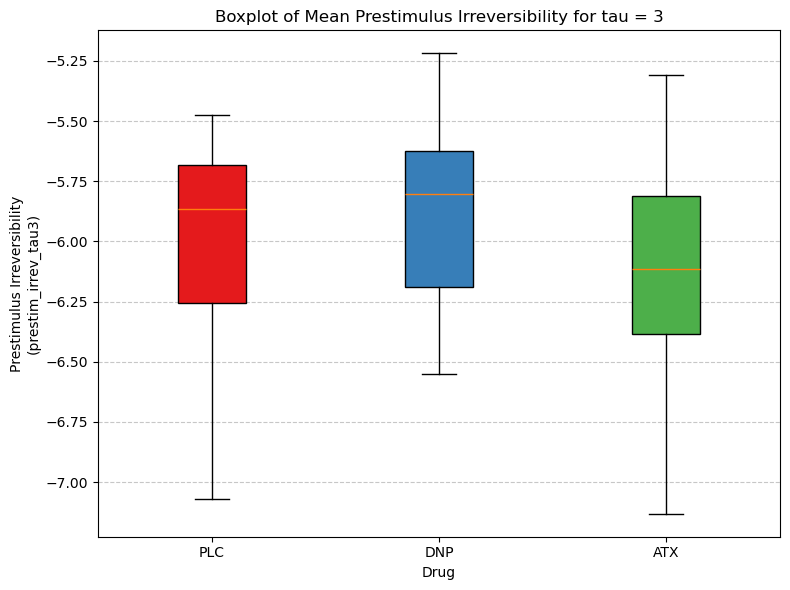


----- Analysis for tau = 4 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -5.276742 -5.006621 -5.359594
2       -5.675326 -5.637011 -5.572787
3       -5.164181 -5.516440 -5.373314
4       -5.546385 -5.448254 -5.729458
5       -6.257300 -6.086082 -5.763605
Overall mean for each drug:
  PLC: -5.8785
  DNP: -5.8480
  ATX: -6.0077
Paired t-test PLC vs DNP (n=28): t = -0.602, p = 0.5519
Paired t-test PLC vs ATX (n=28): t = 2.299, p = 0.0294
Paired t-test DNP vs ATX (n=28): t = 2.486, p = 0.0194
Tau 4, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 4, corrected paired t-test PLC vs ATX: corrected p = 0.0883
Tau 4, corrected paired t-test DNP vs ATX: corrected p = 0.0583


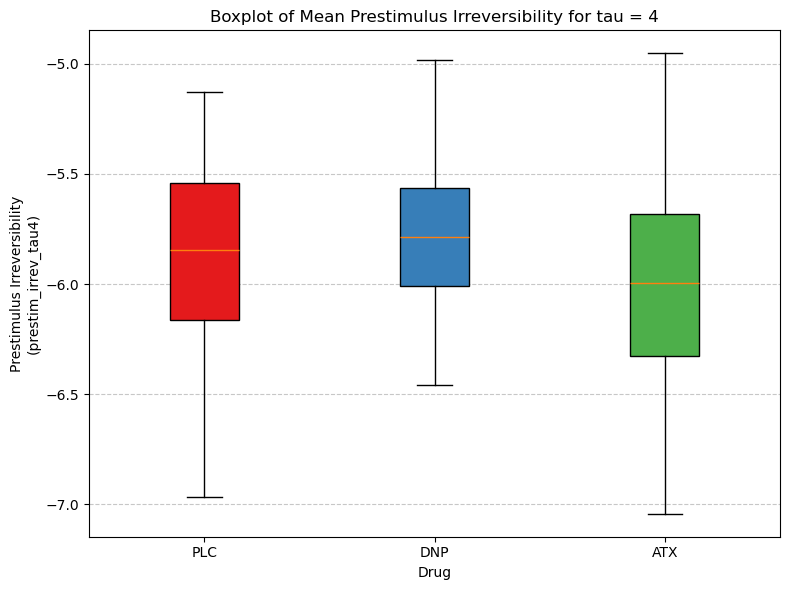


----- Analysis for tau = 5 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.650884 -4.506843 -4.855309
2       -5.229026 -5.316533 -5.324487
3       -5.057338 -5.410620 -5.293909
4       -5.368255 -5.321893 -5.639590
5       -6.134700 -5.951651 -5.633075
Overall mean for each drug:
  PLC: -5.7074
  DNP: -5.6561
  ATX: -5.8235
Paired t-test PLC vs DNP (n=28): t = -0.946, p = 0.3526
Paired t-test PLC vs ATX (n=28): t = 1.825, p = 0.0791
Paired t-test DNP vs ATX (n=28): t = 2.529, p = 0.0176
Tau 5, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 5, corrected paired t-test PLC vs ATX: corrected p = 0.2374
Tau 5, corrected paired t-test DNP vs ATX: corrected p = 0.0527


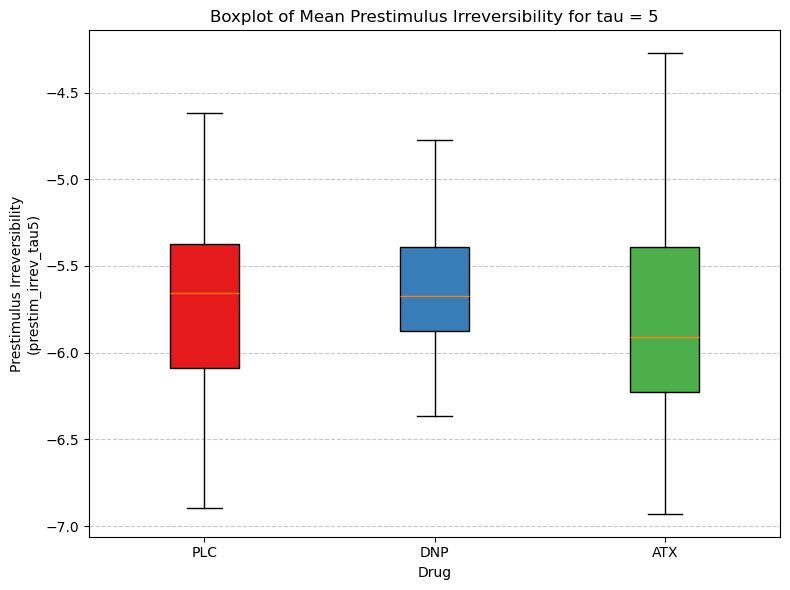


----- Analysis for tau = 6 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -5.136807 -5.103547 -5.400598
2       -5.416372 -5.495985 -5.569362
3       -4.987719 -5.349309 -5.244266
4       -5.264118 -5.231355 -5.573935
5       -6.113226 -5.979232 -5.629422
Overall mean for each drug:
  PLC: -5.8066
  DNP: -5.7449
  ATX: -5.9307
Paired t-test PLC vs DNP (n=28): t = -1.051, p = 0.3027
Paired t-test PLC vs ATX (n=28): t = 1.778, p = 0.0866
Paired t-test DNP vs ATX (n=28): t = 2.585, p = 0.0155
Tau 6, corrected paired t-test PLC vs DNP: corrected p = 0.9081
Tau 6, corrected paired t-test PLC vs ATX: corrected p = 0.2599
Tau 6, corrected paired t-test DNP vs ATX: corrected p = 0.0464


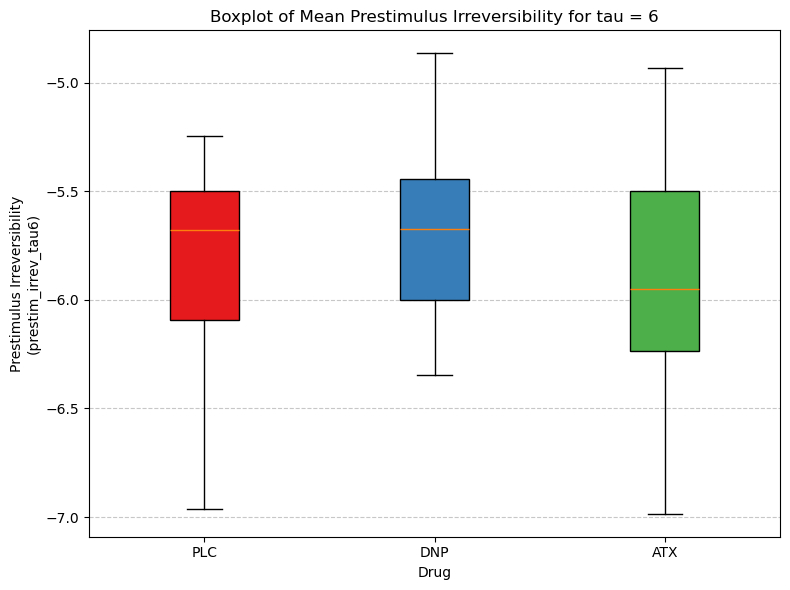


----- Analysis for tau = 7 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -5.411296 -5.164753 -5.466380
2       -5.565854 -5.464981 -5.502518
3       -4.936989 -5.289360 -5.207947
4       -5.176253 -5.148678 -5.525468
5       -6.100391 -5.920374 -5.555006
Overall mean for each drug:
  PLC: -5.7980
  DNP: -5.7575
  ATX: -5.9394
Paired t-test PLC vs DNP (n=28): t = -0.711, p = 0.4833
Paired t-test PLC vs ATX (n=28): t = 2.184, p = 0.0378
Paired t-test DNP vs ATX (n=28): t = 2.564, p = 0.0162
Tau 7, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 7, corrected paired t-test PLC vs ATX: corrected p = 0.1134
Tau 7, corrected paired t-test DNP vs ATX: corrected p = 0.0487


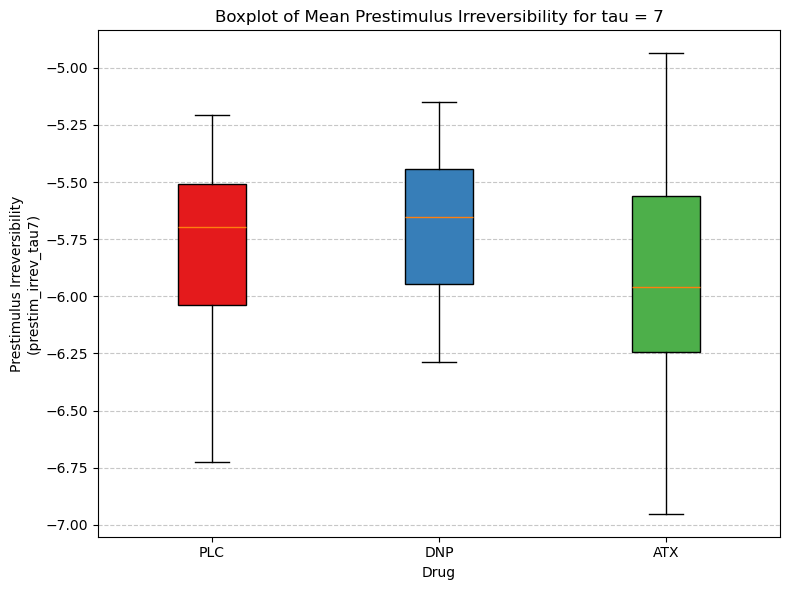


----- Analysis for tau = 8 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.631785 -4.502330 -4.841181
2       -5.291918 -5.314443 -5.326839
3       -4.908066 -5.248731 -5.182710
4       -5.109411 -5.084339 -5.493522
5       -6.050722 -5.830869 -5.490313
Overall mean for each drug:
  PLC: -5.6542
  DNP: -5.6070
  ATX: -5.7690
Paired t-test PLC vs DNP (n=28): t = -0.813, p = 0.4231
Paired t-test PLC vs ATX (n=28): t = 1.710, p = 0.0988
Paired t-test DNP vs ATX (n=28): t = 2.399, p = 0.0236
Tau 8, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 8, corrected paired t-test PLC vs ATX: corrected p = 0.2963
Tau 8, corrected paired t-test DNP vs ATX: corrected p = 0.0709


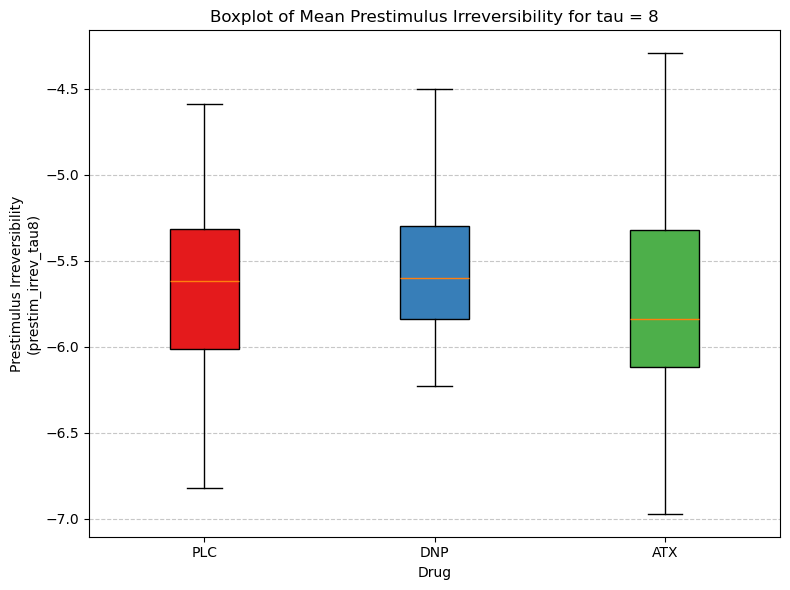


----- Analysis for tau = 9 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.897372 -4.853631 -5.154457
2       -5.246472 -5.326345 -5.370962
3       -4.885650 -5.231530 -5.175071
4       -5.068397 -5.044132 -5.468170
5       -6.032539 -5.858196 -5.527620
Overall mean for each drug:
  PLC: -5.6716
  DNP: -5.6129
  ATX: -5.7868
Paired t-test PLC vs DNP (n=28): t = -1.016, p = 0.3185
Paired t-test PLC vs ATX (n=28): t = 1.638, p = 0.1130
Paired t-test DNP vs ATX (n=28): t = 2.495, p = 0.0190
Tau 9, corrected paired t-test PLC vs DNP: corrected p = 0.9554
Tau 9, corrected paired t-test PLC vs ATX: corrected p = 0.3389
Tau 9, corrected paired t-test DNP vs ATX: corrected p = 0.0570


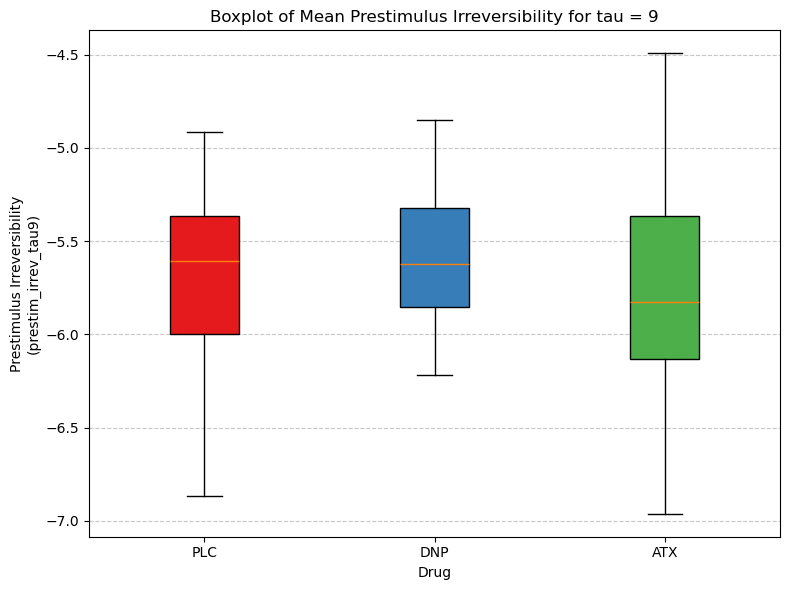


----- Analysis for tau = 10 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -5.476293 -5.283370 -5.496098
2       -5.351944 -5.293151 -5.336153
3       -4.868989 -5.211901 -5.162513
4       -5.036943 -5.022185 -5.442287
5       -6.000994 -5.861187 -5.505310
Overall mean for each drug:
  PLC: -5.7057
  DNP: -5.6562
  ATX: -5.8438
Paired t-test PLC vs DNP (n=28): t = -0.890, p = 0.3812
Paired t-test PLC vs ATX (n=28): t = 2.157, p = 0.0401
Paired t-test DNP vs ATX (n=28): t = 2.662, p = 0.0129
Tau 10, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 10, corrected paired t-test PLC vs ATX: corrected p = 0.1202
Tau 10, corrected paired t-test DNP vs ATX: corrected p = 0.0388


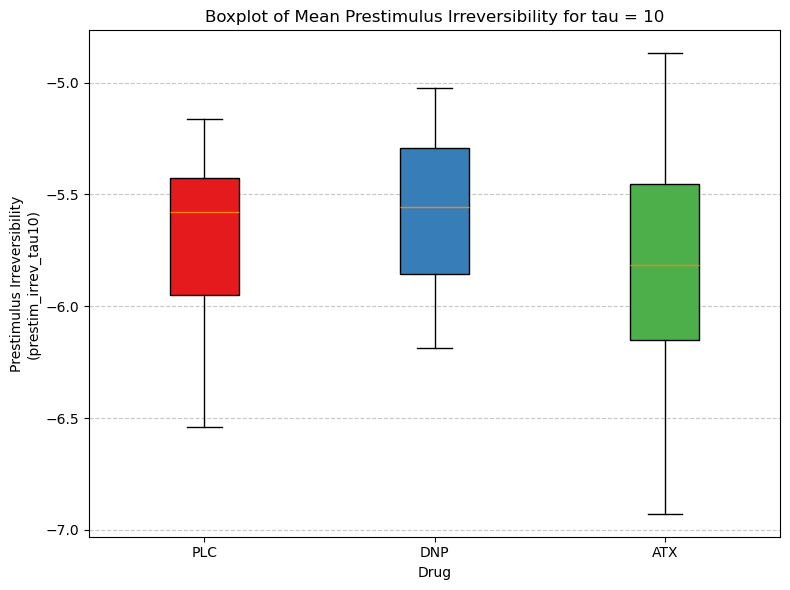


----- Analysis for tau = 11 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.831968 -4.578417 -4.896934
2       -5.273788 -5.250159 -5.245438
3       -4.855217 -5.199735 -5.150166
4       -5.015524 -4.996276 -5.432813
5       -5.957159 -5.795235 -5.431653
Overall mean for each drug:
  PLC: -5.5992
  DNP: -5.5584
  ATX: -5.7338
Paired t-test PLC vs DNP (n=28): t = -0.683, p = 0.5005
Paired t-test PLC vs ATX (n=28): t = 2.041, p = 0.0512
Paired t-test DNP vs ATX (n=28): t = 2.448, p = 0.0211
Tau 11, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 11, corrected paired t-test PLC vs ATX: corrected p = 0.1535
Tau 11, corrected paired t-test DNP vs ATX: corrected p = 0.0634


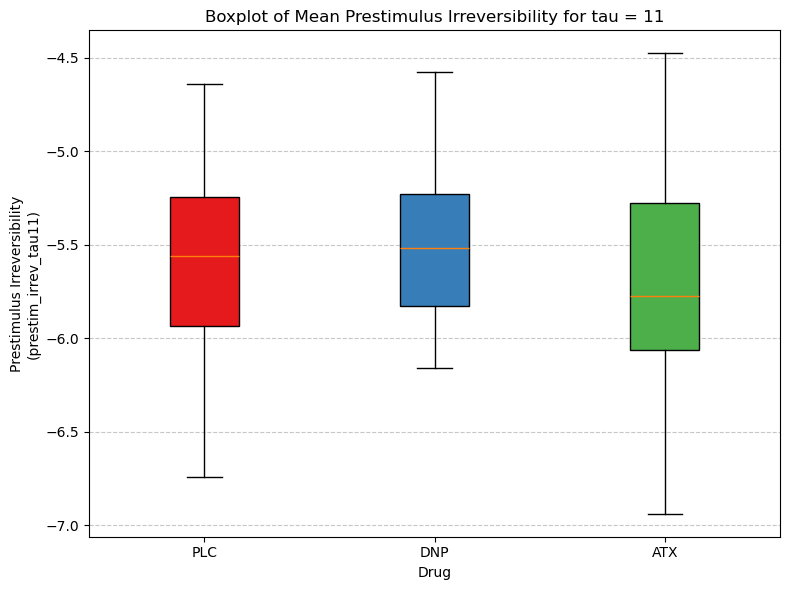


----- Analysis for tau = 12 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.575115 -4.491128 -4.811441
2       -5.128103 -5.200688 -5.176669
3       -4.846309 -5.189948 -5.141472
4       -4.998887 -4.987056 -5.428870
5       -5.952322 -5.774837 -5.418211
Overall mean for each drug:
  PLC: -5.5629
  DNP: -5.5138
  ATX: -5.6848
Paired t-test PLC vs DNP (n=28): t = -0.811, p = 0.4244
Paired t-test PLC vs ATX (n=28): t = 1.744, p = 0.0926
Paired t-test DNP vs ATX (n=28): t = 2.400, p = 0.0236
Tau 12, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 12, corrected paired t-test PLC vs ATX: corrected p = 0.2777
Tau 12, corrected paired t-test DNP vs ATX: corrected p = 0.0707


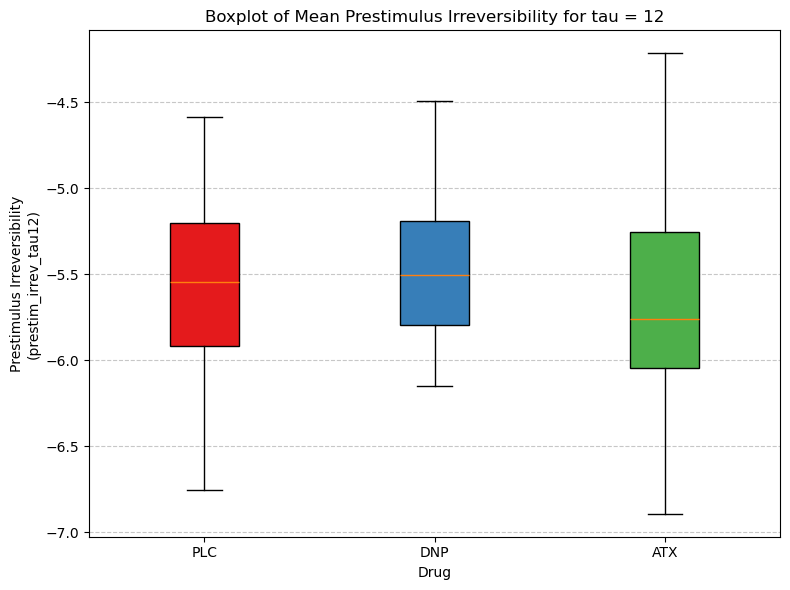


----- Analysis for tau = 13 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.927966 -4.854190 -5.091996
2       -5.034111 -5.111956 -5.123388
3       -4.835320 -5.184130 -5.139183
4       -4.977576 -4.983389 -5.419099
5       -5.939698 -5.766730 -5.436654
Overall mean for each drug:
  PLC: -5.5764
  DNP: -5.5259
  ATX: -5.6977
Paired t-test PLC vs DNP (n=28): t = -0.894, p = 0.3792
Paired t-test PLC vs ATX (n=28): t = 1.819, p = 0.0800
Paired t-test DNP vs ATX (n=28): t = 2.506, p = 0.0185
Tau 13, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 13, corrected paired t-test PLC vs ATX: corrected p = 0.2400
Tau 13, corrected paired t-test DNP vs ATX: corrected p = 0.0556


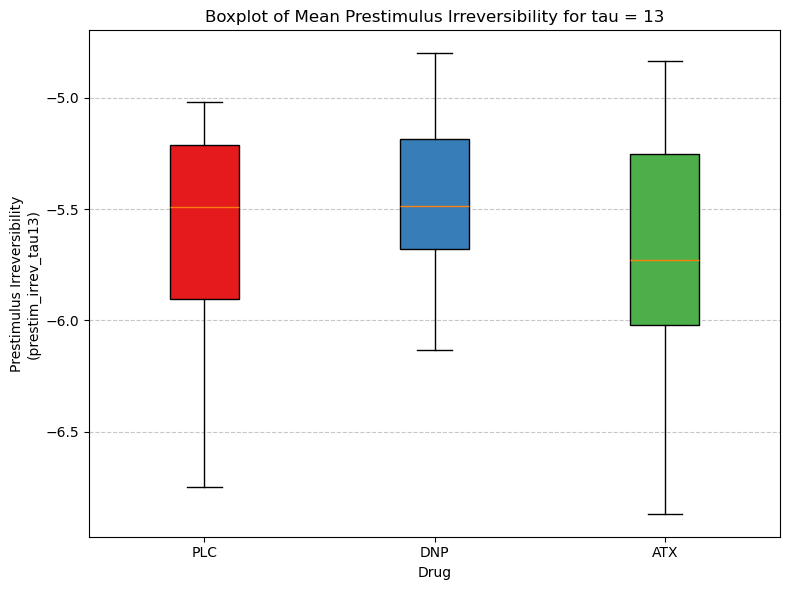


----- Analysis for tau = 14 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.782787 -4.544832 -4.920647
2       -5.026720 -5.121696 -5.144813
3       -4.824903 -5.175985 -5.122329
4       -4.968713 -4.980409 -5.403385
5       -5.924423 -5.733980 -5.424829
Overall mean for each drug:
  PLC: -5.5195
  DNP: -5.4707
  ATX: -5.6399
Paired t-test PLC vs DNP (n=28): t = -0.890, p = 0.3811
Paired t-test PLC vs ATX (n=28): t = 1.888, p = 0.0698
Paired t-test DNP vs ATX (n=28): t = 2.452, p = 0.0210
Tau 14, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 14, corrected paired t-test PLC vs ATX: corrected p = 0.2095
Tau 14, corrected paired t-test DNP vs ATX: corrected p = 0.0629


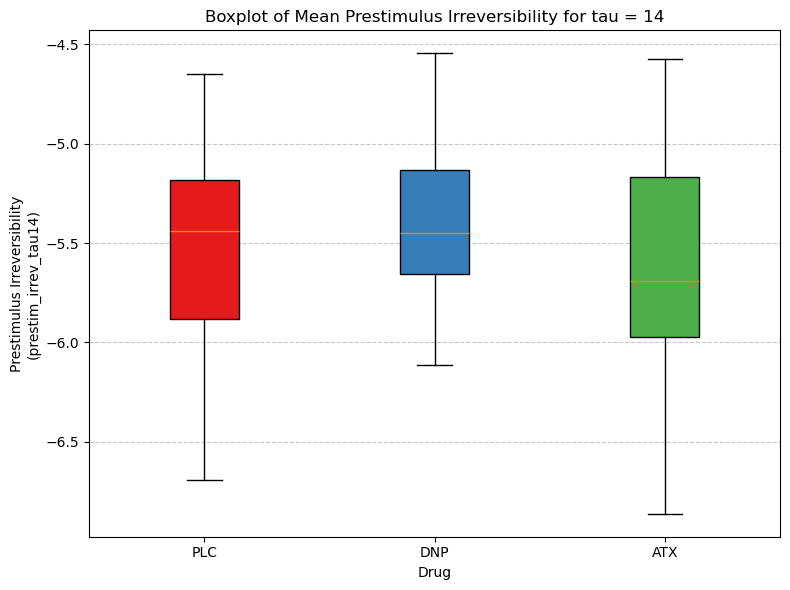


----- Analysis for tau = 15 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.551888 -4.438824 -4.827683
2       -5.027590 -5.138104 -5.139625
3       -4.806205 -5.166713 -5.099154
4       -4.950841 -4.957604 -5.384988
5       -5.915034 -5.752972 -5.446558
Overall mean for each drug:
  PLC: -5.4998
  DNP: -5.4427
  ATX: -5.6147
Paired t-test PLC vs DNP (n=28): t = -0.982, p = 0.3349
Paired t-test PLC vs ATX (n=28): t = 1.672, p = 0.1062
Paired t-test DNP vs ATX (n=28): t = 2.388, p = 0.0242
Tau 15, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 15, corrected paired t-test PLC vs ATX: corrected p = 0.3185
Tau 15, corrected paired t-test DNP vs ATX: corrected p = 0.0727


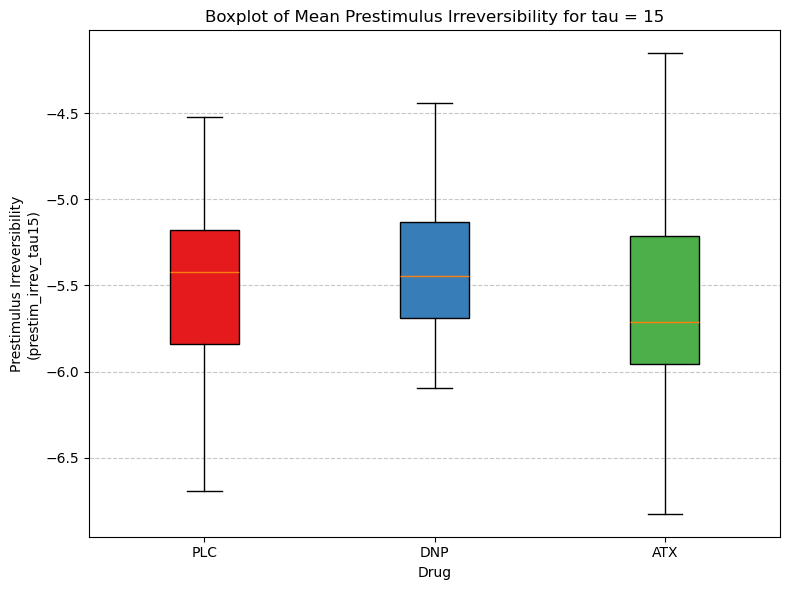


----- Analysis for tau = 20 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.767668 -4.605398 -4.891067
2       -4.928131 -4.995930 -4.995713
3       -4.641556 -4.997980 -4.888411
4       -4.828036 -4.809028 -5.208446
5       -5.787199 -5.616055 -5.250066
Overall mean for each drug:
  PLC: -5.3855
  DNP: -5.3411
  ATX: -5.5207
Paired t-test PLC vs DNP (n=28): t = -0.770, p = 0.4479
Paired t-test PLC vs ATX (n=28): t = 2.085, p = 0.0466
Paired t-test DNP vs ATX (n=28): t = 2.551, p = 0.0167
Tau 20, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 20, corrected paired t-test PLC vs ATX: corrected p = 0.1399
Tau 20, corrected paired t-test DNP vs ATX: corrected p = 0.0502


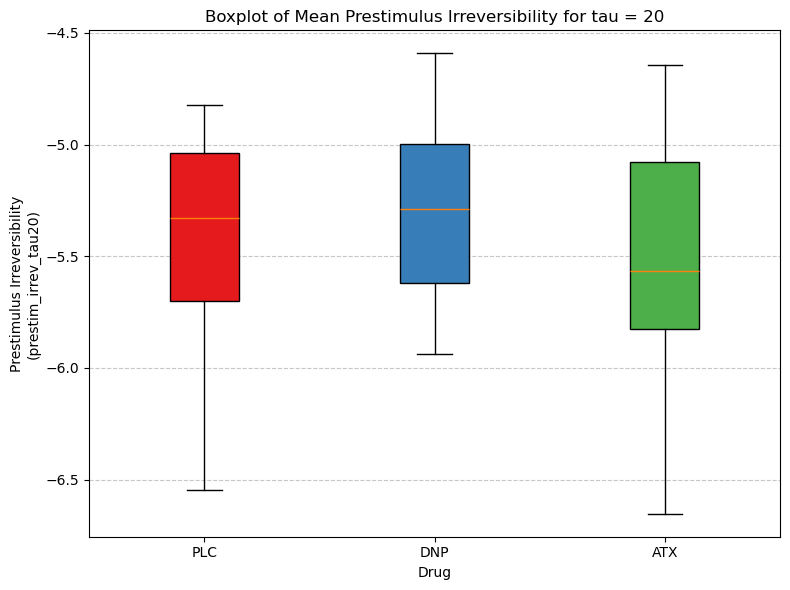


----- Analysis for tau = 25 -----
Mean prestimulus irreversibility per subject and drug (first few rows):
drug          ATX       DNP       PLC
subject                              
1       -4.767668 -4.605398 -4.891067
2       -4.928131 -4.995930 -4.995713
3       -4.641556 -4.997980 -4.888411
4       -4.828036 -4.809028 -5.208446
5       -5.787199 -5.616055 -5.250066
Overall mean for each drug:
  PLC: -5.3855
  DNP: -5.3411
  ATX: -5.5207
Paired t-test PLC vs DNP (n=28): t = -0.770, p = 0.4479
Paired t-test PLC vs ATX (n=28): t = 2.085, p = 0.0466
Paired t-test DNP vs ATX (n=28): t = 2.551, p = 0.0167
Tau 25, corrected paired t-test PLC vs DNP: corrected p = 1.0000
Tau 25, corrected paired t-test PLC vs ATX: corrected p = 0.1399
Tau 25, corrected paired t-test DNP vs ATX: corrected p = 0.0502


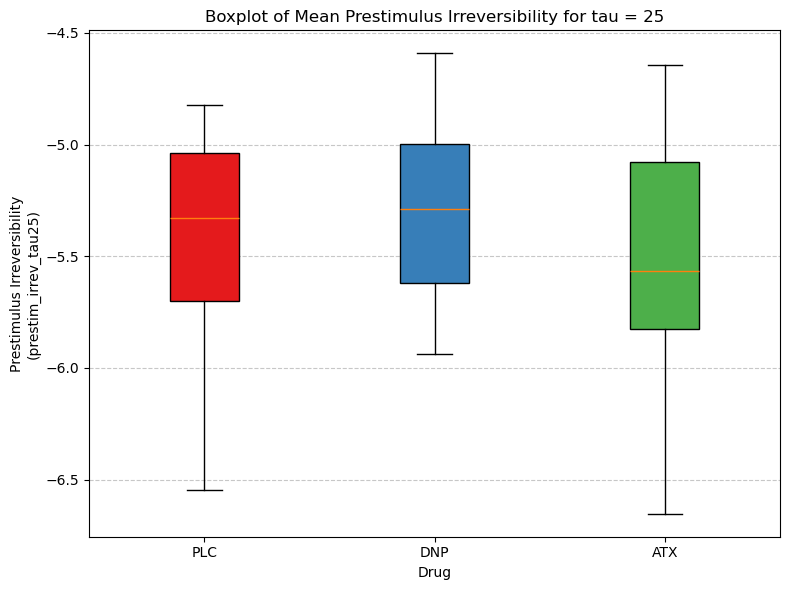

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# List of tau values (1 through 15, plus 20 and 25)
taus = list(range(1, 16)) + [20, 25]
# List of drug conditions
drugs = ['PLC', 'DNP', 'ATX']
# Define the pairwise comparisons (order does not matter for t-test)
comparisons = [('PLC', 'DNP'), ('PLC', 'ATX'), ('DNP', 'ATX')]

# Dictionary to store results for each tau
results = {}

for tau in taus:
    # Define the current tau column name
    tau_col = f'prestim_irrev_tau{tau}'
    
    # Group the data by subject and drug, and calculate the mean irreversibility value per subject.
    # The resulting DataFrame will have subjects as the index and drugs as columns.
    grouped = df.groupby(['subject', 'drug'])[tau_col].mean().unstack()
    
    print(f"\n----- Analysis for tau = {tau} -----")
    print("Mean prestimulus irreversibility per subject and drug (first few rows):")
    print(grouped.head())
    
    # Print the overall means (across subjects) for each drug.
    print("Overall mean for each drug:")
    for drug in drugs:
        if drug in grouped.columns:
            overall_mean = grouped[drug].mean()
            print(f"  {drug}: {overall_mean:.4f}")
        else:
            print(f"  {drug}: No data")
    
    # For storing raw p-values (before correction) for the comparisons at this tau.
    p_values = []
    comp_labels = []
    
    # Loop through each pair of drug conditions for paired-sample t-tests
    for d1, d2 in comparisons:
        # Select only the subjects who have data for both drugs.
        valid_data = grouped[[d1, d2]].dropna()
        n = len(valid_data)
        if n == 0:
            print(f"Not enough data for comparison between {d1} and {d2} at tau = {tau}.")
            p_values.append(np.nan)
            comp_labels.append((d1, d2))
            continue
        
        # Perform a paired-sample t-test between drug d1 and d2.
        t_stat, p_val = ttest_rel(valid_data[d1], valid_data[d2])
        print(f"Paired t-test {d1} vs {d2} (n={n}): t = {t_stat:.3f}, p = {p_val:.4f}")
        p_values.append(p_val)
        comp_labels.append((d1, d2))
    
    # Correct the p-values for multiple comparisons (three comparisons per tau) using Bonferroni correction.
    valid_indices = [i for i, p in enumerate(p_values) if not np.isnan(p)]
    if valid_indices:
        valid_p_values = [p_values[i] for i in valid_indices]
        reject, corrected_pvals, _, _ = multipletests(valid_p_values, alpha=0.05, method='bonferroni')
        # Report the corrected p-values for the comparisons.
        for idx, corr_p in zip(valid_indices, corrected_pvals):
            d1, d2 = comp_labels[idx]
            print(f"Tau {tau}, corrected paired t-test {d1} vs {d2}: corrected p = {corr_p:.4f}")
    
    # Save the raw p-values for this tau (if needed later)
    results[tau] = {comp_labels[i]: p_values[i] for i in range(len(comp_labels))}
    
    # ---------------------------
    # BOXPLOT VISUALIZATION
    # ---------------------------
    # Create a boxplot for the grouped data (i.e. mean prestimulus irreversibility per subject for each drug)
    plt.figure(figsize=(8, 6))
    # Build a list of Series, one per drug, and drop any missing values.
    data_list = [grouped[drug].dropna() for drug in drugs if drug in grouped.columns]
    
    # Create the boxplot.
    bp = plt.boxplot(data_list, patch_artist=True, showfliers=False)
    
    # Set colors for each box (optional).
    colors = sns.color_palette("Set1", len(data_list))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Set the x-axis labels to the drug names.
    plt.xticks(range(1, len(data_list) + 1), drugs)
    plt.xlabel('Drug')
    plt.ylabel(f'Prestimulus Irreversibility\n({tau_col})')
    plt.title(f'Boxplot of Mean Prestimulus Irreversibility for tau = {tau}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


## poststim irrev x d'

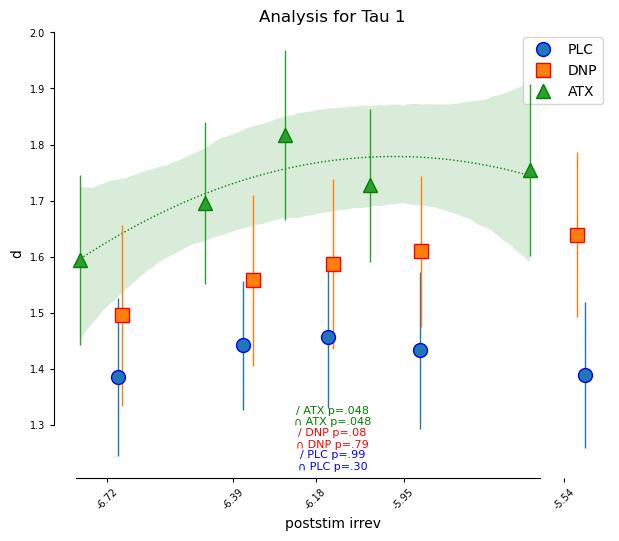

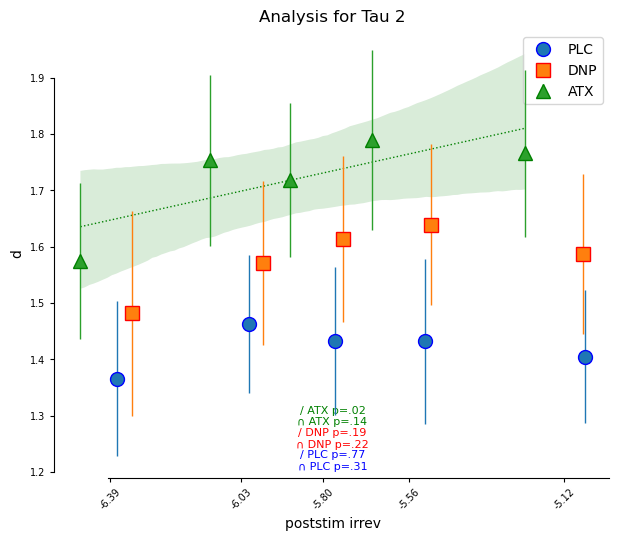

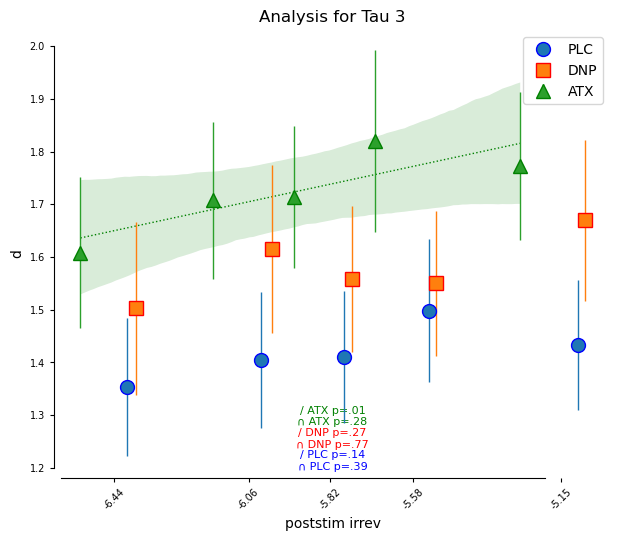

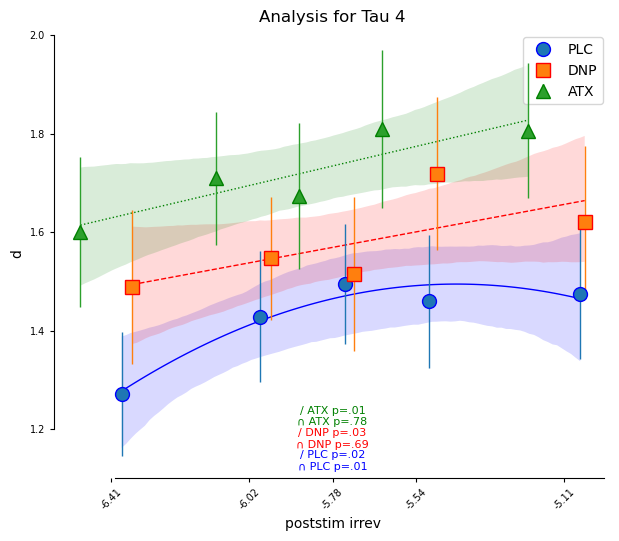

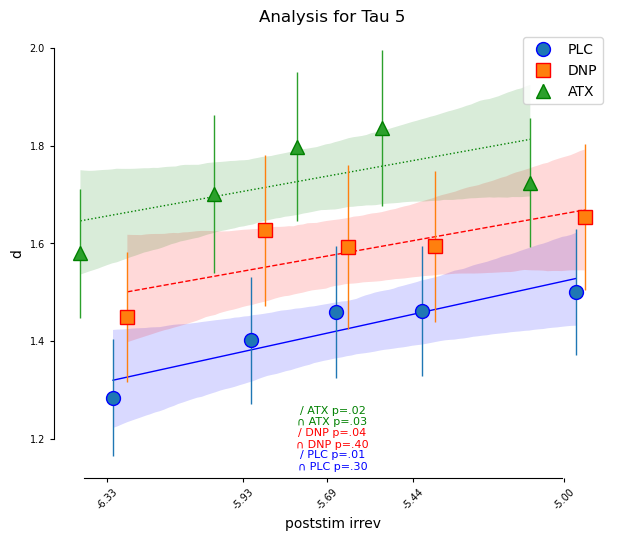

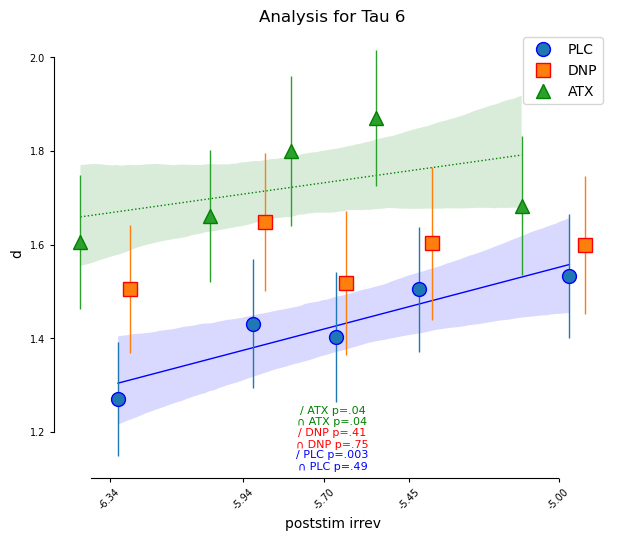

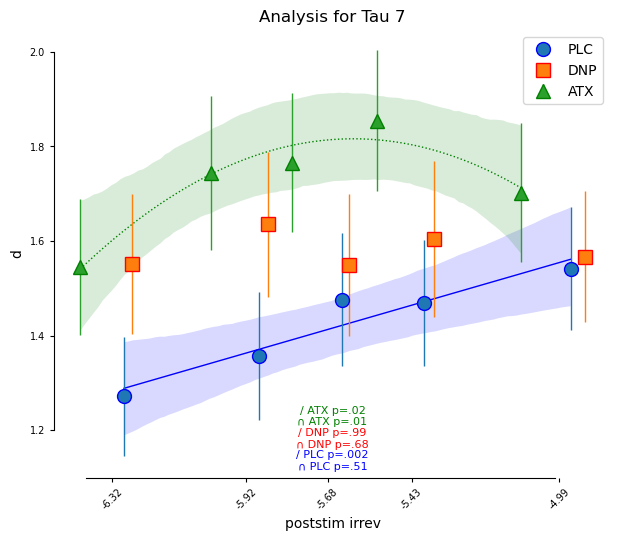

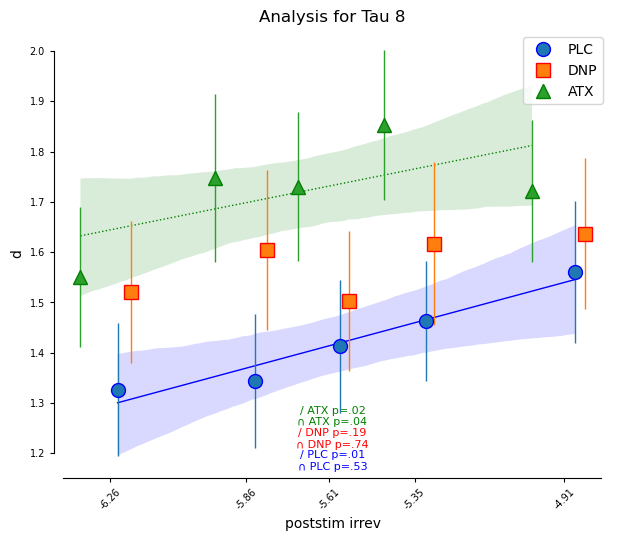

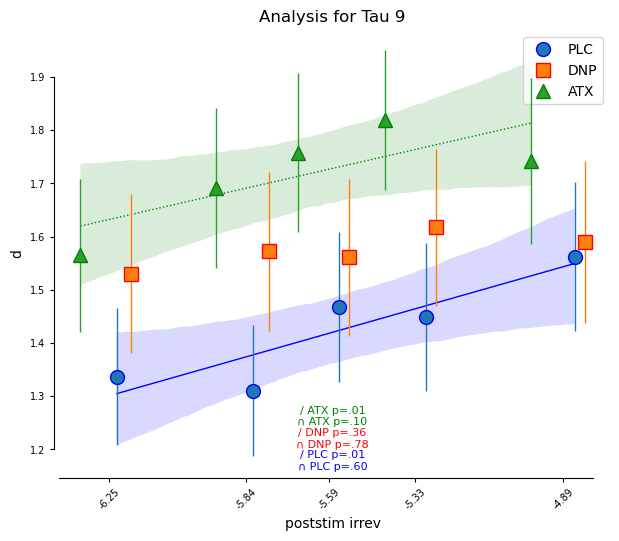

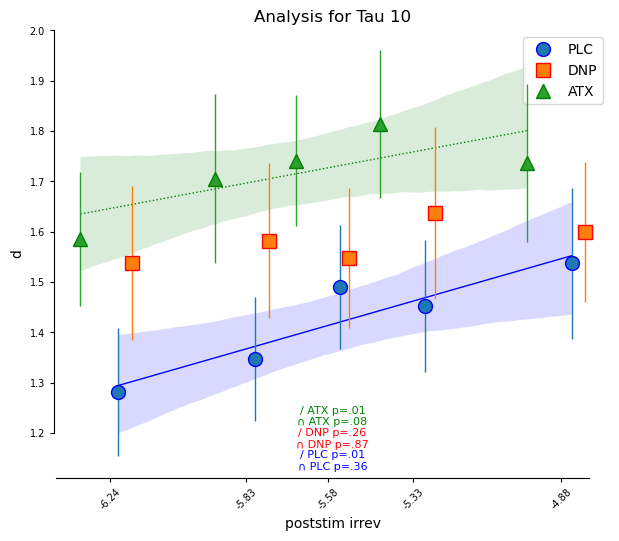

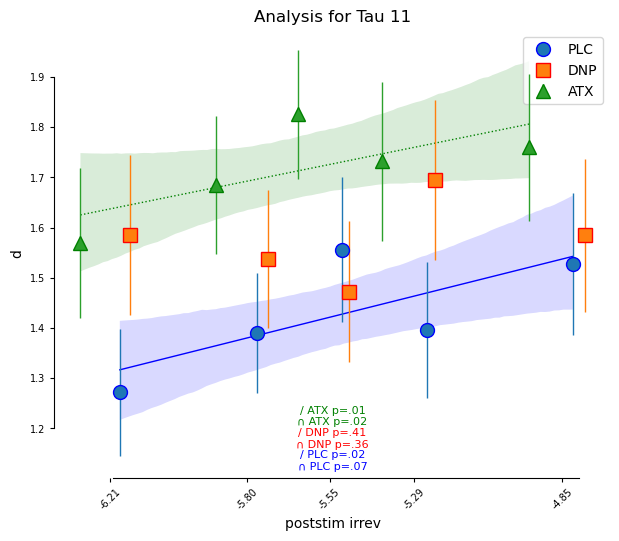

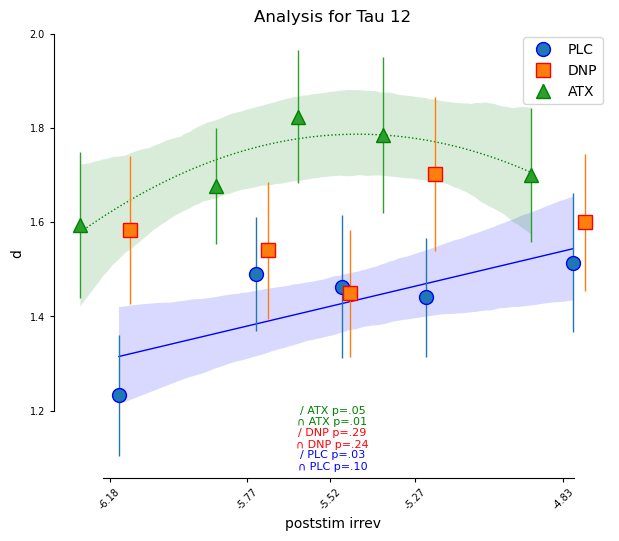

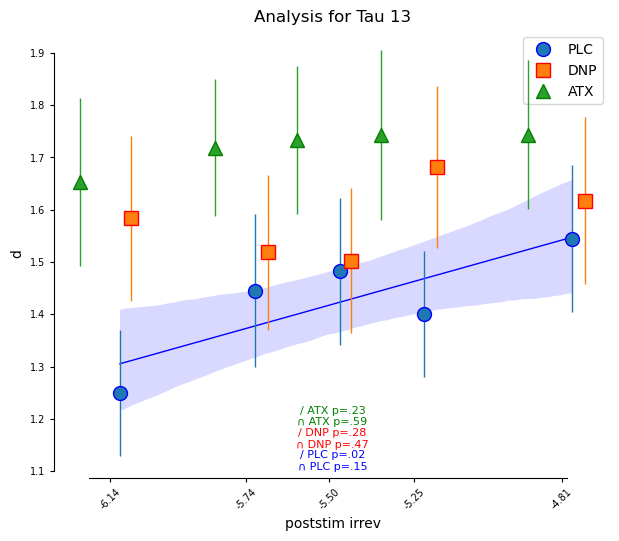

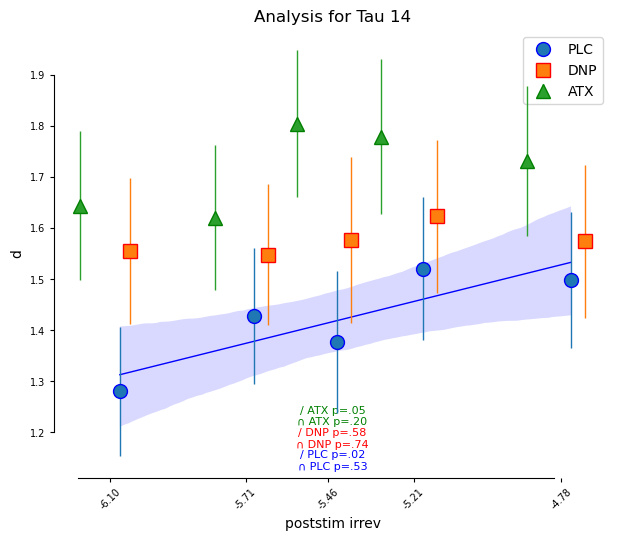

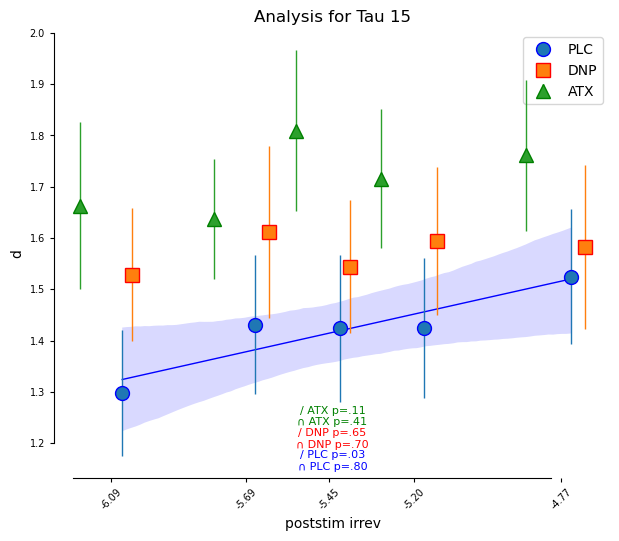

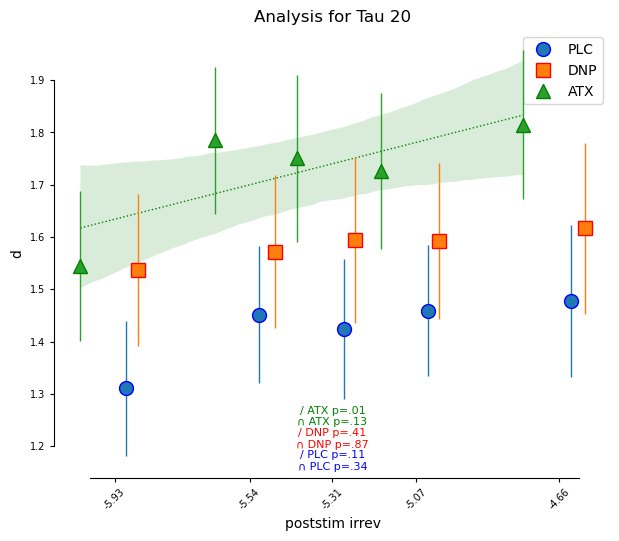

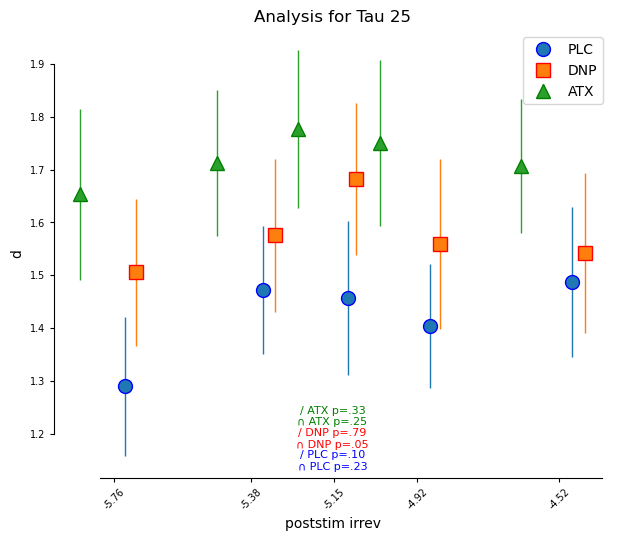

In [21]:
# Process each tau column dynamically
import warnings
warnings.filterwarnings("ignore")

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    #print("Drug: " + drug)
    #print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

cfg = {'n_bins': 5}
cm = 1 / 2.54 

for tau in list(range(1, 16)) + [20, 25]:
    tau_col = f'poststim_irrev_tau{tau}'  # Tau column name
    
    # Filter and process the DataFrame for the current tau
    behavior = df.copy()
    #behavior = behavior[(behavior[tau_col] < 0.075)]
    behavior['irrev'] = behavior[tau_col]

    # Process data for each drug
    df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')
    df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')
    df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

    # Combine bin means
    total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

    # Combine data for plotting
    df_combined = pd.concat([
        df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
        df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
        df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
    ])

    # Plotting
    # Initialize variables to decide which model to plot
    plot_linear_plc = False
    plot_quadratic_plc = False
    plot_linear_dnp = False
    plot_quadratic_dnp = False
    plot_linear_atx = False
    plot_quadratic_atx = False

    # Calculate betas for PLC
    betas_first_irreversibility_plc = dict()
    _, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

    betas_second_irreversibility_plc = dict()
    _, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

    # Calculate betas for DNP
    betas_first_irreversibility_dnp = dict()
    _, betas_first_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

    betas_second_irreversibility_dnp = dict()
    _, betas_second_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

    # Calculate betas for ATX
    betas_first_irreversibility_atx = dict()
    _, betas_first_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

    betas_second_irreversibility_atx = dict()
    _, betas_second_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

    # Determine which model to plot for PLC based on the significance and smaller p-value
    if betas_first_irreversibility_plc['d'] < 0.05 or betas_second_irreversibility_plc['d'] < 0.05:
        if betas_first_irreversibility_plc['d'] < betas_second_irreversibility_plc['d']:
            plot_linear_plc = True
        elif betas_second_irreversibility_plc['d'] < betas_first_irreversibility_plc['d']:
            plot_quadratic_plc = True

    # Determine which model to plot for DNP based on the significance and smaller p-value
    if betas_first_irreversibility_dnp['d'] < 0.05 or betas_second_irreversibility_dnp['d'] < 0.05:
        if betas_first_irreversibility_dnp['d'] < betas_second_irreversibility_dnp['d']:
            plot_linear_dnp = True
        elif betas_second_irreversibility_dnp['d'] < betas_first_irreversibility_dnp['d']:
            plot_quadratic_dnp = True

    # Determine which model to plot for ATX based on the significance and smaller p-value
    if betas_first_irreversibility_atx['d'] < 0.05 or betas_second_irreversibility_atx['d'] < 0.05:
        if betas_first_irreversibility_atx['d'] < betas_second_irreversibility_atx['d']:
            plot_linear_atx = True
        elif betas_second_irreversibility_atx['d'] < betas_first_irreversibility_atx['d']:
            plot_quadratic_atx = True

    # Plotting results for log_poststim'
    cm = 1 / 2.54  # Conversion factor to cm
    fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

    # PLC data
    ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['d']
    yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['d']
    ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

    # DNP data
    ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['d']
    yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['d']
    ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

    # ATX data
    ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['d']
    yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['d']
    ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

    # Plot linear/quadratic fit for each drug
    def plot_fit(ax, df, color, linestyle, order):
        sns.regplot(ax=ax, data=df, x="bin_mean", y="d", scatter=False, color=color,
                    line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

    # Optionally add model fits if linear/quadratic fit was significant for PLC
    if plot_linear_plc:
        plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
    if plot_quadratic_plc:
        plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

    # Optionally add model fits if linear/quadratic fit was significant for DNP
    if plot_linear_dnp:
        plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
    if plot_quadratic_dnp:
        plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

    # Optionally add model fits if linear/quadratic fit was significant for ATX
    if plot_linear_atx:
        plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
    if plot_quadratic_atx:
        plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

    # Plot p-values for the polynomial regression significance
    ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['d']),
                                                p_val_string(betas_second_irreversibility_plc['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

    ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['d']),
                                                p_val_string(betas_second_irreversibility_dnp['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

    ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['d']),
                                                p_val_string(betas_second_irreversibility_atx['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

    sns.despine(ax=ax, offset=1, trim=True)

    # Setting labels and titles
    ax.set_ylabel('d')
    ax.set_xlabel('poststim irrev')
    ax.set_title(f'Analysis for Tau {tau}')

    labels = []
    for i in range(cfg['n_bins']):
        labels.append(f"{total_bin_means[i]:.2f}")

    ax.set_xticks(total_bin_means)
    ax.set_xticklabels(labels, rotation=45)
    ax.tick_params(axis='both', which='major', labelsize=7, length=3)

    ax.legend()
    fig.tight_layout()
    plt.show()

